<h1>Assignment -- Kyriakos Chatzicharalampous (20190183)</h1>


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from matplotlib import cm
import seaborn as sns #to visualise the missing values through heatmap

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier
#import metrics from sklearn library to compute the metrics that needed for each model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#For Part B - unsupervised learning
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Overview
- [Part A](#Part-A)
  - [Exercise 1](#Exercise-1)
      - [(a) Load the data into Python.](#(a)-Load-the-data-into-Python.)
      - [(b) Initial examination of the data.](#(b)-Initial-examination-of-the-data.)
      - [(c) Treating missing values.](#(c)-Treating-missing-values.)
      - [(d) Duplicates.](#(d)-Duplicates.)
      - [(e) Outliers.](#(e)-Outliers.)
      - [(f) Convert the age feature.](#(f)-Convert-the-age-feature.)
      - [(g) Separation the feature space and the label variables.](#(g)-Separation-the-feature-space-and-the-label-variables.)
      - [(h) Exploration of three potential relationships between features.](#(h)-Exploration-of-three-potential-relationships-between-features.)
      - [(i) Conversion of the categorical features to numerical ones.](#(i)-Conversion-of-the-categorical-features-to-numerical-ones.)
      - [(j) PCA analysis on the feature space.](#(j)-PCA-analysis-on-the-feature-space.)
  - [Exercise 2](#Exercise-2) 
      - [(a) Logistic Regression model.](#(a)-Logistic-Regression-model.)
      - [(b) Random Forest model.](#(b)-Random-Forest-model.)
      - [(c) Neural Network model.](#(c)-Neural-Network-model.)
  - [Exercise 3](#Exercise-3)
      - [(a) Logistic Regression model - different values for the regularization parameter and number of principal components.](#(a)-Logistic-Regression-model---different-values-for-the-regularization-parameter-and-number-of-principal-components.)
      - [(b) Random Forest model - different values of number of trees and number of principal components.](#(b)-Random-Forest-model---different-values-of-number-of-trees-and-number-of-principal-components.)
      - [(c) Neural Network model - different values for the regularization parameter and different configurations for the networks hidden layers.](#(c)-Neural-Network-model---different-values-for-the-regularization-parameter-and-different-configurations-for-the-networks-hidden-layers.)
- [Part B](#Part-B)
  - [(a) Visualize the data in two dimensions.](#(a)-Visualize-the-data-in-two-dimensions.)
  - [(b) Clustering analysis.](#(b)-Clustering-analysis.)
  - [(c) Cluster the wines and evaluate the quality of the result - the silhouette plot function.](#(c)-Cluster-the-wines-and-evaluate-the-quality-of-the-result---the-silhouette-plot-function.)
  - [(d) Two different approaches and compare the outcome with the previous results.](#(d)-Two-different-approaches-and-compare-the-outcome-with-the-previous-results.)
  - [(e) Plot the distribution of wines within each category.](#(e)-Plot-the-distribution-of-wines-within-each-category.)
  - [(f) Does the produced categorization of wines correspond to a wine quality-based segmentation?](#(f)-Does-the-produced-categorization-of-wines-correspond-to-a-wine-quality-based-segmentation?)

# Part A
## Exercise 1

### (a) Load the data into Python.

In [10]:
# Read bank_marketing_data dataset into a data frame
bank_data = pd.read_csv('..\\..\\..\\..\\Desktop\\bank_marketing_data.csv')

### (b) Initial examination of the data.

In [11]:
# Using the dataframe method - sample, we can see 10 random samples form the dataframe bank_data
bank_data.sample(n=10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6243,39048,55.0,services,married,basic.9y,no,yes,no,cellular,dec,...,1.0,6.0,1.0,success,-3.0,92.713,-33.0,0.715,5023.5,yes
3788,39013,26.0,admin.,single,university.degree,no,yes,no,telephone,dec,...,1.0,999.0,0.0,nonexistent,-3.0,92.713,-33.0,0.715,5023.5,yes
6726,35252,29.0,blue-collar,divorced,high.school,no,no,no,cellular,may,...,2.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.250,5099.1,no
9157,7444,25.0,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
4038,36515,29.0,admin.,divorced,university.degree,no,yes,no,cellular,jun,...,3.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes
5619,40089,33.0,blue-collar,married,basic.9y,no,no,yes,telephone,jul,...,1.0,999.0,0.0,nonexistent,-1.7,94.215,-40.3,0.827,4991.6,no
4640,28701,32.0,admin.,single,university.degree,no,yes,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1,yes
3372,38002,29.0,self-employed,single,university.degree,no,yes,no,cellular,sep,...,2.0,999.0,0.0,nonexistent,-3.4,92.379,-29.8,0.788,5017.5,yes
2098,2917,36.0,blue-collar,married,basic.9y,no,no,no,telephone,may,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
8780,16049,54.0,technician,married,high.school,no,no,no,cellular,jul,...,8.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [12]:
# Check the feature types
bank_data.info()
#We see that we have 21 features, the last column is the result of this campaign, 
# 10 numerical features and the rest categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9280 non-null   int64  
 1   age             9261 non-null   float64
 2   job             9280 non-null   object 
 3   marital         9280 non-null   object 
 4   education       9253 non-null   object 
 5   default         9248 non-null   object 
 6   housing         9259 non-null   object 
 7   loan            9258 non-null   object 
 8   contact         9280 non-null   object 
 9   month           9280 non-null   object 
 10  day_of_week     9280 non-null   object 
 11  campaign        9250 non-null   float64
 12  pdays           9260 non-null   float64
 13  previous        9252 non-null   float64
 14  poutcome        9264 non-null   object 
 15  emp.var.rate    9250 non-null   float64
 16  cons.price.idx  9260 non-null   float64
 17  cons.conf.idx   9256 non-null   f

##### The .info() dataframe method shows us how many entries-samples(9280) the dataset has. We can also see the total (21) columns and whether each column has missing values, as well as its type of each column (int,object, float etc)

In [13]:
#View a descriptive Statistics Summary for both numerical and categorical features
bank_data.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9261.000000,9280,9280,9253,9248,9259,9258,9280,9280,...,9250.000000,9260.000000,9252.000000,9264,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000,9280
unique,NaN,NaN,12,4,8,2,3,3,2,10,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,2561,5393,3031,7751,4922,7669,6625,2512,...,NaN,NaN,NaN,7209,NaN,NaN,NaN,NaN,NaN,4640
mean,24826.214224,40.464421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.321514,888.323002,0.317013,NaN,-0.493038,93.482013,-40.184389,2.968689,5135.528215,NaN
std,12425.733760,11.969497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.296910,312.529933,0.700171,NaN,1.723534,0.634667,5.359439,1.890814,87.031409,NaN
min,1.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,14310.500000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,27390.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,36751.500000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


##### We can see the descriptive statistics for numerical data (mean.min, max etc) and also the information about the categorical data. The number of unique values of each categorical column, what's the most common entry of each column and how many time used.

In [14]:
#create a list with all the categorical columns of the dataframe
categ_data_col = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
#for-loop to check all the possible 'values' of each categorical column and their frequency-without the missing values
for i in categ_data_col:
    x=bank_data[i].value_counts()
    print(x,"\n\n")

admin.           2561
blue-collar      1734
technician       1475
services          780
management        653
retired           579
student           328
self-employed     321
entrepreneur      293
unemployed        242
housemaid         236
unknown            78
Name: job, dtype: int64 


married     5393
single      2885
divorced     980
unknown       22
Name: marital, dtype: int64 


university.degree      3031
high.school            2106
basic.9y               1163
professional.course    1152
basic.4y                920
unknown                 439
basic.6y                436
illiterate                6
Name: education, dtype: int64 


no         7751
unknown    1497
Name: default, dtype: int64 


yes        4922
no         4120
unknown     217
Name: housing, dtype: int64 


no         7669
yes        1371
unknown     218
Name: loan, dtype: int64 


cellular     6625
telephone    2655
Name: contact, dtype: int64 


may    2512
jul    1462
aug    1348
jun    1187
nov     880
apr     

##### From the categorical columns, we can see a big difference in most of the categories. For example in poutcome,  most of the customers included in this campaign they were non existent in the previous campaign.
##### Also, the most recent month of year during which the customer was contacted for the current campaign was in May. In addition, the most of the participants, they got contacted by cellular, they don't have a personal loan, and the majority is married.

### (c) Treating missing values.

##### As we saw from the info() method, 14 out of 21 columns have missing values

<AxesSubplot:>

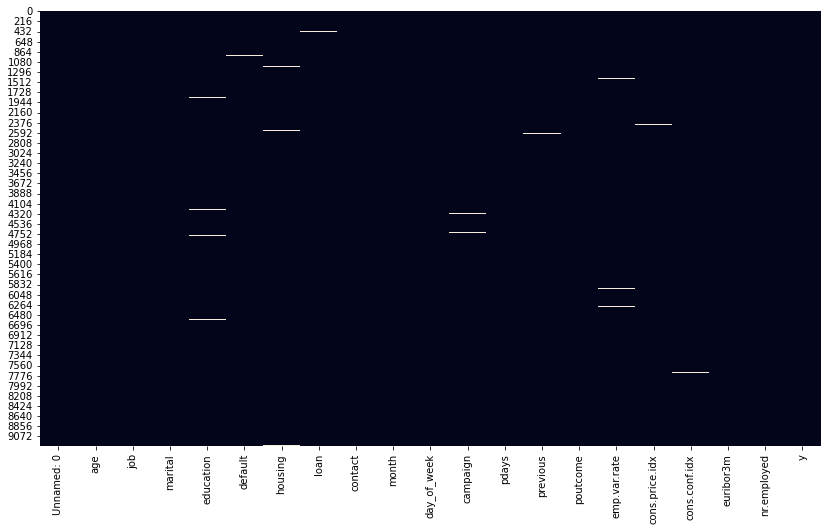

In [15]:
#Before treating missing values,to visualize the location of missing values using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(bank_data.isnull(), cbar=False)

In [18]:
#After checking thoroughly the dataset, i decided that all the unknown values of each feature 
#will be replaced with NaN. Even though it's a value, doesn't have any meaning.
bank_data = pd.read_csv('..\\..\\..\\..\\Desktop\\bank_marketing_data.csv',na_values = "unknown")

In [19]:
#check that unknown values are now gone and replaced with NaN values so we can replace them later on.
for i in categ_data_col:
    x=bank_data[i].value_counts()
    print(x,"\n\n")

admin.           2561
blue-collar      1734
technician       1475
services          780
management        653
retired           579
student           328
self-employed     321
entrepreneur      293
unemployed        242
housemaid         236
Name: job, dtype: int64 


married     5393
single      2885
divorced     980
Name: marital, dtype: int64 


university.degree      3031
high.school            2106
basic.9y               1163
professional.course    1152
basic.4y                920
basic.6y                436
illiterate                6
Name: education, dtype: int64 


no    7751
Name: default, dtype: int64 


yes    4922
no     4120
Name: housing, dtype: int64 


no     7669
yes    1371
Name: loan, dtype: int64 


cellular     6625
telephone    2655
Name: contact, dtype: int64 


may    2512
jul    1462
aug    1348
jun    1187
nov     880
apr     813
oct     377
mar     308
sep     294
dec      99
Name: month, dtype: int64 


thu    1999
tue    1886
wed    1851
mon    1831
fri    

In [20]:
#View a descriptive Statistics Summary for both numerical and categorical features
#after changing the unknown values to NaN values
bank_data.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9261.000000,9202,9258,8814,7751,9042,9040,9280,9280,...,9250.000000,9260.000000,9252.000000,9264,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000,9280
unique,NaN,NaN,11,3,7,1,2,2,2,10,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,2561,5393,3031,7751,4922,7669,6625,2512,...,NaN,NaN,NaN,7209,NaN,NaN,NaN,NaN,NaN,4640
mean,24826.214224,40.464421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.321514,888.323002,0.317013,NaN,-0.493038,93.482013,-40.184389,2.968689,5135.528215,NaN
std,12425.733760,11.969497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.296910,312.529933,0.700171,NaN,1.723534,0.634667,5.359439,1.890814,87.031409,NaN
min,1.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,14310.500000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,27390.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,36751.500000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [21]:
#Here are the total missing values we have per column.
bank_data.isnull().sum()

Unnamed: 0           0
age                 19
job                 78
marital             22
education          466
default           1529
housing            238
loan               240
contact              0
month                0
day_of_week          0
campaign            30
pdays               20
previous            28
poutcome            16
emp.var.rate        30
cons.price.idx      20
cons.conf.idx       24
euribor3m           25
nr.employed         19
y                    0
dtype: int64

##### After taking into consideration the value_counts() method, it is decided to drop the column default, since there are no valuable data- the majority said no (7751 out of 9280), and the rest are NaN - unkown values.
##### Also, the first column will removed, since there are numbers with unknown info and there is no reason to leave it in the dataset. 

In [22]:
#Dropping the features 'Unnamed: 0','default' from the bank_data dataframe.
#inplace equals to true in order to keep the existing dataframe and not create a new one.
bank_data.drop( ['Unnamed: 0','default'], axis=1,inplace=True)

In [23]:
# Function to return the rows which contain at least one missing value in their columns
def get_rows_with_missing_values(df):
    return df[df.isnull().any(axis=1)]
#we have 985 rows with at least one missing value in a column!
get_rows_with_missing_values(bank_data)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
5,25.0,admin.,single,NaN,no,no,telephone,jun,tue,7.0,999.0,0.0,nonexistent,-2.9,92.963,-40.8,1.286,5076.2,yes
21,61.0,NaN,single,NaN,yes,yes,cellular,may,tue,3.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
33,31.0,blue-collar,single,professional.course,no,no,telephone,may,thu,3.0,999.0,0.0,nonexistent,1.1,93.994,NaN,4.855,5191.0,no
44,49.0,management,married,university.degree,no,no,cellular,apr,wed,1.0,999.0,0.0,nonexistent,-1.8,NaN,-47.1,1.415,5099.1,yes
47,40.0,NaN,married,NaN,yes,yes,cellular,jul,thu,6.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,31.0,admin.,single,university.degree,yes,no,cellular,aug,tue,1.0,999.0,0.0,nonexistent,1.4,93.444,NaN,4.963,5228.1,no
9253,29.0,technician,single,professional.course,NaN,NaN,cellular,sep,fri,1.0,3.0,2.0,success,-1.1,94.199,-37.5,0.878,4963.6,yes
9265,43.0,services,married,basic.6y,NaN,no,cellular,may,fri,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
9269,34.0,technician,married,NaN,no,no,cellular,nov,tue,3.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes


In [24]:
#Here are the total null values we have per column.
bank_data.isnull().sum()

age                19
job                78
marital            22
education         466
housing           238
loan              240
contact             0
month               0
day_of_week         0
campaign           30
pdays              20
previous           28
poutcome           16
emp.var.rate       30
cons.price.idx     20
cons.conf.idx      24
euribor3m          25
nr.employed        19
y                   0
dtype: int64

In [25]:
#list of the categorical columns with missing values
categ_col_with_mv = ['job','marital','education','housing','loan','poutcome']
#for-loop to check all the possible 'values' of each categorical column and their 
#frequency-without the missing values
for i in categ_col_with_mv:
    x=bank_data[i].value_counts()
    print(x,"\n\n")

admin.           2561
blue-collar      1734
technician       1475
services          780
management        653
retired           579
student           328
self-employed     321
entrepreneur      293
unemployed        242
housemaid         236
Name: job, dtype: int64 


married     5393
single      2885
divorced     980
Name: marital, dtype: int64 


university.degree      3031
high.school            2106
basic.9y               1163
professional.course    1152
basic.4y                920
basic.6y                436
illiterate                6
Name: education, dtype: int64 


yes    4922
no     4120
Name: housing, dtype: int64 


no     7669
yes    1371
Name: loan, dtype: int64 


nonexistent    7209
failure        1104
success         951
Name: poutcome, dtype: int64 




##### For the treat of the categorical features, mode() method is selected to be used for the above 5 columns, and the missing values will be replaced with the higher frequency value, i.e. all the missing values of column poutcome, will be replaced with the 'nonexistent' value.

In [26]:
#for-loop to treat each feature with categorical data and use the mode() method
for i in categ_col_with_mv:
    bank_data[i].fillna(bank_data[i].mode()[0],inplace=True)

In [27]:
get_rows_with_missing_values(bank_data)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33,31.0,blue-collar,single,professional.course,no,no,telephone,may,thu,3.0,999.0,0.0,nonexistent,1.1,93.994,NaN,4.855,5191.0,no
44,49.0,management,married,university.degree,no,no,cellular,apr,wed,1.0,999.0,0.0,nonexistent,-1.8,NaN,-47.1,1.415,5099.1,yes
64,20.0,student,single,high.school,no,no,cellular,aug,fri,NaN,999.0,1.0,failure,-2.9,92.201,-31.4,0.869,5076.2,no
134,31.0,admin.,married,university.degree,no,no,cellular,jun,thu,2.0,999.0,1.0,failure,-2.9,NaN,-40.8,1.260,5076.2,yes
188,35.0,blue-collar,married,high.school,yes,no,cellular,nov,mon,2.0,999.0,1.0,failure,NaN,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,49.0,technician,divorced,professional.course,yes,no,cellular,oct,fri,2.0,3.0,1.0,success,-1.1,94.601,-49.5,0.972,NaN,yes
9136,50.0,blue-collar,married,basic.6y,no,no,telephone,may,mon,1.0,999.0,NaN,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
9190,NaN,blue-collar,married,high.school,yes,no,telephone,may,mon,2.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9198,45.0,management,married,university.degree,yes,no,cellular,apr,tue,NaN,7.0,1.0,success,-1.8,93.749,-34.6,0.642,5008.7,yes


In [28]:
# All the categorical features have now 9280 entries as we can see below - so no missing values.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9261 non-null   float64
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   housing         9280 non-null   object 
 5   loan            9280 non-null   object 
 6   contact         9280 non-null   object 
 7   month           9280 non-null   object 
 8   day_of_week     9280 non-null   object 
 9   campaign        9250 non-null   float64
 10  pdays           9260 non-null   float64
 11  previous        9252 non-null   float64
 12  poutcome        9280 non-null   object 
 13  emp.var.rate    9250 non-null   float64
 14  cons.price.idx  9260 non-null   float64
 15  cons.conf.idx   9256 non-null   float64
 16  euribor3m       9255 non-null   float64
 17  nr.employed     9261 non-null   f

In [29]:
bank_data.isnull().sum()
#As we can see from the table below, there are no missing values to the 5 categorical columns now.

age               19
job                0
marital            0
education          0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign          30
pdays             20
previous          28
poutcome           0
emp.var.rate      30
cons.price.idx    20
cons.conf.idx     24
euribor3m         25
nr.employed       19
y                  0
dtype: int64

In [30]:
bank_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9261.000000,9250.000000,9260.000000,9252.000000,9250.000000,9260.000000,9256.000000,9255.000000,9261.000000
mean,40.464421,2.321514,888.323002,0.317013,-0.493038,93.482013,-40.184389,2.968689,5135.528215
std,11.969497,2.296910,312.529933,0.700171,1.723534,0.634667,5.359439,1.890814,87.031409
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### As we can see from the above table, and using the information of each column, it is best for me to use median to treat the missing values for the following features ['campaign', 'pdays', 'previous'], because there is no logic to insert a mean value i.e. to campaign. You can't say that the number of times this customer was contacted during this campaign was 2.32 times. it must be an integer.

In [31]:
median_columns = ['campaign', 'pdays', 'previous']
#check the 3 columns-find the median value and replace missing values with the median
for i in median_columns:
    median_per_col=bank_data[i].median()
    print('The median value for',i,'is: ',median_per_col)
    bank_data[i].fillna(median_per_col,inplace=True)
    

The median value for campaign is:  2.0
The median value for pdays is:  999.0
The median value for previous is:  0.0


In [32]:
#for the rest numerical features we use the mean of the data in order to replace missing values.
mean_columns = ['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']
for i in mean_columns:
    mean_per_col=bank_data[i].mean()
    print('The mean value for',i,'is: ',mean_per_col)
    #replace the missing values with the mean value of the feature
    bank_data[i].fillna(mean_per_col,inplace=True)

The mean value for age is:  40.46442068891049
The mean value for emp.var.rate is:  -0.4930378378378379
The mean value for cons.price.idx is:  93.48201349892008
The mean value for cons.conf.idx is:  -40.18438850475367
The mean value for euribor3m is:  2.9686888168557535
The mean value for nr.employed is:  5135.528215095562


In [33]:
# Verification - As we can see there are no more NaN-missing values in our dataset.
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### (d) Duplicates.

In [34]:
bank_data.info()
bank_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   float64
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   housing         9280 non-null   object 
 5   loan            9280 non-null   object 
 6   contact         9280 non-null   object 
 7   month           9280 non-null   object 
 8   day_of_week     9280 non-null   object 
 9   campaign        9280 non-null   float64
 10  pdays           9280 non-null   float64
 11  previous        9280 non-null   float64
 12  poutcome        9280 non-null   object 
 13  emp.var.rate    9280 non-null   float64
 14  cons.price.idx  9280 non-null   float64
 15  cons.conf.idx   9280 non-null   float64
 16  euribor3m       9280 non-null   float64
 17  nr.employed     9280 non-null   f

(9280, 19)

In [35]:
#use the duplicated() method of pandas to see how many duplicated rows we 
#have on our dataframe and then, print it.
duplicate_rows = bank_data.duplicated()
print('Number of duplicate rows is:', duplicate_rows.sum())

Number of duplicate rows is: 360


In [36]:
#use of inplace =true to modify our current dataframe
bank_data.drop_duplicates(inplace=True)
duplicate_rows = bank_data.duplicated()
#As we can see below, now we don't have any duplicates in our dataframe, and the number of rows now are 8920
print('Number of duplicate rows is', duplicate_rows.sum())
bank_data.shape

Number of duplicate rows is 0


(8920, 19)

### (e) Outliers.

In [37]:
#check the numeric features
bank_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000
mean,40.495944,2.314910,884.661771,0.323206,-0.519080,93.477825,-40.164386,2.938266,5134.058771
std,11.994118,2.260093,316.997008,0.706289,1.721545,0.636238,5.379841,1.889575,87.206037
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,1.811000,5099.100000
75%,48.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.958000,5228.100000
max,98.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


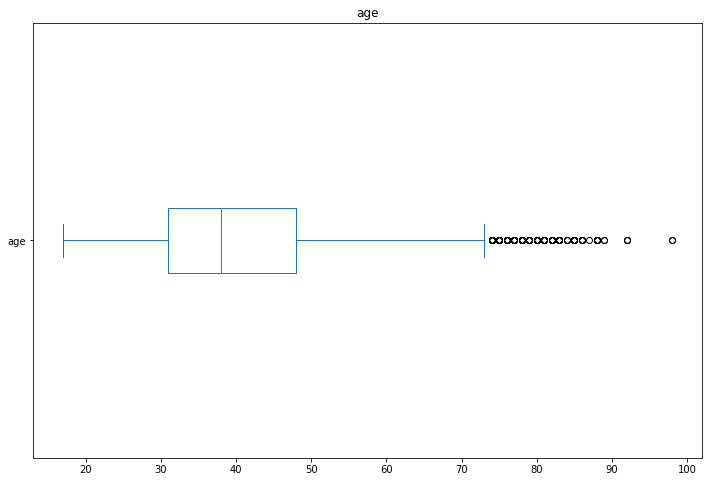

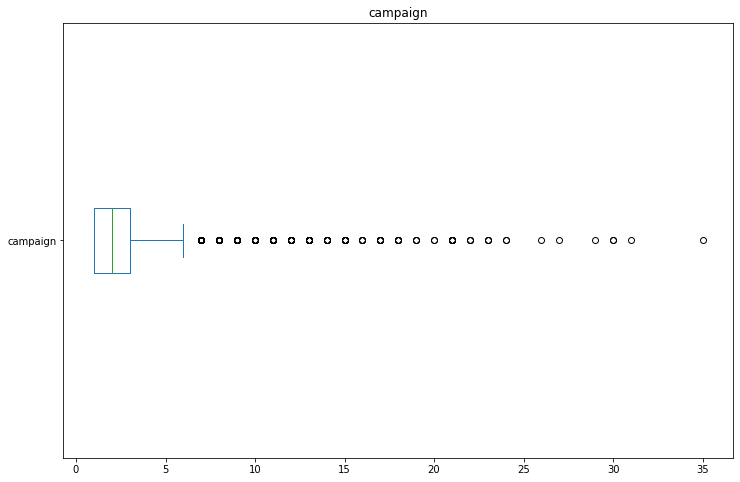

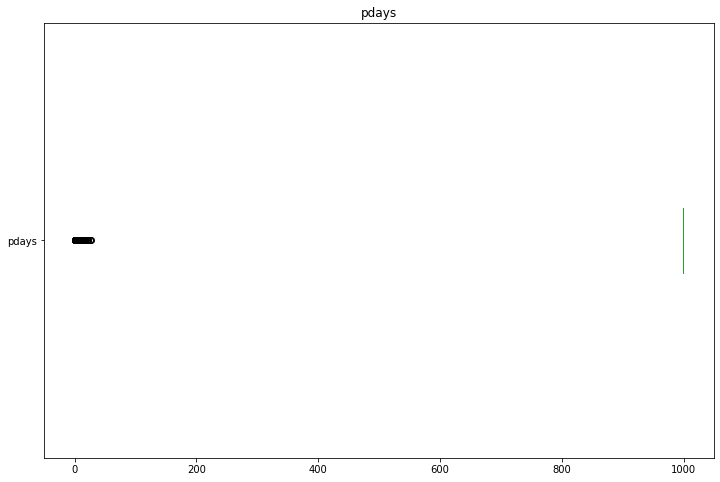

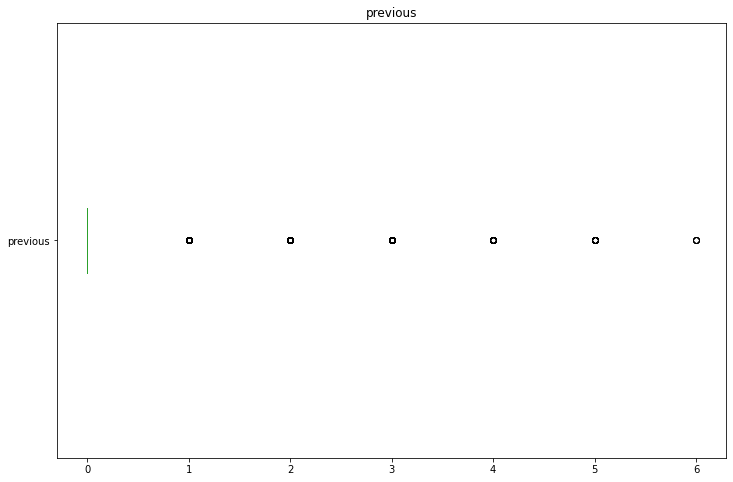

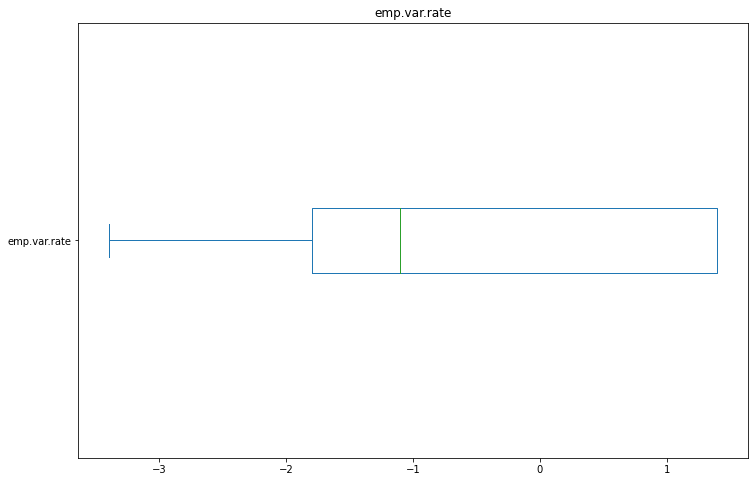

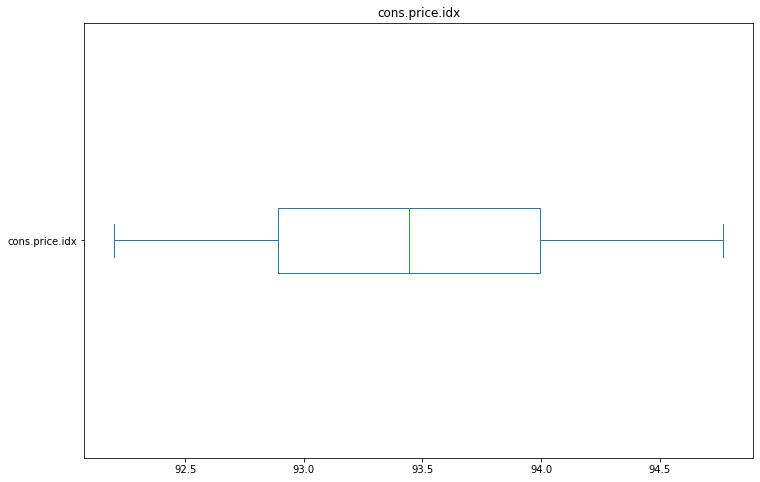

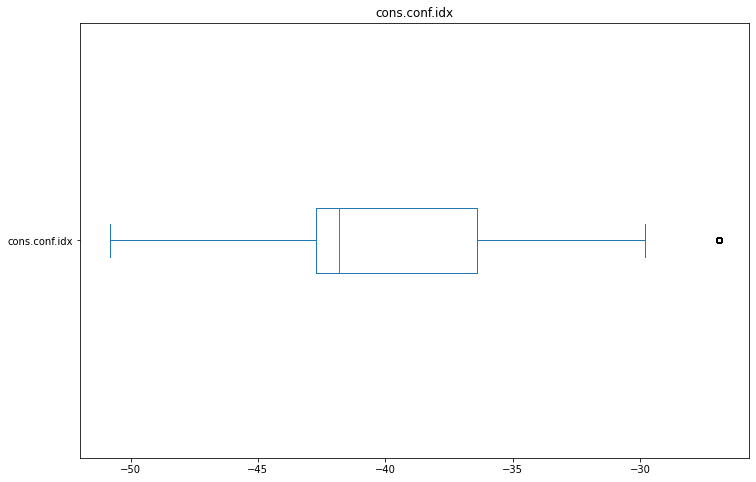

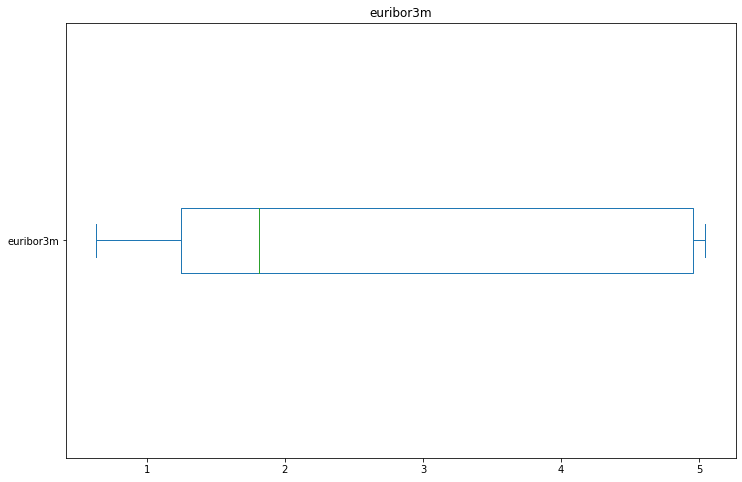

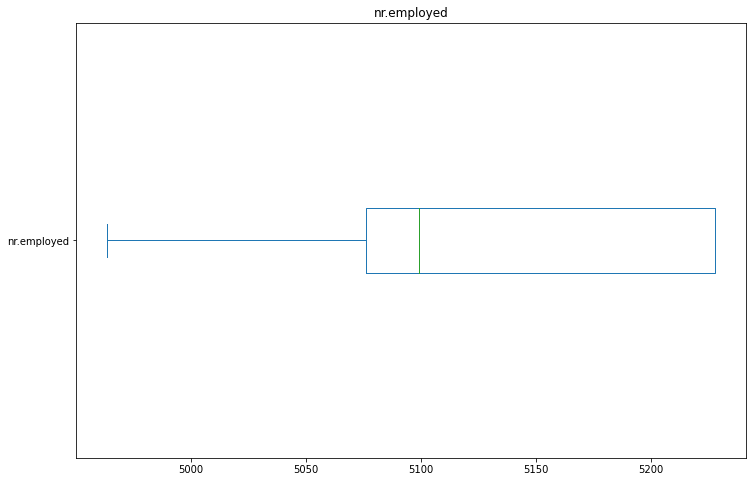

In [38]:
numerical_features=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx', 'euribor3m','nr.employed']
#for-loop to plot each numerical feature separetely in order to identify whether each one has outliers  
for i in numerical_features:
    print(bank_data.plot(y=i,kind='box',vert=False, figsize=(12,8),title=i))

##### Taking into consideration the above 9 plots, we can conclude that, campaign, previous, cons.conf.idx, age and pdays have outliers. As the assignment says, the two last features (age, pdays) will be treated later on. 
##### First let's try to see how many outliers the features have, to also verify what our plots 'say'.

In [39]:
# function that you pass an argument (the feature you want to check how many outliers has and 
#you get back a boolean array, identifying the outliers in the corresponding feature) # The quantile method
def number_of_outliers_in_a_feature(i):
    #outliers values are > Q3 + 1.5(IQR) and < Q1 - 1.5(IQR)
    bank_data_feature=bank_data[i]
    Q1 = bank_data_feature.quantile(0.25)
    Q3 = bank_data_feature.quantile(0.75)
    IQR = Q3-Q1
    
    summary = bank_data_feature.describe()
    Q1 = summary['25%']
    Q3 = summary['75%']
    
    # Verify the number of outliers
    is_outlier = (bank_data_feature < Q1 - 1.5*IQR)| (bank_data_feature > Q3 + 1.5*IQR)
    return is_outlier

In [40]:
#for-loop to check all numerical features and we print the number of outliers on each feature as we 
#can see below.
for i in numerical_features:
    num_outliers=number_of_outliers_in_a_feature(i)
    print('The numerical feature "',i,'" has',num_outliers.sum(),"outliers.")

The numerical feature " age " has 170 outliers.
The numerical feature " campaign " has 368 outliers.
The numerical feature " pdays " has 1027 outliers.
The numerical feature " previous " has 2019 outliers.
The numerical feature " emp.var.rate " has 0 outliers.
The numerical feature " cons.price.idx " has 0 outliers.
The numerical feature " cons.conf.idx " has 215 outliers.
The numerical feature " euribor3m " has 0 outliers.
The numerical feature " nr.employed " has 0 outliers.


In [41]:
bank_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000,8920.000000
mean,40.495944,2.314910,884.661771,0.323206,-0.519080,93.477825,-40.164386,2.938266,5134.058771
std,11.994118,2.260093,316.997008,0.706289,1.721545,0.636238,5.379841,1.889575,87.206037
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,1.811000,5099.100000
75%,48.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.958000,5228.100000
max,98.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### Considering the description and the number of outliers:
##### The feature " cons.conf.idx " , it is decided to replace the outliers' value with the mean of the rest (non-outliers).
###### The feature " campaign " ,  it is decided to remove those outliers because it seems to were artificial outliers -  max value 35 times a customer was contacted during this campaign seems illogical.

In [42]:
#Check the unique values of pdays before we remove the 999-value effect
bank_data['pdays'].unique()

array([999.,   1.,   3.,   6.,   7.,  10.,   4.,  13.,   9.,  12.,   2.,
        18.,   5.,  11.,  15.,   8.,  19.,   0.,  17.,  22.,  16.,  14.,
        21.,  27.,  25.,  26.])

##### Before check again for outliers on the feature 'pdays', first we need to introduce an additional feature to indicate whether a customer has been contacted before or not and remove the 999-value effect from pdays.

In [43]:
#Function to check if the value of column 'pdays' is 999, to return the string 'No', 
#otherwise to return back the string 'Yes'
def label_pdays (row):
    if row['pdays']==999.0:
        return 'No'
    else:
        return 'Yes'
# Create a new feature in the existig dataframe called 'Contacted_before' and call the function 
#to return a value yes or no to the new feature
Contacted_before=bank_data.apply (lambda row: label_pdays(row),axis=1)
#Insert the new feature next to the 'pdays' feature since is related to it.
bank_data.insert(11, 'Contacted_before', Contacted_before)

In [44]:
#we replace in the current dataframe the value 999 with 0, since it means that a customer has not been
#contacted before.
bank_data.replace({'pdays':{999:0}},inplace=True)

The numerical feature "pdays" has 1015 outliers.
AxesSubplot(0.125,0.125;0.775x0.755)


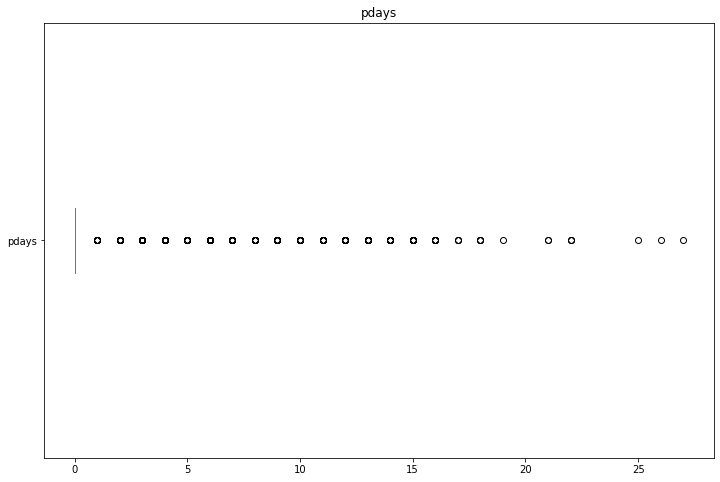

In [45]:
#check if there are outliers on the feature 'pdays' using the plot method and how many are using a function.
num_outliers_new=number_of_outliers_in_a_feature('pdays')
print('The numerical feature "pdays" has',num_outliers_new.sum(),"outliers.")
print(bank_data['pdays'].plot(kind='box',vert=False, figsize=(12,8),title='pdays'))

##### The outliers of the  'pdays' (1015) feature since they have large number of outliers, it's decided to delete these outliers, which might affect our models later on.

In [46]:
bank_data['pdays'].value_counts()

0.0     7905
3.0      312
6.0      297
4.0       76
7.0       42
2.0       40
9.0       38
10.0      33
5.0       31
12.0      29
13.0      28
15.0      17
11.0      15
8.0       13
14.0      12
1.0        9
16.0       7
18.0       4
17.0       3
22.0       3
21.0       2
19.0       1
27.0       1
25.0       1
26.0       1
Name: pdays, dtype: int64

In [47]:
pdays_outliers=number_of_outliers_in_a_feature('pdays')
# create new data frame without 'pdays' outliers.
#temporary new dataframe to check the values without 'pdays' outliers -in case to drop the column 
#without removing any columns
temp_df=bank_data
temp_df = temp_df[~pdays_outliers]
temp_df['pdays'].value_counts()

0.0    7905
Name: pdays, dtype: int64

##### Since the majority stated that the number of days that passed, after the customer was last contacted from a previous campaign is zero, and hence we removed the outliers, there is no need to leave this feature for future purposes, its useless. So, we drop the pdays column, however, we keep the new feature 'Contacted_before' so we can have meaningful data from the pdays column.

In [48]:
#drop the pdays column- we keep the new feature 'Contacted_before'
bank_data.drop( ['pdays'], axis=1,inplace=True)

In [49]:
bank_data

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,Contacted_before,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35.0,admin.,single,university.degree,yes,no,cellular,may,thu,1.0,No,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42.0,technician,married,professional.course,no,no,telephone,may,tue,1.0,No,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,36.0,admin.,married,university.degree,no,no,cellular,aug,mon,2.0,No,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,37.0,admin.,married,high.school,yes,yes,telephone,jul,wed,2.0,No,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,31.0,management,single,university.degree,yes,no,cellular,apr,thu,1.0,No,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,45.0,blue-collar,married,basic.6y,no,no,telephone,may,tue,6.0,No,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
9275,45.0,blue-collar,married,university.degree,yes,no,cellular,apr,thu,1.0,No,1.0,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,60.0,admin.,married,university.degree,yes,no,cellular,may,mon,2.0,No,0.0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,38.0,blue-collar,married,basic.9y,yes,no,cellular,apr,fri,1.0,No,1.0,failure,-1.8,93.075,-47.1,1.405,5099.1,no


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


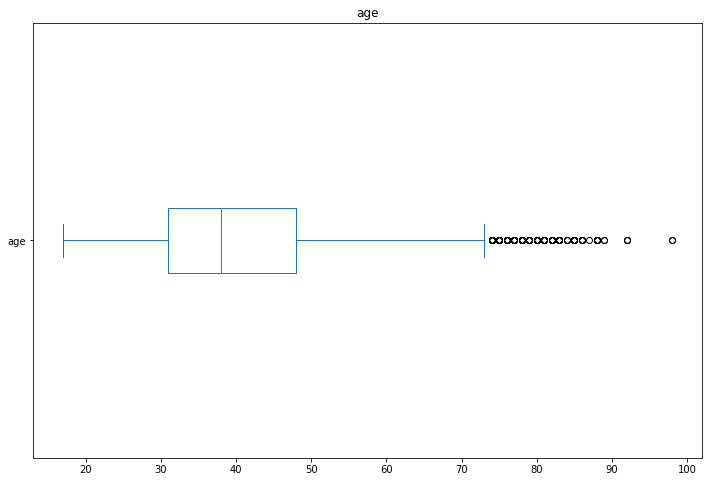

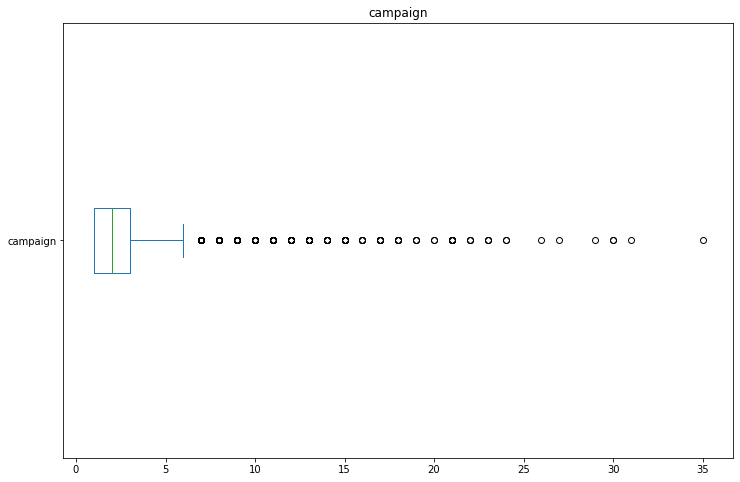

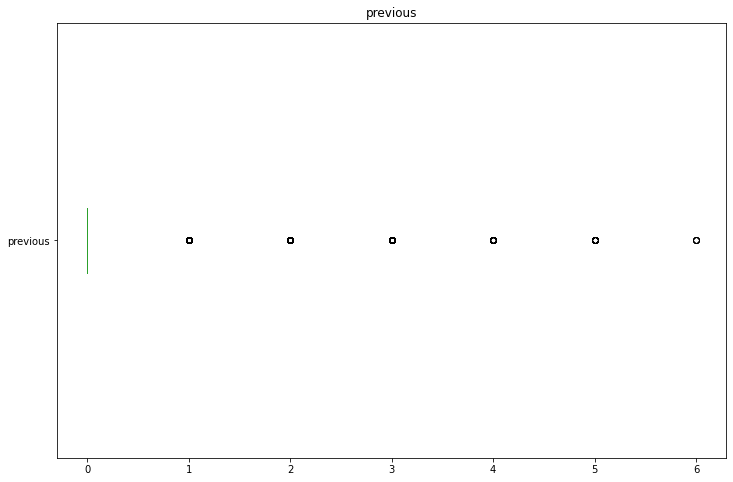

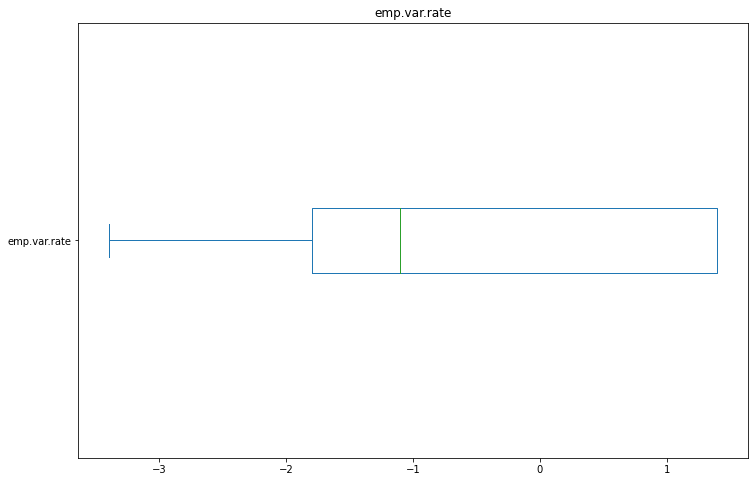

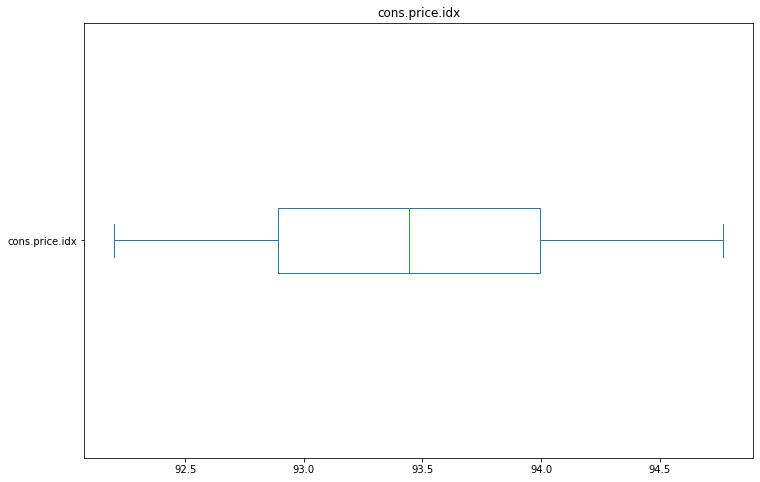

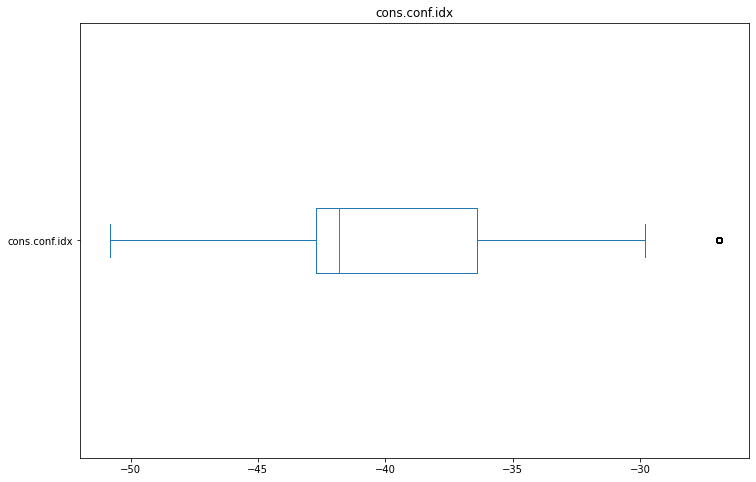

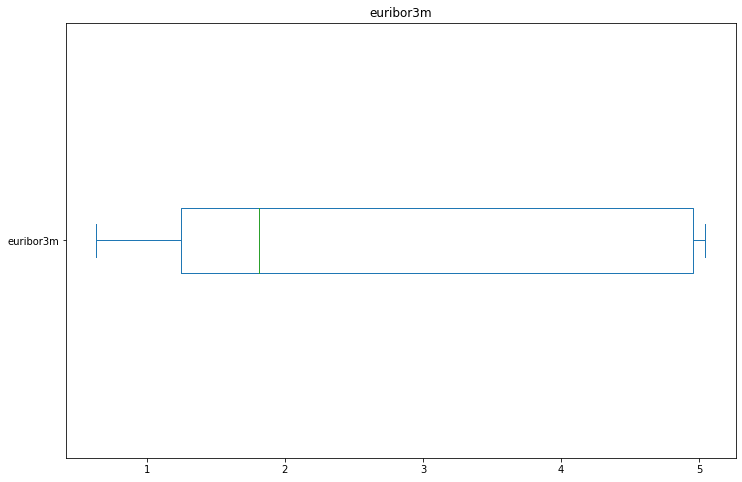

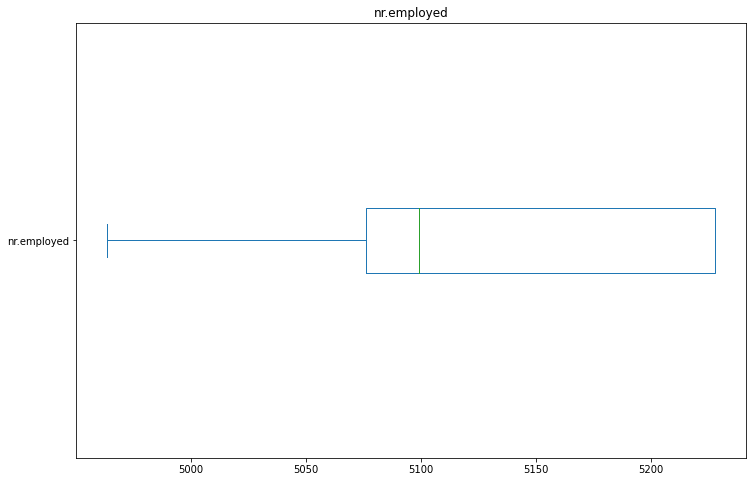

In [50]:
new_numerical_features=['age', 'campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                        'euribor3m','nr.employed']
#for-loop to plot each numerical feature separetely in order to identify whether each one has outliers  
for i in new_numerical_features:
    print(bank_data.plot(y=i,kind='box',vert=False, figsize=(12,8),title=i))

In [51]:
#print the number of outliers for each numerical feature
for i in new_numerical_features:
    num_outliers=number_of_outliers_in_a_feature(i)
    print('The numerical feature "',i,'" has',num_outliers.sum(),"outliers.")

The numerical feature " age " has 170 outliers.
The numerical feature " campaign " has 368 outliers.
The numerical feature " previous " has 2019 outliers.
The numerical feature " emp.var.rate " has 0 outliers.
The numerical feature " cons.price.idx " has 0 outliers.
The numerical feature " cons.conf.idx " has 215 outliers.
The numerical feature " euribor3m " has 0 outliers.
The numerical feature " nr.employed " has 0 outliers.


##### The next feature with the higher number of outliers is 'previous'.

In [52]:
bank_data['previous'].value_counts()

0.0    6901
1.0    1432
2.0     392
3.0     135
4.0      42
5.0      14
6.0       4
Name: previous, dtype: int64

In [53]:
print(bank_data.groupby("y")['previous'].value_counts())

y    previous
no   0.0         3798
     1.0          469
     2.0           44
     3.0            7
     4.0            4
     5.0            1
     6.0            1
yes  0.0         3103
     1.0          963
     2.0          348
     3.0          128
     4.0           38
     5.0           13
     6.0            3
Name: previous, dtype: int64


##### From the above table, we can see that, the outcome of this result somehow has been affected by the number of times the customer was contacted.  Considering that the majority of customers, that contacted at least one time, had a positive affect on the outcome. With this in mind, it is decided to leave as it is, those outliers in the feature 'previous'.

##### The next feature with the higher number of outliers is 'campaign '.

In [54]:
#get the rows with outliers in campaign feature
campaign_outliers=number_of_outliers_in_a_feature('campaign')
#remove the outliers in the dataset
bank_data = bank_data[~campaign_outliers]

In [55]:
bank_data['campaign'].value_counts()

1.0    4086
2.0    2325
3.0    1124
4.0     535
5.0     289
6.0     193
Name: campaign, dtype: int64

The numerical feature "campaign" has 0 outliers.
AxesSubplot(0.125,0.125;0.775x0.755)


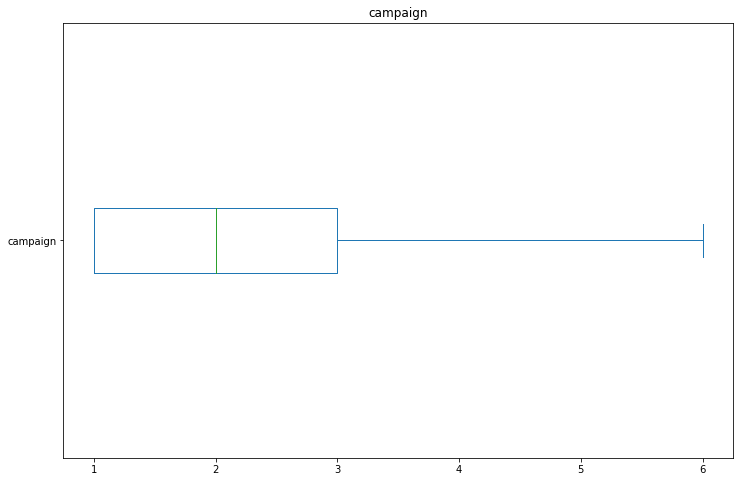

In [56]:
#Verify that there are no outliers on the feature 'campaign'
num_outliers_new=number_of_outliers_in_a_feature('campaign')
print('The numerical feature "campaign" has',num_outliers_new.sum(),"outliers.")

# re-plot and check that outliers are removed
print(bank_data['campaign'].plot(kind='box',vert=False, figsize=(12,8),title='campaign'))

##### As we can see above, after removing the outliers' value of the feature 'campaign', we don't have any outliers.

##### Replacement of outliers of the feature " cons.conf.idx " with the mean of the rest values-except outliers.

In [57]:
# Call the function and get back an array of outliers
cons_conf_idx_outliers=number_of_outliers_in_a_feature('cons.conf.idx')

In [58]:
# Compute the campaign mean, while not including the outliers in the calculation
cons_conf_idx_mean = bank_data[~cons_conf_idx_outliers]['cons.conf.idx'].mean()
cons_conf_idx_mean

-40.490299307198526

In [59]:
# We get the indices of the rows which have outliers on the feature 'cons.conf.idx'
cons_conf_idx_outliers_indices = bank_data[cons_conf_idx_outliers].index

In [60]:
# Replace the campaign_mean value (-40.49029930719869) for identified outliers based on index
bank_data.loc[cons_conf_idx_outliers_indices, 'cons.conf.idx'] =cons_conf_idx_mean

The numerical feature "cons.conf.idx" has 0 outliers.
AxesSubplot(0.125,0.125;0.775x0.755)


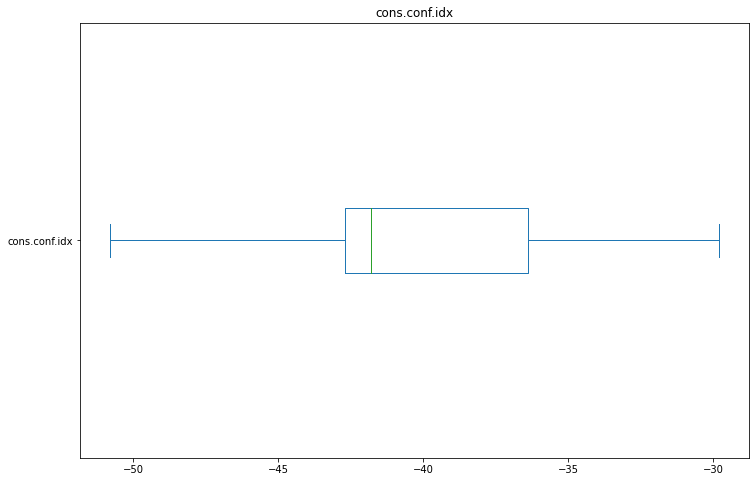

In [61]:
#Verify that there are no outliers on the feature 'cons.conf.idx'
num_outliers_new=number_of_outliers_in_a_feature('cons.conf.idx')
print('The numerical feature "cons.conf.idx" has',num_outliers_new.sum(),"outliers.")

# re-plot and check that outliers are removed
print(bank_data['cons.conf.idx'].plot(kind='box',vert=False, figsize=(12,8),title='cons.conf.idx'))

##### As we can see now from the plot, we don't have any more outliers to the feature 'cons.conf.idx'.  

In [62]:
#Verify that we no longer have outliers on the features - except age which will be handled with converting 
#it to categorical and previous feature which we chose to leave it that way.
for i in new_numerical_features:
    num_outliers=number_of_outliers_in_a_feature(i)
    print('The numerical feature "',i,'" has',num_outliers.sum(),"outliers.")

The numerical feature " age " has 167 outliers.
The numerical feature " campaign " has 0 outliers.
The numerical feature " previous " has 1996 outliers.
The numerical feature " emp.var.rate " has 0 outliers.
The numerical feature " cons.price.idx " has 0 outliers.
The numerical feature " cons.conf.idx " has 0 outliers.
The numerical feature " euribor3m " has 0 outliers.
The numerical feature " nr.employed " has 0 outliers.


In [63]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 0 to 9277
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8552 non-null   float64
 1   job               8552 non-null   object 
 2   marital           8552 non-null   object 
 3   education         8552 non-null   object 
 4   housing           8552 non-null   object 
 5   loan              8552 non-null   object 
 6   contact           8552 non-null   object 
 7   month             8552 non-null   object 
 8   day_of_week       8552 non-null   object 
 9   campaign          8552 non-null   float64
 10  Contacted_before  8552 non-null   object 
 11  previous          8552 non-null   float64
 12  poutcome          8552 non-null   object 
 13  emp.var.rate      8552 non-null   float64
 14  cons.price.idx    8552 non-null   float64
 15  cons.conf.idx     8552 non-null   float64
 16  euribor3m         8552 non-null   float64


### (f) Convert the age feature.

In [64]:
#use of pandas function cut(), to convert age to categorical feature.
bank_data.age=pd.cut(x=bank_data['age'],bins=[0,35,60,99],labels=['Young','Middle','Old'])
#pd.cut() convert the data to categorical type, and in order to use it later to convert our data, 
#we need to convert the age feature to object dtype 
bank_data['age'] = bank_data.age.astype(str)

In [65]:
#Verification that age values are now object dtype.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 0 to 9277
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8552 non-null   object 
 1   job               8552 non-null   object 
 2   marital           8552 non-null   object 
 3   education         8552 non-null   object 
 4   housing           8552 non-null   object 
 5   loan              8552 non-null   object 
 6   contact           8552 non-null   object 
 7   month             8552 non-null   object 
 8   day_of_week       8552 non-null   object 
 9   campaign          8552 non-null   float64
 10  Contacted_before  8552 non-null   object 
 11  previous          8552 non-null   float64
 12  poutcome          8552 non-null   object 
 13  emp.var.rate      8552 non-null   float64
 14  cons.price.idx    8552 non-null   float64
 15  cons.conf.idx     8552 non-null   float64
 16  euribor3m         8552 non-null   float64


### (g) Separation the feature space and the label variables.

In [66]:
#The feature space is the variable x, and contains all the columns except the last one.
x = bank_data.iloc[:,0:-1]
#The label variable is the variable y and contains only the last feature of the dataframe.
y = bank_data['y']
#We can see that the feature space has 18 features.
x.shape[1]

18

### (h) Exploration of three potential relationships between features.

In [67]:
#Show the description of all the feature space.
x.describe(include='all')

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,Contacted_before,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8552,8552,8552,8552,8552,8552,8552,8552,8552,8552.000000,8552,8552.000000,8552,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000
unique,3,11,3,7,2,2,2,10,5,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Middle,admin.,married,university.degree,yes,no,cellular,may,thu,NaN,No,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,4503,2425,4977,3204,4753,7291,6193,2326,1839,NaN,7530,NaN,6558,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.970416,NaN,0.334074,NaN,-0.570323,93.466626,-40.490299,2.884399,5131.506845
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.234494,NaN,0.716884,NaN,1.717375,0.638424,4.997267,1.886276,87.256433
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,-1.800000,92.893000,-42.700000,1.048000,5076.200000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,NaN,-1.100000,93.444000,-41.800000,1.531000,5099.100000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000,NaN,1.400000,93.994000,-36.400000,4.957000,5228.100000


##### Since the 5 socio-economic indicators are only dependent with the contact feature as the assignment states, i won't check these features for possible relationships. 
##### -First, we explore the potential relationship between marital and month. Whether there is a relationship between marital status with the most recent month of year during which the customer was contacted for the current campaign. -Both features are categorical, so bar plot will be used to check for possible relationship between values.

In [68]:
#First we print how many unique values each feature has.
print('There are {0} different education levels.'.format(len(bank_data['marital'].unique())))
print('There are {0} different outcomes of the previous campaign.'.format(len(bank_data['month'].unique())))

There are 3 different education levels.
There are 10 different outcomes of the previous campaign.


In [69]:
#let's look at the value counts of the categorical variables
print(bank_data['marital'].value_counts(),'\n')
print(bank_data['month'].value_counts())

married     4977
single      2658
divorced     917
Name: marital, dtype: int64 

may    2326
jul    1287
aug    1210
jun    1066
nov     834
apr     784
oct     369
mar     292
sep     290
dec      94
Name: month, dtype: int64


In [70]:
# A contigency table between the two features in case can help us draw a conclusion.
month_marital_table =pd.crosstab(bank_data['month'],bank_data['marital'])
month_marital_table

marital,divorced,married,single
month,,,
apr,89,428,267
aug,110,763,337
dec,7,64,23
jul,167,697,423
jun,100,639,327
mar,35,119,138
may,245,1401,680
nov,117,490,227
oct,22,212,135


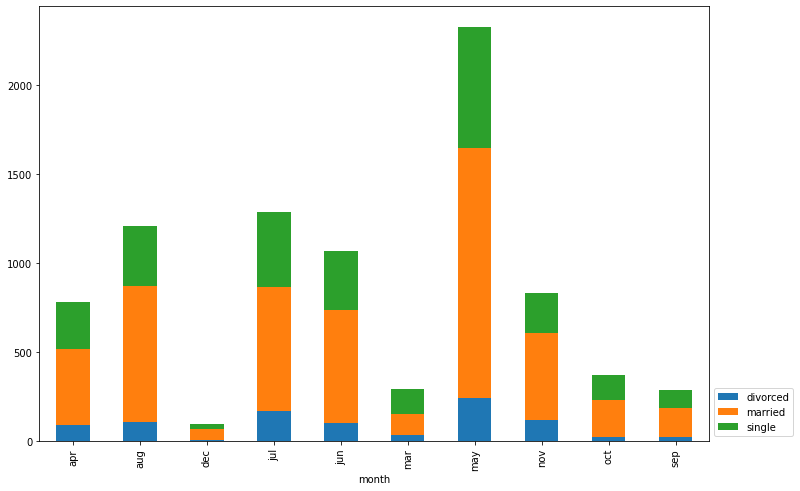

In [71]:
# A bar plot between the two features in case can help us draw a conclusion through visualisation.
month_marital_table.plot(kind='bar', stacked=True, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0), loc='lower left')

#### Now, from the graph we can immediately see that 4 months out of 10, are the most frequent months that the customers were contacted. We will further examine whether these 4 months (August,July,June and May) have any relationship with the marital status.

In [72]:
frequent_months = ['aug','jul','jun', 'may']
focused_bank_data = bank_data[bank_data['month'].isin(frequent_months)]

In [73]:
# A contigency table between the two features with focus only the 4 months of month feature.
focused_marital_month_table =pd.crosstab(focused_bank_data['month'],focused_bank_data['marital'])
focused_marital_month_table

marital,divorced,married,single
month,,,
aug,110,763,337
jul,167,697,423
jun,100,639,327
may,245,1401,680


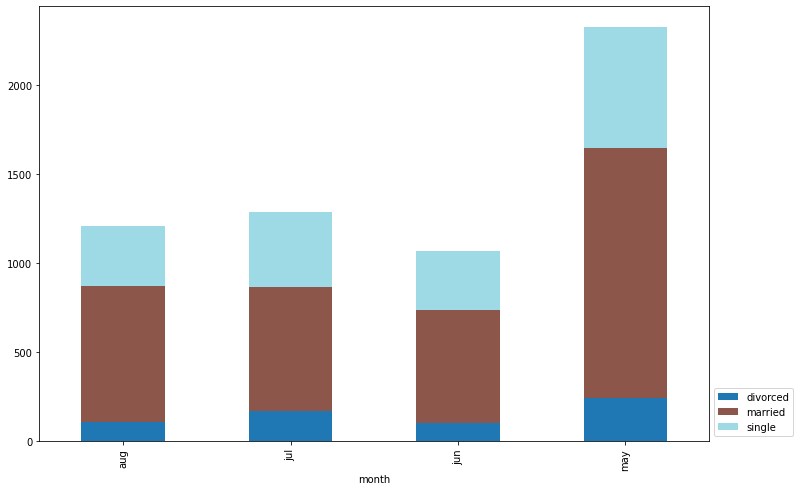

In [74]:
#plot focused months with marital status
focused_marital_month_table.plot(kind='bar', stacked = True,figsize=(12,8), legend=True, colormap='tab20')
plt.legend(bbox_to_anchor = (1,0), loc='lower left')

In [75]:
# Let's see if we can compute the chi squared test to determine whether there is a relationship 
#between the marital status and the most recent month that a customer was contacted

In [76]:
focused_marital_month_table_with_margins = pd.crosstab(focused_bank_data['month'],
                                                       focused_bank_data['marital'], margins=True)

In [77]:
#cumulative number of each row and column
focused_marital_month_table_with_margins

marital,divorced,married,single,All
month,,,,
aug,110,763,337,1210
jul,167,697,423,1287
jun,100,639,327,1066
may,245,1401,680,2326
All,622,3500,1767,5889


In [78]:
focused_marital_month_table_with_margins['All']

month
aug    1210
jul    1287
jun    1066
may    2326
All    5889
Name: All, dtype: int64

In [79]:
row_marginals = focused_marital_month_table_with_margins.iloc[0:4, 3]
row_marginals

month
aug    1210
jul    1287
jun    1066
may    2326
Name: All, dtype: int64

In [80]:
column_marginals =focused_marital_month_table_with_margins.iloc[4,0:3]
column_marginals

marital
divorced     622
married     3500
single      1767
Name: All, dtype: int64

In [81]:
#boolean array which shows us all the columns except the all column at the end
focused_marital_month_table_with_margins.columns != 'All'

array([ True,  True,  True, False])

In [82]:
column_marginals = focused_marital_month_table_with_margins.loc['All', focused_marital_month_table_with_margins.columns != 'All']
column_marginals

marital
divorced     622
married     3500
single      1767
Name: All, dtype: int64

In [83]:
#Construct Expected Frequency Table
expected = np.outer(row_marginals, column_marginals) / 5889

In [84]:
expected = pd.DataFrame(expected)
expected

,0,1,2
0,127.800985,719.137375,363.061640
1,135.933775,764.900662,386.165563
2,112.591611,633.554084,319.854305
3,245.673629,1382.407879,697.918492


In [85]:
observed = focused_marital_month_table.copy()

In [86]:
observed

marital,divorced,married,single
month,,,
aug,110,763,337
jul,167,697,423
jun,100,639,327
may,245,1401,680


In [87]:
print('The dimensions of the observed and expected dataframes are {0} and {1} respectively'
      .format(observed.shape, expected.shape))

The dimensions of the observed and expected dataframes are (4, 3) and (4, 3) respectively


In [88]:
expected.columns = observed.columns
expected.index = observed.index

In [89]:
chi2_statistic = (((observed-expected)**2)/expected).sum().sum()

In [90]:
degrees_of_freedom = (observed.shape[0]-1)*(observed.shape[1]-1)

In [91]:
p_value = 1 - stats.chi2.cdf(x=chi2_statistic,  df=degrees_of_freedom)

In [92]:
print('For x2 statistic {0:.3f} and {1} degrees of freedom the p value is {2:.5f}'.\
     format(chi2_statistic, degrees_of_freedom, p_value))

For x2 statistic 25.993 and 6 degrees of freedom the p value is 0.00022


##### Since p-value (0.00022) is smaller than 0.05, we reject the Ho hypothesis.There is evidence of dependance between the marital status and the most recent month that the person was contacted. There is a significant association between the two features.

##### -Another features to explore for potential relationship are the day_of_week and the job. We check if the job type has a relationship with the most recent contact day of the week during which the customer was contacted for the current campaign. - Both features are categorical, so bar plot will be used to check for possible relationship between values.

In [93]:
#First we print how many unique values each feature has.
print('There are {0} different days that indicates the most recent contact day of the week during which the \
customer was contacted for the current campaign.'.format(len(bank_data['day_of_week'].unique())))
print('There are {0} job types.'.format(len(bank_data['job'].unique())))

There are 5 different days that indicates the most recent contact day of the week during which the customer was contacted for the current campaign.
There are 11 job types.


In [94]:
#let's look at the value counts of the categorical variables
print(bank_data['day_of_week'].value_counts(),'\n')
print(bank_data['job'].value_counts())

thu    1839
tue    1759
wed    1711
mon    1684
fri    1559
Name: day_of_week, dtype: int64 

admin.           2425
blue-collar      1585
technician       1364
services          715
management        600
retired           547
student           319
self-employed     293
entrepreneur      264
unemployed        224
housemaid         216
Name: job, dtype: int64


In [95]:
# A contigency table between the two features in case can help us draw a conclusion.
job_day_of_week_table =pd.crosstab(bank_data['job'],bank_data['day_of_week'])
job_day_of_week_table

day_of_week,fri,mon,thu,tue,wed
job,,,,,
admin.,452,477,523,475,498
blue-collar,279,303,335,324,344
entrepreneur,51,57,57,51,48
housemaid,36,35,38,56,51
management,103,125,126,126,120
retired,93,104,95,138,117
self-employed,56,54,84,48,51
services,129,144,149,156,137
student,67,60,69,65,58


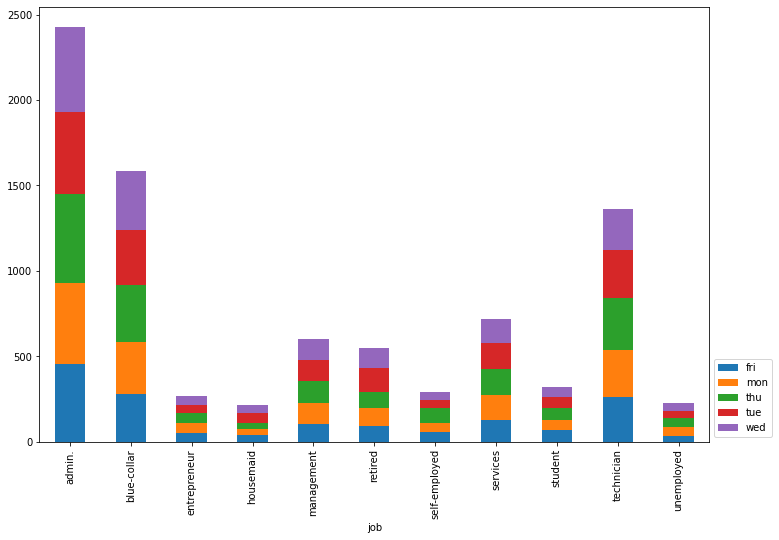

In [96]:
# A bar plot between the two features in case can help us draw a conclusion through visualisation.
job_day_of_week_table.plot(kind='bar', stacked=True, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0), loc='lower left')

In [97]:
# Now, from the graph we can immediately see that 3 job types out of 11, are the most frequent job types. 
#We will further examine whether these 3 job types (admin,blue-collar and technician)have
#any relationship with 5 different days that indicates the most recent contact day of the week during 
#which the customer was contacted for the current campaign.

In [98]:
frequent_jobs = ['admin.','blue-collar','technician']
focused_bank_data = bank_data[bank_data['job'].isin(frequent_jobs)]


In [99]:
# A contigency table between the two features with focus only 3 job types of the job feature.
focused_job_day_of_week_table =pd.crosstab(focused_bank_data['job'],focused_bank_data['day_of_week'])
focused_job_day_of_week_table


day_of_week,fri,mon,thu,tue,wed
job,,,,,
admin.,452,477,523,475,498
blue-collar,279,303,335,324,344
technician,260,274,309,279,242


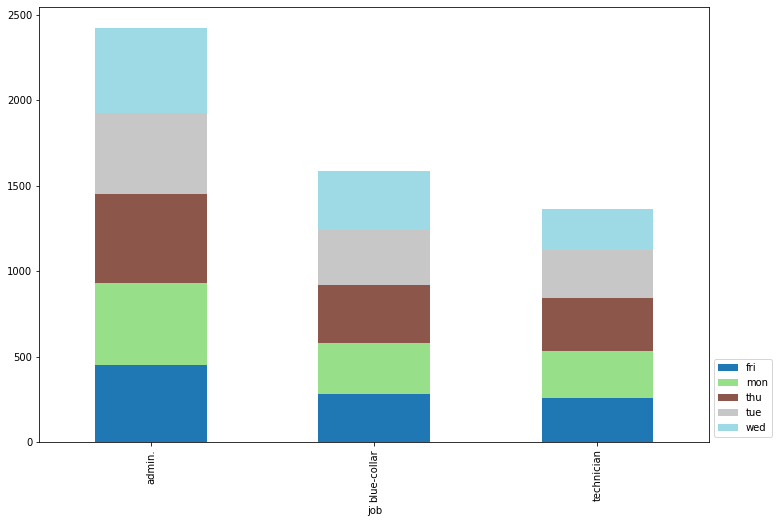

In [100]:
focused_job_day_of_week_table.plot(kind='bar', stacked = True,figsize=(12,8), legend=True, colormap='tab20')
plt.legend(bbox_to_anchor = (1,0), loc='lower left')

In [101]:
# Let's see if we can compute the chi squared test to determine whether 
# there is a relationship between the job type and day of the week

In [102]:
focused_job_day_of_week_table_with_margins = pd.crosstab(focused_bank_data['job'],
                                                         focused_bank_data['day_of_week'], margins=True)

In [103]:
#cumulative number of each row and column
focused_job_day_of_week_table_with_margins

day_of_week,fri,mon,thu,tue,wed,All
job,,,,,,
admin.,452,477,523,475,498,2425
blue-collar,279,303,335,324,344,1585
technician,260,274,309,279,242,1364
All,991,1054,1167,1078,1084,5374


In [104]:
focused_job_day_of_week_table_with_margins['All']

job
admin.         2425
blue-collar    1585
technician     1364
All            5374
Name: All, dtype: int64

In [105]:
row_marginals = focused_job_day_of_week_table_with_margins.iloc[0:3, 5]
row_marginals

job
admin.         2425
blue-collar    1585
technician     1364
Name: All, dtype: int64

In [106]:
column_marginals =focused_job_day_of_week_table_with_margins.iloc[3,0:5]
column_marginals


day_of_week
fri     991
mon    1054
thu    1167
tue    1078
wed    1084
Name: All, dtype: int64

In [107]:
#boolean array which shows us all the columns except the all column at the end
focused_job_day_of_week_table_with_margins.columns != 'All'

array([ True,  True,  True,  True,  True, False])

In [108]:
column_marginals = focused_job_day_of_week_table_with_margins.loc['All', focused_job_day_of_week_table_with_margins.columns != 'All']
column_marginals

day_of_week
fri     991
mon    1054
thu    1167
tue    1078
wed    1084
Name: All, dtype: int64

In [109]:
#Construct Expected Frequency Table
expected = np.outer(row_marginals, column_marginals) / 5374

In [110]:
expected = pd.DataFrame(expected)
expected

,0,1,2,3,4
0,447.185523,475.614068,526.604950,486.443990,489.151470
1,292.284146,310.865277,344.193338,317.943803,319.713435
2,251.530331,267.520655,296.201712,273.612207,275.135095


In [111]:
observed = focused_job_day_of_week_table.copy()
observed

day_of_week,fri,mon,thu,tue,wed
job,,,,,
admin.,452,477,523,475,498
blue-collar,279,303,335,324,344
technician,260,274,309,279,242


In [112]:
print('The dimensions of the observed and expected dataframes are {0} and {1} respectively'
      .format(observed.shape, expected.shape))

The dimensions of the observed and expected dataframes are (3, 5) and (3, 5) respectively


In [113]:
expected.columns = observed.columns
expected.index = observed.index

In [114]:
chi2_statistic = (((observed-expected)**2)/expected).sum().sum()

In [115]:
degrees_of_freedom = (observed.shape[0]-1)*(observed.shape[1]-1)

In [116]:
p_value = 1 - stats.chi2.cdf(x=chi2_statistic,  df=degrees_of_freedom)

In [117]:
print('For x2 statistic {0:.3f} and {1} degrees of freedom the p value is {2:.5f}'.\
     format(chi2_statistic, degrees_of_freedom, p_value))

For x2 statistic 8.610 and 8 degrees of freedom the p value is 0.37624


##### Since p-value (0.37624) is smaller than α, we accept the Ho hypothesis.There is no evidence of dependance between the job type and the most recent contact day of the week during which the customer was contacted for the current campaign. There is no significant association between the two features.

##### Last but not least, we explore for potential relationship between the education and the contact. We check if the education level has a relationship with how the customer was contacted for the current campaign. Both features are categorical, so bar plot will be used to check for possible relationship between values.

In [118]:
#First we print how many unique values each feature has.
print('There are {0} different education levels.'.format(len(bank_data['education'].unique())))
print('There are {0} ways that the customer was contacted for the current campaign.'.format(len(bank_data['contact'].unique())))

There are 7 different education levels.
There are 2 ways that the customer was contacted for the current campaign.


In [119]:
#let's look at the value counts of the categorical variables
print(bank_data['education'].value_counts(),'\n')
print(bank_data['contact'].value_counts())

university.degree      3204
high.school            1951
professional.course    1078
basic.9y               1064
basic.4y                842
basic.6y                407
illiterate                6
Name: education, dtype: int64 

cellular     6193
telephone    2359
Name: contact, dtype: int64


In [120]:
# A contigency table between the two features in case can help us draw a conclusion.
education_contact_table =pd.crosstab(bank_data['education'],bank_data['contact'])
education_contact_table

contact,cellular,telephone
education,,
basic.4y,546,296
basic.6y,258,149
basic.9y,701,363
high.school,1389,562
illiterate,5,1
professional.course,814,264
university.degree,2480,724


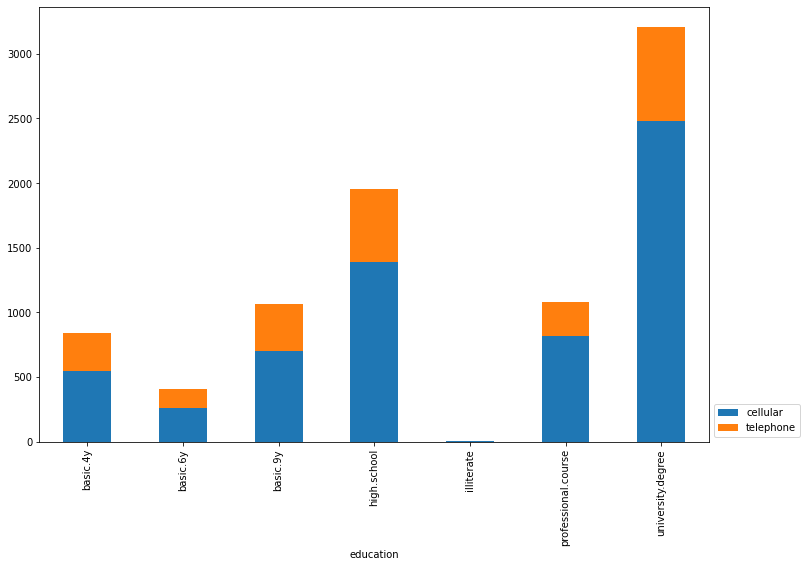

In [121]:
# A bar plot between the two features in case can help us draw a conclusion through visualisation.
education_contact_table.plot(kind='bar', stacked=True, figsize=(12,8),legend=True)
plt.legend(bbox_to_anchor = (1,0), loc='lower left')

##### Now, from the graph we can see that 4 educational levels out of 7, are the most frequent levels that the customers were contacted either via cellular or tlephone. We will further examine whether these 4 educational levels (basic.9y, high.school, professional.course and university.degree)have any relationship with the way they contacted.

In [122]:
frequent_edu_levels = ['basic.9y','high.school','professional.course', 'university.degree']
focused_bank_data = bank_data[bank_data['education'].isin(frequent_edu_levels)]

In [123]:
# A contigency table between the two features with focus only the 4 months of month feature.
focused_education_contact_table =pd.crosstab(focused_bank_data['education'],focused_bank_data['contact'])
focused_education_contact_table

contact,cellular,telephone
education,,
basic.9y,701,363
high.school,1389,562
professional.course,814,264
university.degree,2480,724


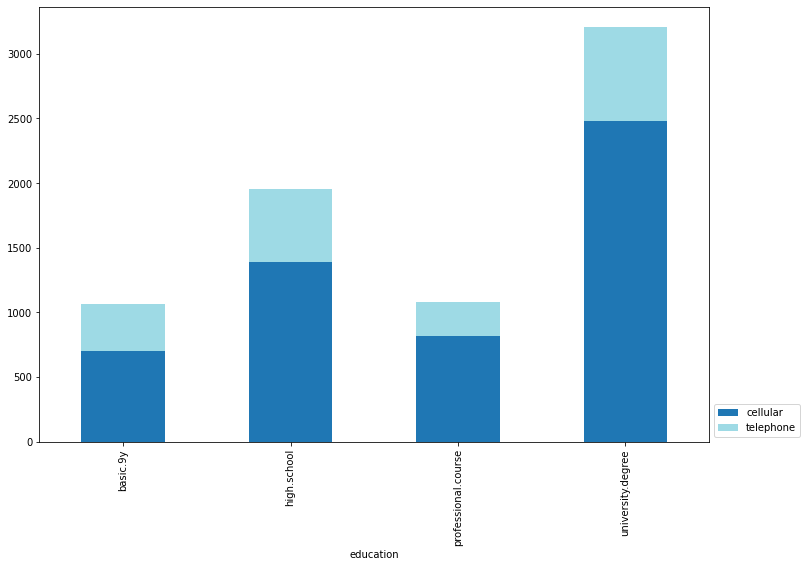

In [124]:
focused_education_contact_table.plot(kind='bar',stacked = True,figsize=(12,8),legend=True, colormap='tab20')
plt.legend(bbox_to_anchor = (1,0), loc='lower left')


In [125]:
# Let's see if we can compute the chi squared test to determine whether 
# there is a relationship between the education levels and contact

In [126]:
focused_education_contact_table_with_margins = pd.crosstab(focused_bank_data['education'],
                                                           focused_bank_data['contact'], margins=True)

In [127]:
#cumulative number of each row and column
focused_education_contact_table_with_margins

contact,cellular,telephone,All
education,,,
basic.9y,701,363,1064
high.school,1389,562,1951
professional.course,814,264,1078
university.degree,2480,724,3204
All,5384,1913,7297


In [128]:
focused_education_contact_table_with_margins['All']

education
basic.9y               1064
high.school            1951
professional.course    1078
university.degree      3204
All                    7297
Name: All, dtype: int64

In [129]:
row_marginals = focused_education_contact_table_with_margins.iloc[0:4, 2]
row_marginals

education
basic.9y               1064
high.school            1951
professional.course    1078
university.degree      3204
Name: All, dtype: int64

In [130]:
column_marginals =focused_education_contact_table_with_margins.iloc[4,0:2]
column_marginals


contact
cellular     5384
telephone    1913
Name: All, dtype: int64

In [131]:
#boolean array which shows us all the columns except the all column at the end
focused_education_contact_table_with_margins.columns != 'All'

array([ True,  True, False])

In [132]:
column_marginals = focused_education_contact_table_with_margins.loc['All', focused_education_contact_table_with_margins.columns != 'All']
column_marginals

contact
cellular     5384
telephone    1913
Name: All, dtype: int64

In [133]:
#Construct Expected Frequency Table
expected = np.outer(row_marginals, column_marginals) / 7297

In [134]:
expected = pd.DataFrame(expected)
expected

,0,1
0,785.059065,278.940935
1,1439.520899,511.479101
2,795.388790,282.611210
3,2364.031246,839.968754


In [135]:
observed = focused_education_contact_table.copy()
observed

contact,cellular,telephone
education,,
basic.9y,701,363
high.school,1389,562
professional.course,814,264
university.degree,2480,724


In [136]:
print('The dimensions of the observed and expected dataframes are {0} and {1} respectively'
      .format(observed.shape, expected.shape))

The dimensions of the observed and expected dataframes are (4, 2) and (4, 2) respectively


In [137]:
expected.columns = observed.columns
expected.index = observed.index

In [138]:
chi2_statistic = (((observed-expected)**2)/expected).sum().sum()

In [139]:
degrees_of_freedom = (observed.shape[0]-1)*(observed.shape[1]-1)

In [140]:
p_value = 1 - stats.chi2.cdf(x=chi2_statistic,  df=degrees_of_freedom)

In [141]:
print('For x2 statistic {0:.3f} and {1} degrees of freedom the p value is {2:.5f}'
      .format(chi2_statistic, degrees_of_freedom, p_value))

For x2 statistic 64.456 and 3 degrees of freedom the p value is 0.00000


##### Since p-value (0.00000) is smaller than α, we reject the Ho hypothesis.There is evidence of dependance between the education level and how the customer was contacted for the current campaign. There is a significant association between the two features.

In [142]:
#correlation matrix between all numerical features
correlation_matrix = bank_data.corr()
correlation_matrix

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
campaign,1.000000,-0.078556,0.153257,0.099187,-0.004205,0.137266,0.140076
previous,-0.078556,1.000000,-0.374884,-0.050387,0.059970,-0.442518,-0.516199
emp.var.rate,0.153257,-0.374884,1.000000,0.714807,0.026379,0.953258,0.859546
cons.price.idx,0.099187,-0.050387,0.714807,1.000000,-0.079402,0.558728,0.329987
cons.conf.idx,-0.004205,0.059970,0.026379,-0.079402,1.000000,0.111255,-0.015575
euribor3m,0.137266,-0.442518,0.953258,0.558728,0.111255,1.000000,0.936318
nr.employed,0.140076,-0.516199,0.859546,0.329987,-0.015575,0.936318,1.000000


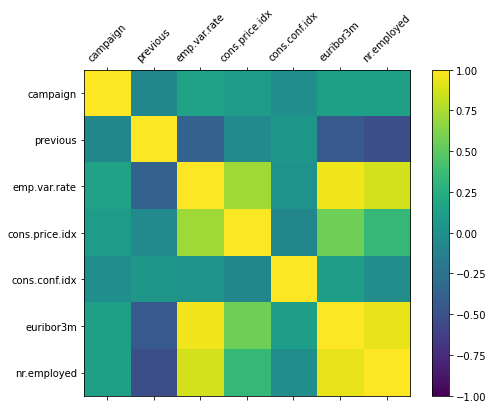

In [143]:
#A graphical representation of the correlation matrix as a color map.
numerical_features=bank_data[['campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']].copy()
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(correlation_matrix,vmin = -1, vmax = 1,)
plt.xticks(range(len(numerical_features.columns)), numerical_features.columns, rotation=45)
plt.yticks(range(len(numerical_features.columns)), numerical_features.columns)
plt.colorbar(im)
plt.show()

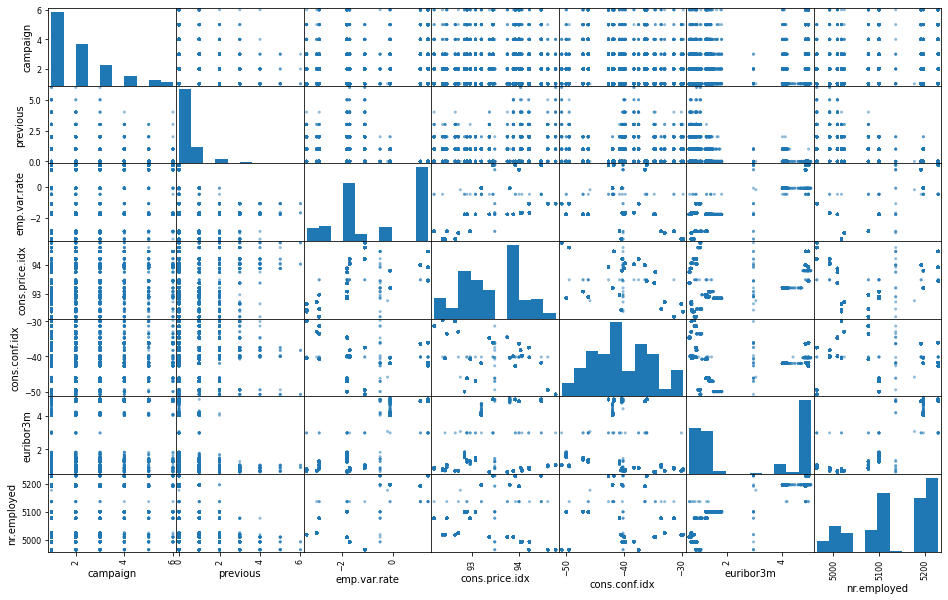

In [144]:
# We can also plot the scatter matrix 
pd.plotting.scatter_matrix(numerical_features,figsize=(16,10))
plt.show()

##### Observing the above correlation matrix and the graphical representation (the scatter matrix at this case does not show cleary any relationship between features), we can conclude that:
##### The number of employees (nr.employed) has a strong positive relationship with the country’s employment variation (emp.var.rate - 0.859546) and the Euribor 3-month rate (euribor3m - 0.936318).
##### The country’s employment variation (emp.var.rate) has also a strong positive relationship with the Euribor 3-month rate (euribor3m - 0.953258) and the country’s consumer price index (cons.price.idx - 0.714807).


### (i) Conversion of the categorical features to numerical ones.

In [145]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 0 to 9277
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8552 non-null   object 
 1   job               8552 non-null   object 
 2   marital           8552 non-null   object 
 3   education         8552 non-null   object 
 4   housing           8552 non-null   object 
 5   loan              8552 non-null   object 
 6   contact           8552 non-null   object 
 7   month             8552 non-null   object 
 8   day_of_week       8552 non-null   object 
 9   campaign          8552 non-null   float64
 10  Contacted_before  8552 non-null   object 
 11  previous          8552 non-null   float64
 12  poutcome          8552 non-null   object 
 13  emp.var.rate      8552 non-null   float64
 14  cons.price.idx    8552 non-null   float64
 15  cons.conf.idx     8552 non-null   float64
 16  euribor3m         8552 non-null   float64


In [146]:
categorical_features = bank_data[['age','job','marital','education','housing','loan','contact','month',
                                  'day_of_week','Contacted_before','poutcome','y']].copy()
categorical_features

,age,job,marital,education,housing,loan,contact,month,day_of_week,Contacted_before,poutcome,y
0,Young,admin.,single,university.degree,yes,no,cellular,may,thu,No,failure,no
1,Middle,technician,married,professional.course,no,no,telephone,may,tue,No,nonexistent,yes
2,Middle,admin.,married,university.degree,no,no,cellular,aug,mon,No,nonexistent,yes
3,Middle,admin.,married,high.school,yes,yes,telephone,jul,wed,No,nonexistent,yes
4,Young,management,single,university.degree,yes,no,cellular,apr,thu,No,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...
9272,Middle,entrepreneur,married,basic.6y,yes,no,cellular,sep,tue,Yes,success,yes
9274,Middle,blue-collar,married,basic.6y,no,no,telephone,may,tue,No,nonexistent,yes
9275,Middle,blue-collar,married,university.degree,yes,no,cellular,apr,thu,No,failure,yes
9276,Middle,admin.,married,university.degree,yes,no,cellular,may,mon,No,nonexistent,yes


##### Observing the array above, i notice that, the features 'age', 'month'  and 'education' are ordinal data, whereas the rest can be considered to be nominal data. We came to this conclusion because from these nominal features the order is not relevant. Yes/No answers are nominal data. The feature 'day_of_week' will be treated like nominal because according to the description ot this feature, just indicates the recent day which it might not be in order, since a friday of a month might have one week different.

##### Ordinal features - To encode the ordinal data into a numeric format let's first define a dictionary for each feature that will specify the mapping and use the pandas map function to apply it to the dataframe.

In [147]:
#Get the unique value of the feature age
bank_data['age'].unique()

array(['Young', 'Middle', 'Old'], dtype=object)

In [148]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
age_categories = {'Young':0, 'Middle':1, 'Old':2}
bank_data['age']=bank_data['age'].map(age_categories)

In [149]:
#Get the unique value of the feature education
bank_data['education'].unique()

array(['university.degree', 'professional.course', 'high.school',
       'basic.9y', 'basic.4y', 'basic.6y', 'illiterate'], dtype=object)

In [150]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
education_levels={'illiterate':0, 'basic.4y':1, 'basic.6y':2,'basic.9y':3,'high.school':4,
                  'professional.course':5,'university.degree':6}
bank_data['education']=bank_data['education'].map(education_levels)

In [151]:
#Get the unique value of the feature month
bank_data['month'].unique()

array(['may', 'aug', 'jul', 'apr', 'nov', 'sep', 'jun', 'oct', 'mar',
       'dec'], dtype=object)

In [152]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
months={'jan':1,'feb':2,'mar':3, 'apr':4, 'may':5,'jun':6,'jul':7,
                      'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
bank_data['month']=bank_data['month'].map(months)

In [153]:
#Get the unique value of the feature housing
bank_data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [154]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
housing_loan = {'no':0, 'yes':1}
bank_data['housing']=bank_data['housing'].map(housing_loan)

In [155]:
#Get the unique value of the feature loan
bank_data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [156]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
personal_loan = {'no':0, 'yes':1}
bank_data['loan']=bank_data['loan'].map(personal_loan)

In [157]:
#Get the unique value of the feature contacted_before
bank_data['Contacted_before'].unique()

array(['No', 'Yes'], dtype=object)

In [158]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
contact_b4 = {'No':0, 'Yes':1}
bank_data['Contacted_before']=bank_data['Contacted_before'].map(contact_b4)

In [159]:
#Get the unique value of the feature y
bank_data['y'].unique()

array(['no', 'yes'], dtype=object)

In [160]:
#Define a dictionary and apply it to the dataframe to change the feature to numeric.
campaign_outcome = {'no':0, 'yes':1}
bank_data['y']=bank_data['y'].map(campaign_outcome)

In [161]:
# Verification that the ordinal features are now numerical features.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 0 to 9277
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8552 non-null   int64  
 1   job               8552 non-null   object 
 2   marital           8552 non-null   object 
 3   education         8552 non-null   int64  
 4   housing           8552 non-null   int64  
 5   loan              8552 non-null   int64  
 6   contact           8552 non-null   object 
 7   month             8552 non-null   int64  
 8   day_of_week       8552 non-null   object 
 9   campaign          8552 non-null   float64
 10  Contacted_before  8552 non-null   int64  
 11  previous          8552 non-null   float64
 12  poutcome          8552 non-null   object 
 13  emp.var.rate      8552 non-null   float64
 14  cons.price.idx    8552 non-null   float64
 15  cons.conf.idx     8552 non-null   float64
 16  euribor3m         8552 non-null   float64


##### As we can see above, the ordinal features are encoded into a numeric format (int64 dtype).
##### Assuming that the rest features can be considered to be nominal, we apply the One-Hot-Encoding approach to convert them into numerical features using the get_dummies method.

In [162]:
bank_data = pd.get_dummies(bank_data)

In [163]:
bank_data.describe()

,age,education,housing,loan,month,campaign,Contacted_before,previous,emp.var.rate,cons.price.idx,...,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,...,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000,8552.000000
mean,0.632717,4.357577,0.555776,0.147451,6.703578,1.970416,0.119504,0.334074,-0.570323,93.466626,...,0.724158,0.275842,0.182297,0.196913,0.215037,0.205683,0.200070,0.122895,0.766838,0.110267
std,0.581893,1.645970,0.496908,0.354576,2.235455,1.234494,0.324400,0.716884,1.717375,0.638424,...,0.446964,0.446964,0.386111,0.397689,0.410872,0.404223,0.400076,0.328336,0.422869,0.313240
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-1.800000,92.893000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,5.000000,1.000000,0.000000,6.000000,2.000000,0.000000,0.000000,-1.100000,93.444000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,6.000000,1.000000,0.000000,8.000000,3.000000,0.000000,0.000000,1.400000,93.994000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,6.000000,1.000000,1.000000,12.000000,6.000000,1.000000,6.000000,1.400000,94.767000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Observing the table above, using the pandas get_dummies function, we converted the dataset to 38 total columns.

### (j) PCA analysis on the feature space.

In [164]:
#The feature space is the variable X-after the conversion, and contains all the columns except the 'y'.
X_pca = bank_data.loc[:, bank_data.columns != 'y']
#The label variable is the variable Y-after the conversion and contains only the 'y', 
#whether the customer signed-up for a term deposit account.
Y_pca = bank_data['y']

In [165]:
#list of the features to be scaled - rest are dummy variables
features_to_be_scandardised = X_pca[['age','education','housing','loan','month','campaign',
                                     'Contacted_before','previous','emp.var.rate','cons.price.idx',
                                     'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [166]:
#for-loop to standardise only the features are selected above and 
#then replace their standardised values to a new feature space.
X_std=X_pca
for i in features_to_be_scandardised:
    X_std.loc[:,i] = (X_pca[i] - X_pca[i].mean()) / X_pca[i].std()

In [167]:
# Apply the PCA method and project the feature space without selecting any Principal Components
pca_all = PCA(n_components=None)
# Check that the transformed feature space has indeed the same dimensions as features' space
X_transformed = pca_all.fit_transform(X_std)
print(X_transformed.shape)

(8552, 37)


In [168]:
# The explained variance ratio contribution for each Principal Component
explained_variance_ratio = pca_all.explained_variance_ratio_
print(explained_variance_ratio)

[2.49338794e-01 1.01250671e-01 8.27315016e-02 8.14862908e-02
 6.46470480e-02 6.11713786e-02 6.03186200e-02 5.09165035e-02
 4.69349363e-02 3.19053357e-02 2.37031097e-02 2.05369226e-02
 1.39302086e-02 1.37320412e-02 1.31220230e-02 1.25405575e-02
 1.22717371e-02 1.15124634e-02 8.23596686e-03 8.03475250e-03
 6.87781175e-03 4.45998097e-03 4.30060517e-03 3.42537630e-03
 2.56142146e-03 2.08794708e-03 1.90559824e-03 1.69232366e-03
 1.52894672e-03 1.41263914e-03 7.19450680e-04 7.07037446e-04
 4.91734066e-32 1.65625879e-33 1.30690280e-33 1.30690280e-33
 1.30690280e-33]


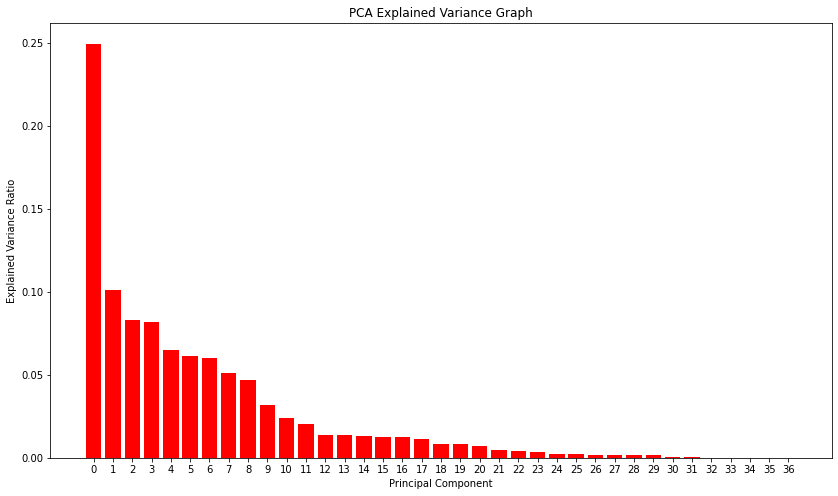

In [169]:
# Visualisation of the explained variance ratio contribution of each of the 37 Principal Components 
#using a bar chart which is the most suitable.
my_list = range(len(explained_variance_ratio))
plt.figure(figsize=(14,8))
plt.bar(range(len(explained_variance_ratio)),explained_variance_ratio, color='r')
plt.xticks(my_list, my_list)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Graph')
plt.show()

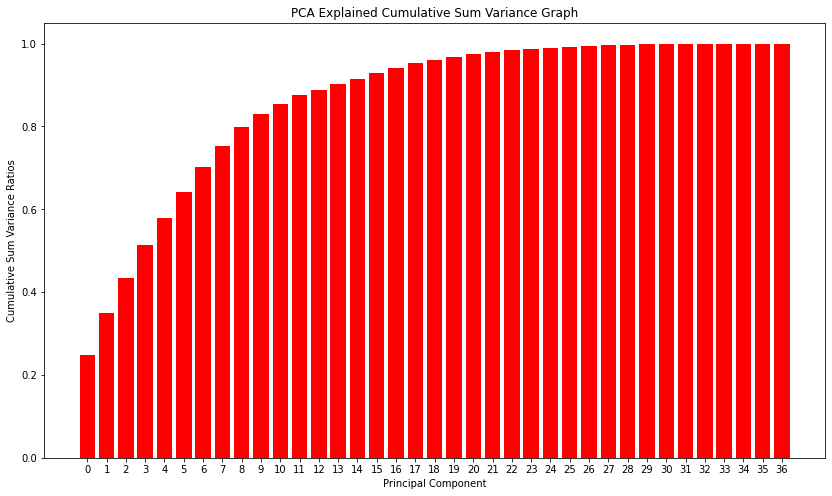

In [170]:
# We use the cumsum() to find the cumulative sum of ratios in order to choose how many
#Principal Components should we choose to ensure that our transformation captures 80% and 100%
cumulative_explained_ratio = explained_variance_ratio.cumsum()
plt.figure(figsize=(14,8))
plt.bar(range(len(explained_variance_ratio)),cumulative_explained_ratio, color='r')
my_list1 = range(len(cumulative_explained_ratio))
plt.xticks(my_list, my_list1)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Sum Variance Ratios')
plt.title('PCA Explained Cumulative Sum Variance Graph')
plt.show()

#### According to the graph above, in order to capture at least 80% of the dataset’s variance, it requires 9 principal components. The cumulative sum of ratios reaches 100% at the 30th element, thus, we will need at least 30 principal components.

## Exercise 2

### (a) Logistic Regression model.

In [171]:
#The feature space is the variable X-after the conversion, and contains all the columns except the 'y'.
X_lr = bank_data.loc[:, bank_data.columns != 'y']
#The label variable is the variable Y-after the conversion and contains only the 'y',
# whether the customer signed-up for a term deposit account.
Y_lr = bank_data['y']

In [172]:
# Before we train our model, we need to split our dataset into training and testing datasets
# Sklearn provides us with a built-in functionality to do so
X_train_lr, X_test_lr, y_train_lr, y_test_lr= train_test_split(X_lr, Y_lr, test_size = 0.3, random_state=1)

In [173]:
#features_to_be_scaled - dummy-converted features are excluded from the scaling
features_to_be_scandardised = ['age','education','housing','loan','month','campaign',
                                     'Contacted_before','previous','emp.var.rate','cons.price.idx',
                                     'cons.conf.idx', 'euribor3m', 'nr.employed']

In [174]:
#using ColumnTransformer which applies transformers to a specified set of columns of an array or pd DataFrame
ct = ColumnTransformer([("sc", StandardScaler(), features_to_be_scandardised)], remainder='passthrough')

In [175]:
#scaling the train set data
X_train_Std_lr=ct.fit_transform(X_train_lr)

In [176]:
# Initialise our classifier by instantiating a Logistic Regression object 
# C is the inverse of the regularisation parameter- λ=10000
# random_state simply allows for the result to be exactly re-producible 
lr_classifier = LogisticRegression(C = 0.0001,penalty='l2', random_state= 1)

In [177]:
# Train our classifier using our training dataset (features and labels)
lr_classifier.fit(X_train_Std_lr, y_train_lr)

LogisticRegression(C=0.0001, random_state=1)

In [178]:
#scaling the test set data
X_test_Std_lr=ct.transform(X_test_lr)

In [179]:
#make predictions from the trained model
y_pred_lr = lr_classifier.predict(X_test_Std_lr)

In [180]:
#(a) Accuracy
print('Misclassified samples {0} out of {1}, i.e. {2:.2f}% accurate'.\
      format((y_test_lr != y_pred_lr).sum(), len(y_test_lr), 
             (1 - (y_test_lr != y_pred_lr).sum()/len(y_test_lr))*100))

Misclassified samples 764 out of 2566, i.e. 70.23% accurate


In [181]:
#(b) Recall
recall_lr = recall_score(y_test_lr, y_pred_lr)
print("Logistic regression model can correctly detect whether a customer will purchase/sign-up for \
a term deposit with probability {0:.2f}".format(recall_lr))

Logistic regression model can correctly detect whether a customer will purchase/sign-up for a term deposit with probability 0.72


In [182]:
# (c) How precise is our Logistic regression model? 
precision_lr = precision_score(y_test_lr, y_pred_lr)
print("Logistic regression model's precision is {0:.2f}".format(precision_lr))

Logistic regression model's precision is 0.71


In [183]:
# (d) Compute ROC AUC of Logistic regression model.
auc_lr_score = roc_auc_score(y_true=y_test_lr, y_score=y_pred_lr)
print('ROC AUC score for Logistic regression model: {0:.3f}'.format(auc_lr_score))

ROC AUC score for Logistic regression model: 0.701


### (b) Random Forest model.

In [184]:
#The feature space is the variable X-after the conversion, and contains all the columns except the 'y'.
X_rf = bank_data.loc[:, bank_data.columns != 'y']
#The label variable is the variable Y-after the conversion and contains only the 'y', 
# whether the customer signed-up for a term deposit account.
Y_rf = bank_data['y']

In [185]:
# Split the dataset into two: a dataset for training and a dataset for testing.
X_train_rf, X_test_rf, Y_train_rf,Y_test_rf =train_test_split(X_rf, Y_rf, test_size = 0.3, random_state = 1)

In [186]:
# Create the classifier object and fit the the model to the data
# Random Forest model does not need to scale the feature space
rf_classifier = RandomForestClassifier(criterion='entropy',n_estimators=20, random_state= 1)

In [187]:
# Train our classifier using our training dataset (features and labels)
rf_classifier.fit(X_train_rf, Y_train_rf)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1)

In [188]:
# Test our classifier's performance
# Make some predictions using the testing dataset
#We don't need to standardise the testing features in Random Forest
Y_pred_rf = rf_classifier.predict(X_test_rf)

In [189]:
# (a) Accuracy
print('Misclassified samples {0} out of {1}, i.e. {2:.2f}% accurate'.\
      format((Y_test_rf != Y_pred_rf).sum(), len(Y_test_rf),\
             (1 - (Y_test_rf != Y_pred_rf).sum()/len(Y_test_rf))*100))

Misclassified samples 755 out of 2566, i.e. 70.58% accurate


In [190]:
#(b) Recall
recall_rf = recall_score(Y_test_rf, Y_pred_rf)
print("Random Forest model can correctly detect whether a customer will purchase/sign-up for a term \
deposit with probability {0:.2f}".format(recall_rf))

Random Forest model can correctly detect whether a customer will purchase/sign-up for a term deposit with probability 0.68


In [191]:
# (c) How precise is our Random Forest model? 
precision_rf = precision_score(Y_test_rf, Y_pred_rf)
print("Random Forest model's precision is {0:.2f}".format(precision_rf))

Random Forest model's precision is 0.74


In [192]:
# (d) Compute ROC AUC of Random Forest Model
auc_rf_score = roc_auc_score(y_true=Y_test_rf, y_score=Y_pred_rf)
print('ROC AUC score for random forest model: {0:.3f}'.format(auc_rf_score))

ROC AUC score for random forest model: 0.707


### (c) Neural Network model.

In [193]:
#The feature space is the variable X-after the conversion, and contains all the columns except the 'y'.
X_nn = bank_data.loc[:, bank_data.columns != 'y']
#The label variable is the variable Y-after the conversion and contains only the 'y', whether the customer signed-up for a term deposit account.
Y_nn = bank_data['y']

In [195]:
# Split the dataset into two: a dataset for training and a dataset for testing.
X_train_nn, X_test_nn, Y_train_nn, Y_test_nn =train_test_split(X_nn, Y_nn, test_size = 0.3, random_state = 1)

In [196]:
#using the columnTransformer from ex2 part(a) to standardise the train set data
X_train_Std_nn=ct.fit_transform(X_train_nn)

In [197]:
# Then, we define our Neural Network model. Let's start by defining a model with 3 hidden layers.
#In this implementation, lambda is denoted by the argument alpha (λ=1). 
#The random state is the same with the other models in order to have the same train and test samples.
nn_classifier =MLPClassifier(activation='logistic',hidden_layer_sizes=(10,10,5),alpha=1, random_state=1)
#train the model
nn_classifier.fit(X_train_Std_nn, Y_train_nn)

MLPClassifier(activation='logistic', alpha=1, hidden_layer_sizes=(10, 10, 5),
              random_state=1)

In [198]:
#using the columnTransformer from ex2 part(a) to standardise the test set data
X_test_Std_nn=ct.transform(X_test_nn)

In [199]:
#Get predictions using the standardised test data!
y_pred_nn = nn_classifier.predict(X_test_Std_nn)

In [200]:
# (a) Let's see the training and test scores of the model (accuracy)
print('Training score {0:4f}'.format(nn_classifier.score(X_train_Std_nn, Y_train_nn)))
print('Testing score {0:4f}'.format(nn_classifier.score(X_test_Std_nn, Y_test_nn)))
#The training accuracy is (somewhat) higher than the testing accuracy. 
#This is evidence of slight overfitting!

Training score 0.524724
Testing score 0.523772


In [201]:
#(b) Recall computation
recall_nn = recall_score(Y_test_nn,y_pred_nn)
print("Neural Network model can correctly detect whether a customer will purchase/sign-up \
for a term deposit with probability {0:.2f}".format(recall_nn))

Neural Network model can correctly detect whether a customer will purchase/sign-up for a term deposit with probability 1.00


In [202]:
# (c) How precise is our Neural Network model? 
precision_nn = precision_score(Y_test_nn, y_pred_nn)
print("Neural Network model's precision is {0:.2f}".format(precision_nn))

Neural Network model's precision is 0.52


In [203]:
# (d) Compute ROC AUC of Neural Network model.
auc_nn_score = roc_auc_score(y_true=Y_test_nn, y_score=y_pred_nn)
print('ROC AUC score for Neural Network model: {0:.3f}'.format(auc_nn_score))

ROC AUC score for Neural Network model: 0.500


##### Plot the ROC curves of all three models on the same graph.

In [204]:
# Get the prediction probability for each data point of the test dataset
lr_pred_probs = lr_classifier.predict_proba(X_test_Std_lr) 
rf_pred_probs = rf_classifier.predict_proba(X_test_rf)
nn_pred_probs = nn_classifier.predict_proba(X_test_Std_nn)

print('Score for logistic regression model is {0:.4f}'.format(lr_classifier.score(X_test_Std_lr, y_test_lr)))
print('Score for random forest model is {0:.4f}'.format(rf_classifier.score(X_test_rf, Y_test_rf)))
print('Score for neural network model is {0:.4f}'.format(nn_classifier.score(X_test_Std_nn, Y_test_nn)))

Score for logistic regression model is 0.7023
Score for random forest model is 0.7058
Score for neural network model is 0.5238


In [205]:
# Calculate the False Positive Rate and True Positive Rate for various classification thresholds
# ROC Curve. Note that here we specify which of the two probabilities corresponds to which label
#pos_label means the positive label , we specify the class which is 'M'
#false positve rate - true positive rate
fpr1, tpr1, thres1 = roc_curve(y_test_lr, lr_pred_probs[:,1], pos_label=1)
fpr2, tpr2, thres2 = roc_curve(Y_test_rf, rf_pred_probs[:,1], pos_label=1)
fpr3, tpr3, thres3 = roc_curve(Y_test_nn, nn_pred_probs[:,1], pos_label=1)

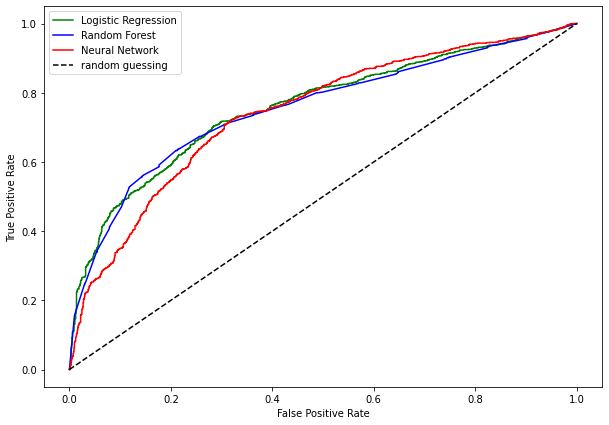

In [206]:
# Plot the ROC curves of all three models on the same graph.
plt.figure(figsize=(10,7)) 
plt.plot(fpr1, tpr1, color='g', label='Logistic Regression')
plt.plot(fpr2, tpr2, color='b', label='Random Forest')
plt.plot(fpr3, tpr3, color='r', label='Neural Network')
plt.plot([0,1],[0,1], ls='--', color = 'k', label = 'random guessing')# the diagonal line
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend() #for the labels of the plots
plt.show()

### Based on the metrics of each model and also the above plot about ROC AUC, the model to predict whether a customer will purchase/sign-up for a term deposit  would be the Logistic Regression model. On the plot you can't decide clearly which one has the biggest area under the curve and which one is closer to 1. Although, based on the metrics, It scored higher values at accuracy, precision, and probability to predict correctly the result.

## Exercise 3

### (a) Logistic Regression model - different values for the regularization parameter and number of principal components.


For 1 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 71.12%
For regularization parameter λ= 1e-15 -Classifier accuracy is 71.12%
For regularization parameter λ= 1e-05 -Classifier accuracy is 71.12%
For regularization parameter λ= 0.001 -Classifier accuracy is 71.12%
For regularization parameter λ= 0.1 -Classifier accuracy is 71.12%
For regularization parameter λ= 1 -Classifier accuracy is 71.16%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.81%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


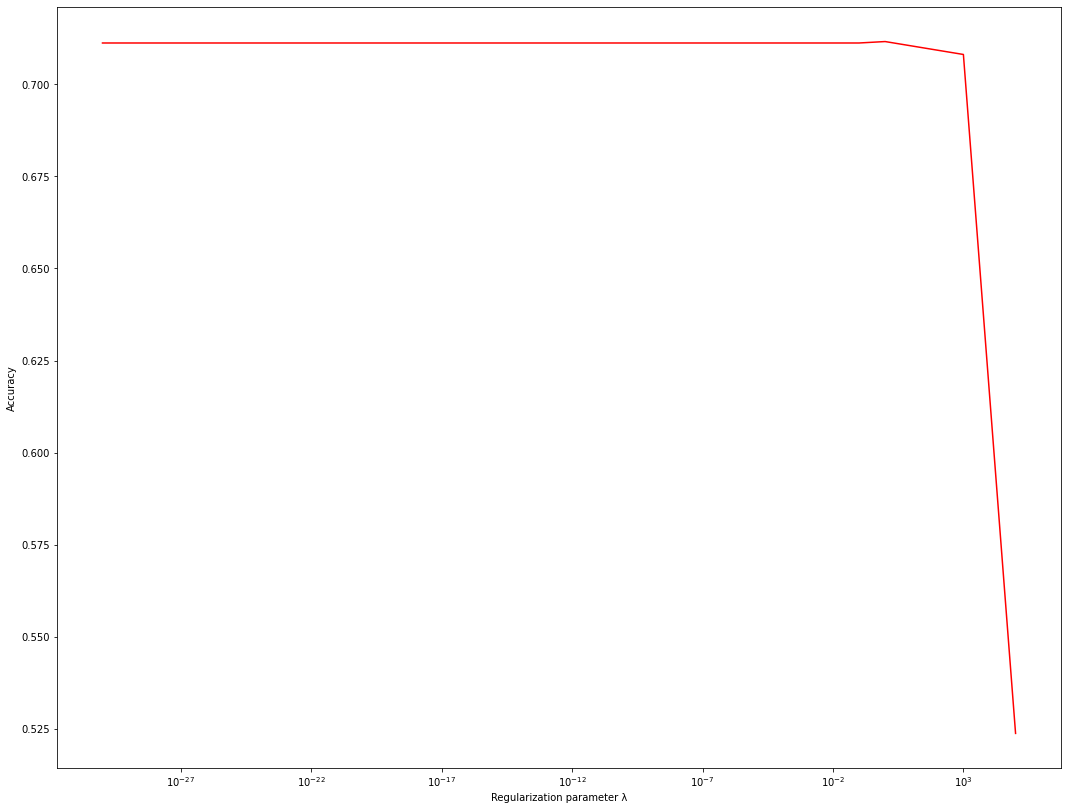


For 2 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 71.24%
For regularization parameter λ= 1e-15 -Classifier accuracy is 71.24%
For regularization parameter λ= 1e-05 -Classifier accuracy is 71.24%
For regularization parameter λ= 0.001 -Classifier accuracy is 71.24%
For regularization parameter λ= 0.1 -Classifier accuracy is 71.24%
For regularization parameter λ= 1 -Classifier accuracy is 71.24%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.38%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


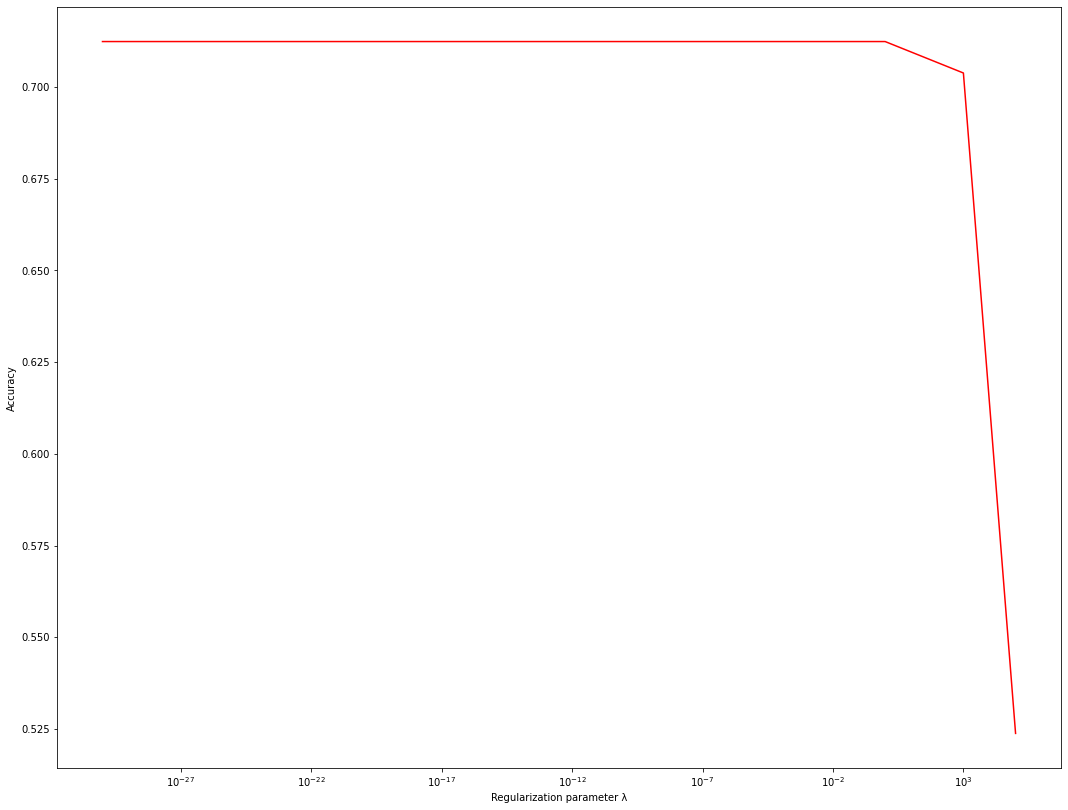


For 3 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 70.93%
For regularization parameter λ= 1e-15 -Classifier accuracy is 70.93%
For regularization parameter λ= 1e-05 -Classifier accuracy is 70.93%
For regularization parameter λ= 0.001 -Classifier accuracy is 70.93%
For regularization parameter λ= 0.1 -Classifier accuracy is 70.93%
For regularization parameter λ= 1 -Classifier accuracy is 71.01%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.50%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


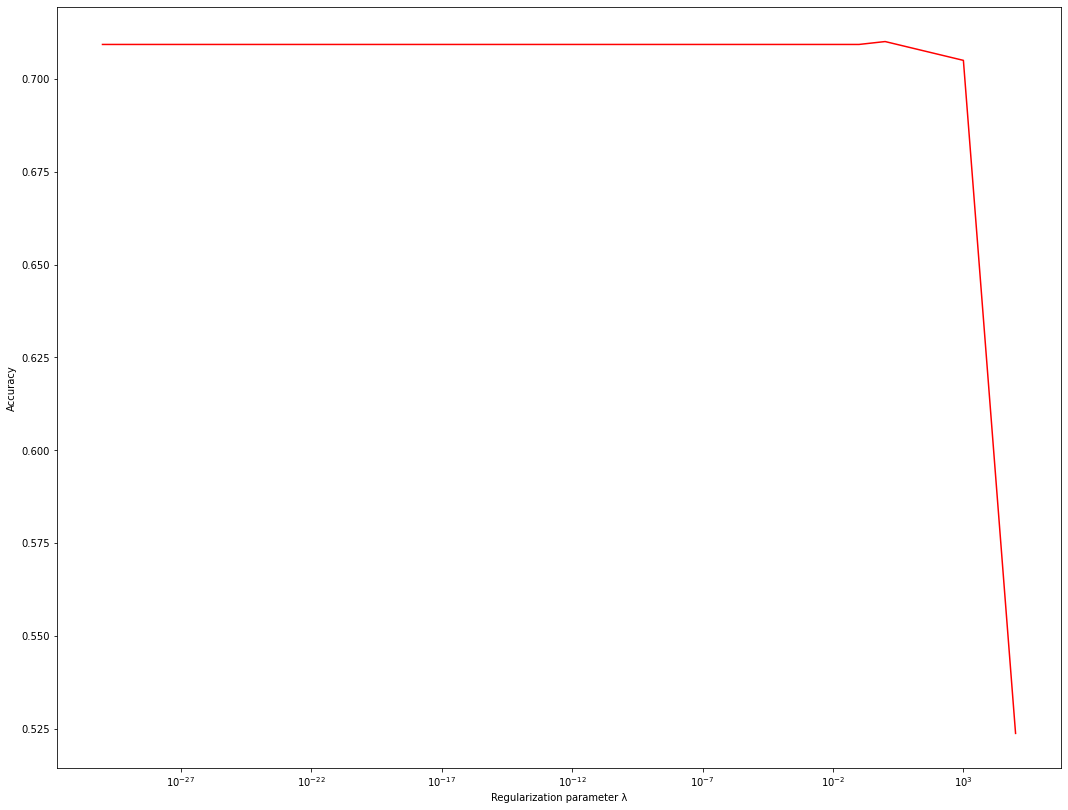


For 4 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 69.95%
For regularization parameter λ= 1e-15 -Classifier accuracy is 69.95%
For regularization parameter λ= 1e-05 -Classifier accuracy is 69.95%
For regularization parameter λ= 0.001 -Classifier accuracy is 69.95%
For regularization parameter λ= 0.1 -Classifier accuracy is 69.95%
For regularization parameter λ= 1 -Classifier accuracy is 69.95%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.23%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


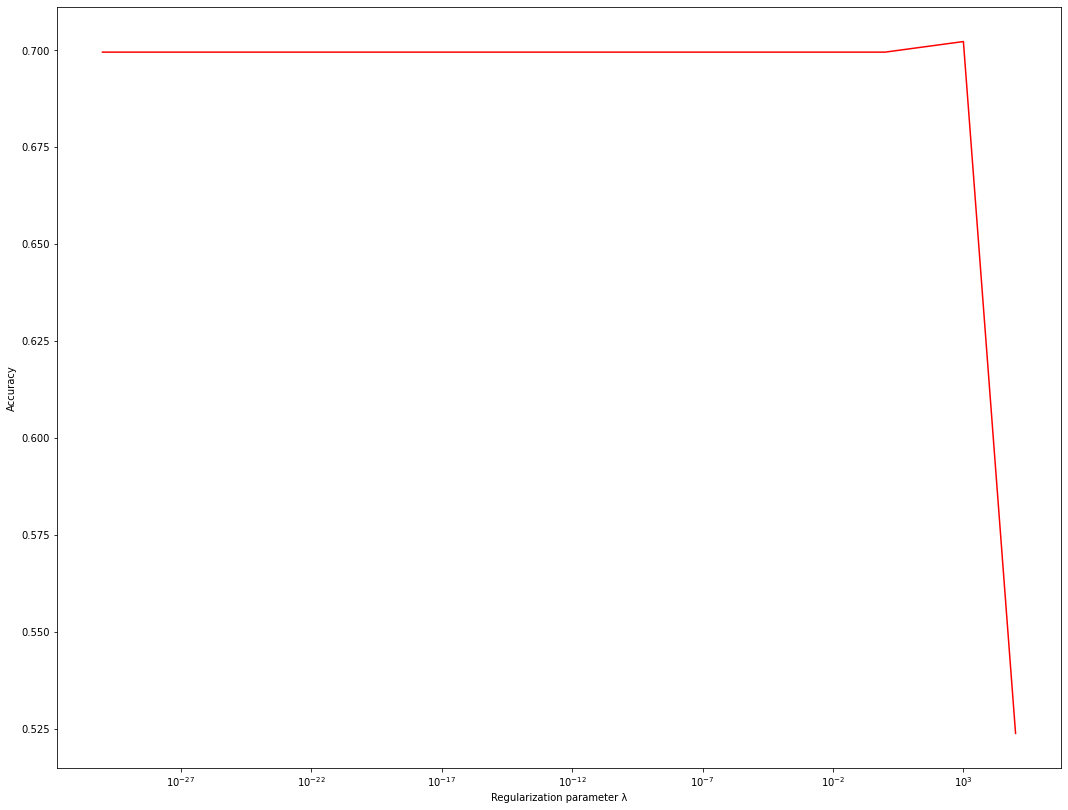


For 5 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 69.88%
For regularization parameter λ= 1e-15 -Classifier accuracy is 69.88%
For regularization parameter λ= 1e-05 -Classifier accuracy is 69.88%
For regularization parameter λ= 0.001 -Classifier accuracy is 69.88%
For regularization parameter λ= 0.1 -Classifier accuracy is 69.88%
For regularization parameter λ= 1 -Classifier accuracy is 69.99%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.15%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


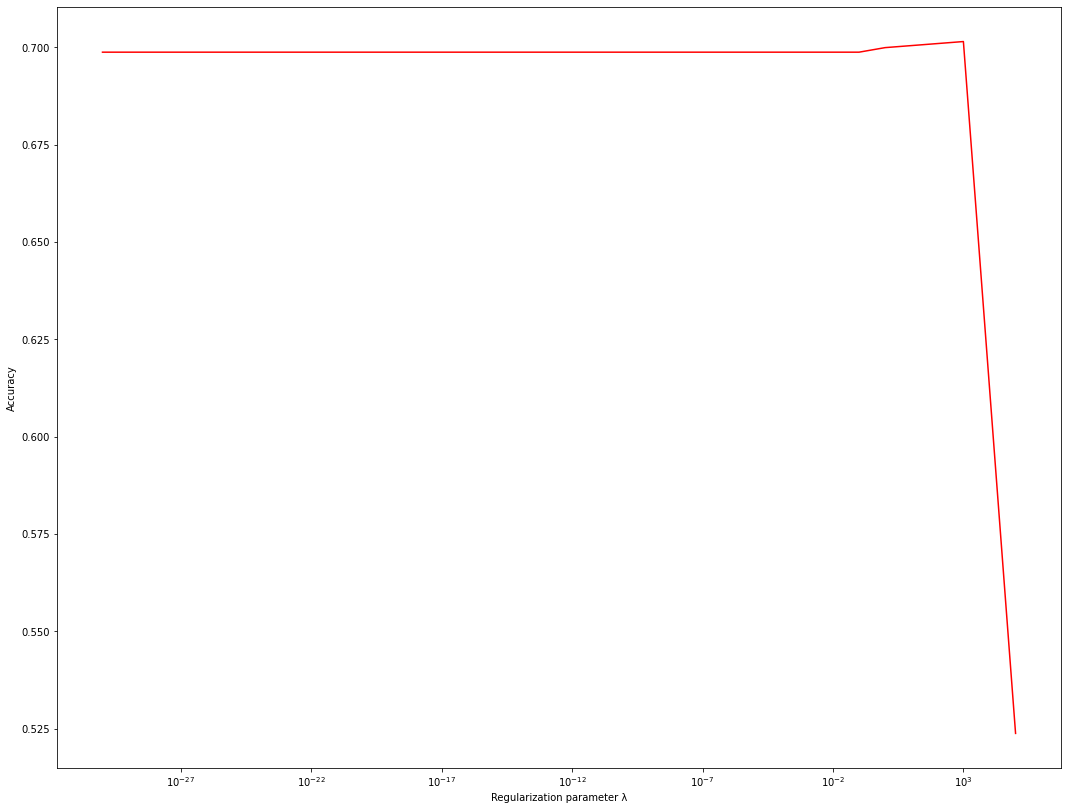


For 6 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 69.76%
For regularization parameter λ= 1e-15 -Classifier accuracy is 69.76%
For regularization parameter λ= 1e-05 -Classifier accuracy is 69.76%
For regularization parameter λ= 0.001 -Classifier accuracy is 69.76%
For regularization parameter λ= 0.1 -Classifier accuracy is 69.76%
For regularization parameter λ= 1 -Classifier accuracy is 69.91%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.19%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


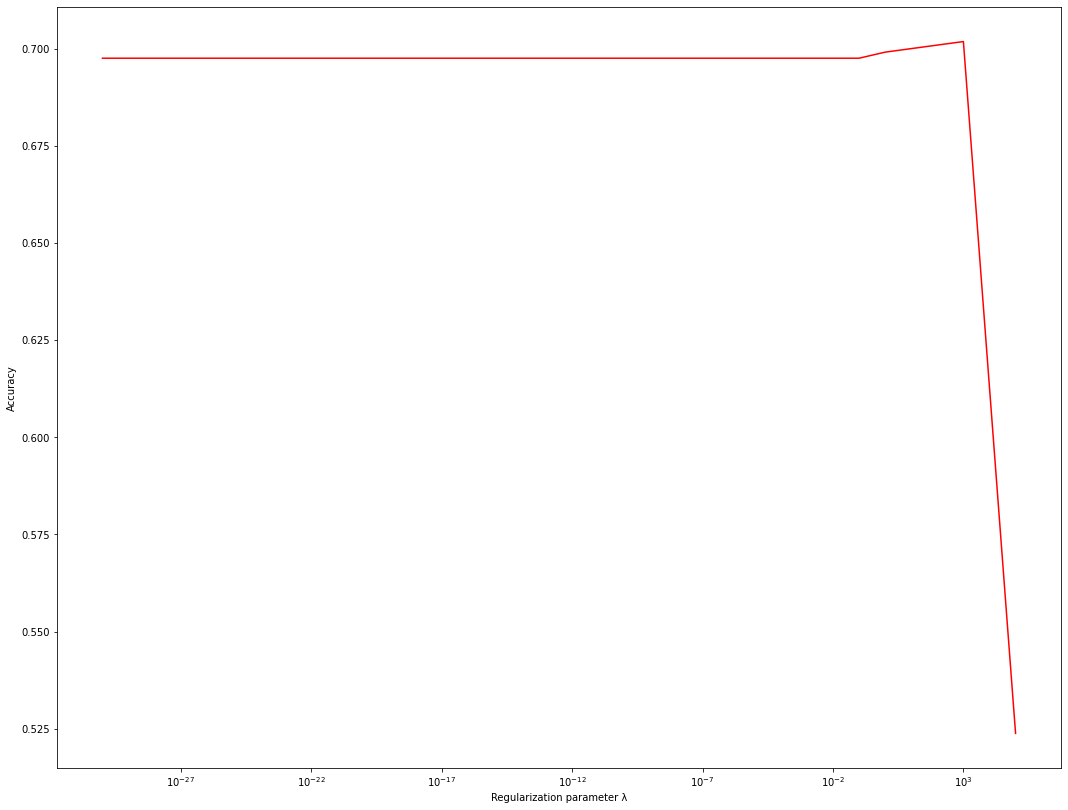


For 7 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 70.11%
For regularization parameter λ= 1e-15 -Classifier accuracy is 70.11%
For regularization parameter λ= 1e-05 -Classifier accuracy is 70.11%
For regularization parameter λ= 0.001 -Classifier accuracy is 70.11%
For regularization parameter λ= 0.1 -Classifier accuracy is 70.11%
For regularization parameter λ= 1 -Classifier accuracy is 70.15%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.19%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


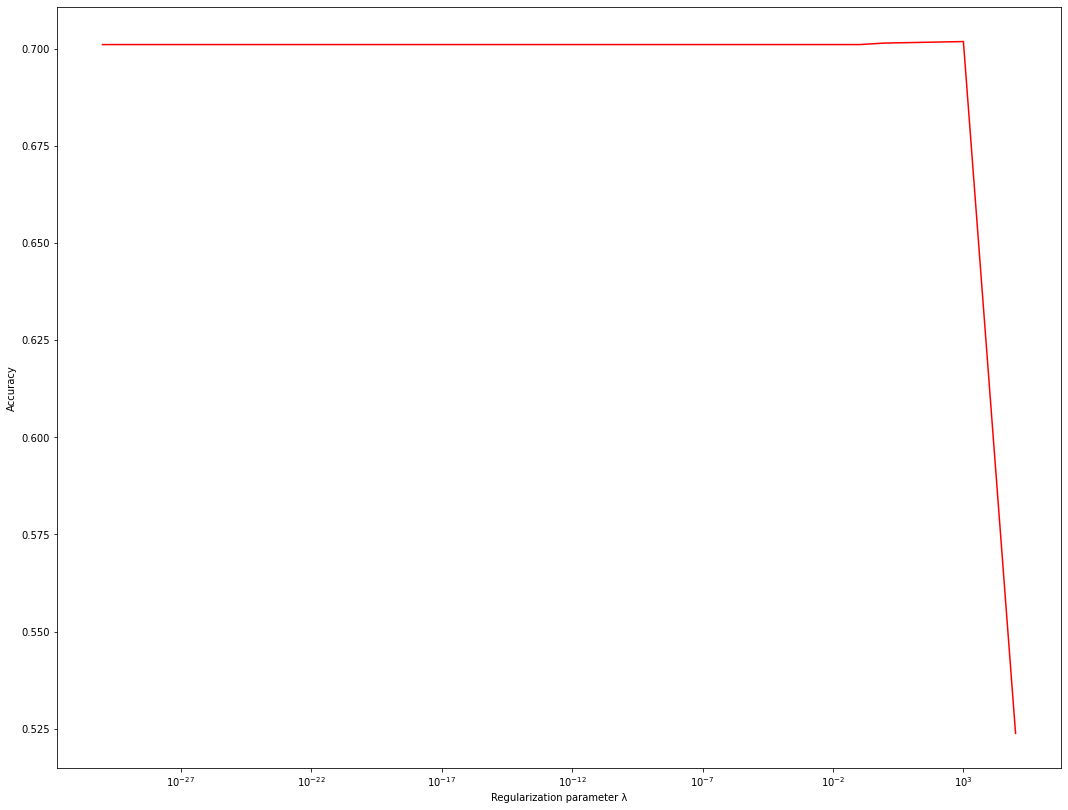


For 8 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 70.27%
For regularization parameter λ= 1e-15 -Classifier accuracy is 70.27%
For regularization parameter λ= 1e-05 -Classifier accuracy is 70.27%
For regularization parameter λ= 0.001 -Classifier accuracy is 70.27%
For regularization parameter λ= 0.1 -Classifier accuracy is 70.27%
For regularization parameter λ= 1 -Classifier accuracy is 70.30%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.19%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


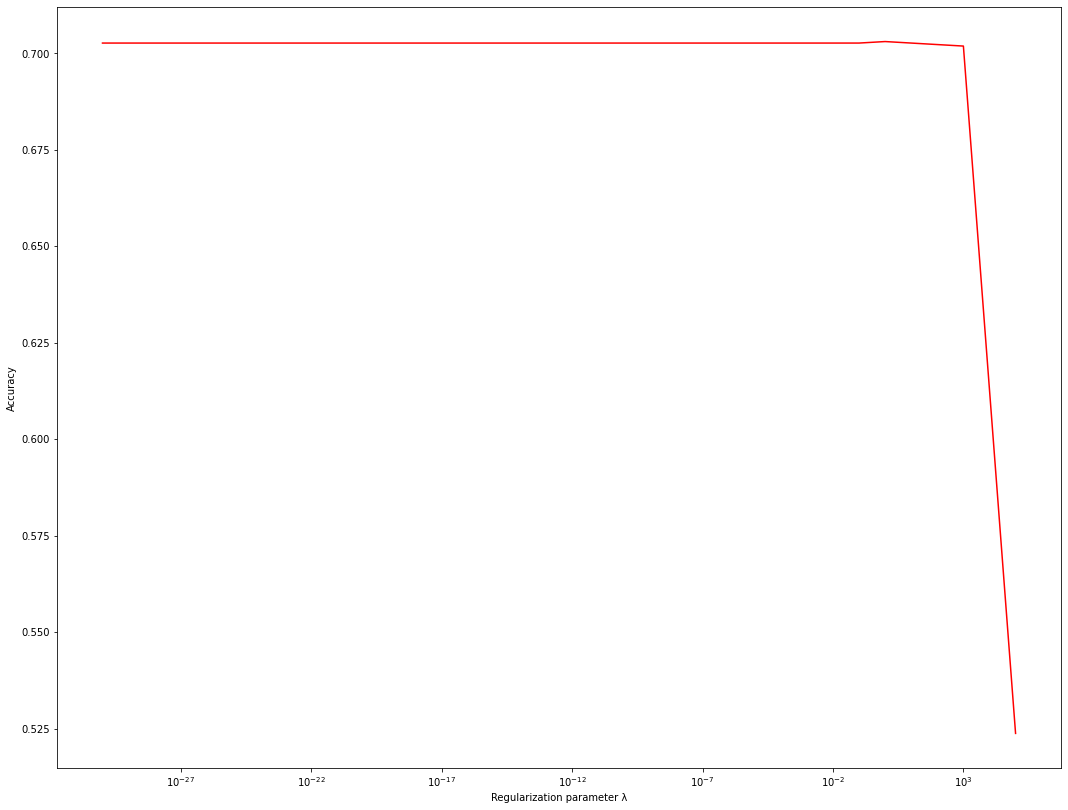


For 9 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 69.99%
For regularization parameter λ= 1e-15 -Classifier accuracy is 69.99%
For regularization parameter λ= 1e-05 -Classifier accuracy is 69.99%
For regularization parameter λ= 0.001 -Classifier accuracy is 69.99%
For regularization parameter λ= 0.1 -Classifier accuracy is 69.99%
For regularization parameter λ= 1 -Classifier accuracy is 70.07%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.58%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


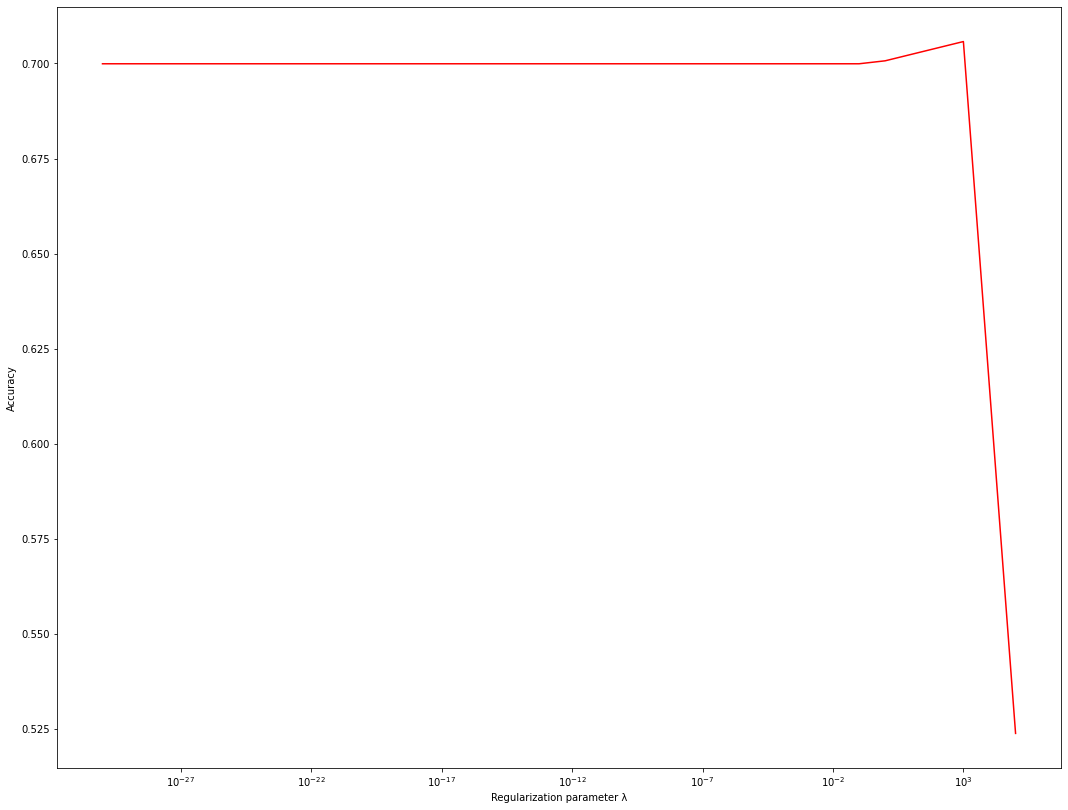


For 10 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 71.40%
For regularization parameter λ= 1e-15 -Classifier accuracy is 71.40%
For regularization parameter λ= 1e-05 -Classifier accuracy is 71.40%
For regularization parameter λ= 0.001 -Classifier accuracy is 71.40%
For regularization parameter λ= 0.1 -Classifier accuracy is 71.40%
For regularization parameter λ= 1 -Classifier accuracy is 71.28%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.73%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


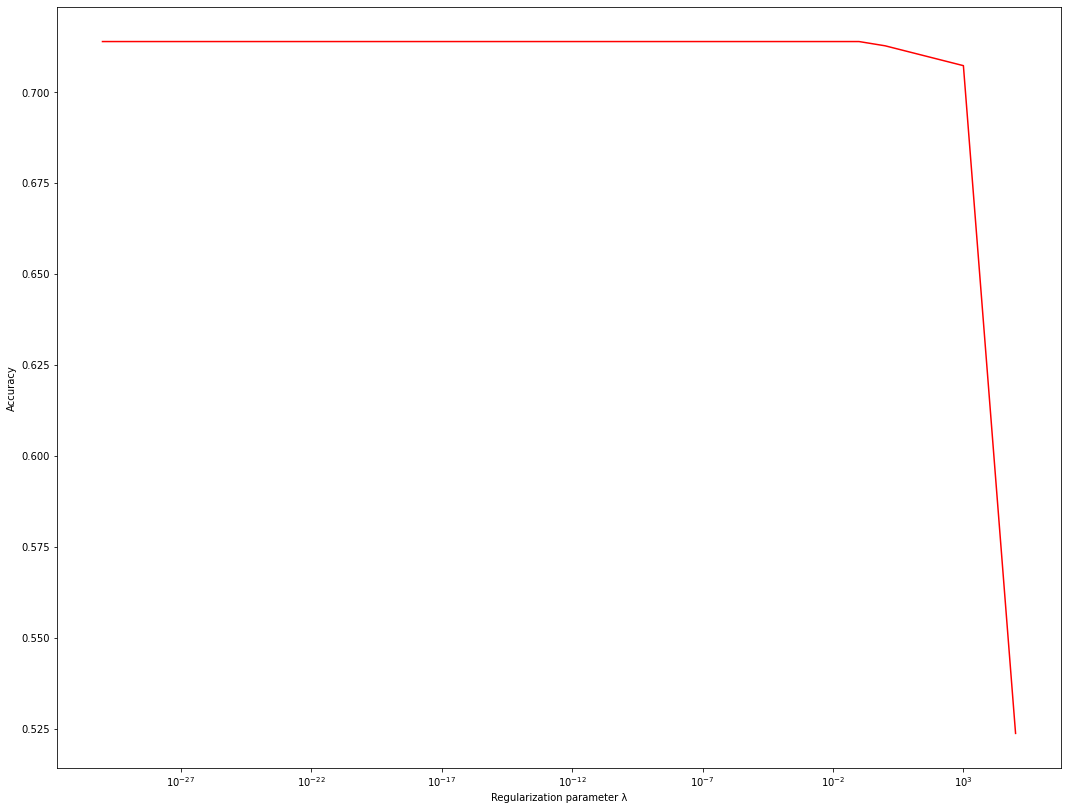


For 11 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 71.24%
For regularization parameter λ= 1e-15 -Classifier accuracy is 71.24%
For regularization parameter λ= 1e-05 -Classifier accuracy is 71.24%
For regularization parameter λ= 0.001 -Classifier accuracy is 71.24%
For regularization parameter λ= 0.1 -Classifier accuracy is 71.24%
For regularization parameter λ= 1 -Classifier accuracy is 71.24%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.85%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


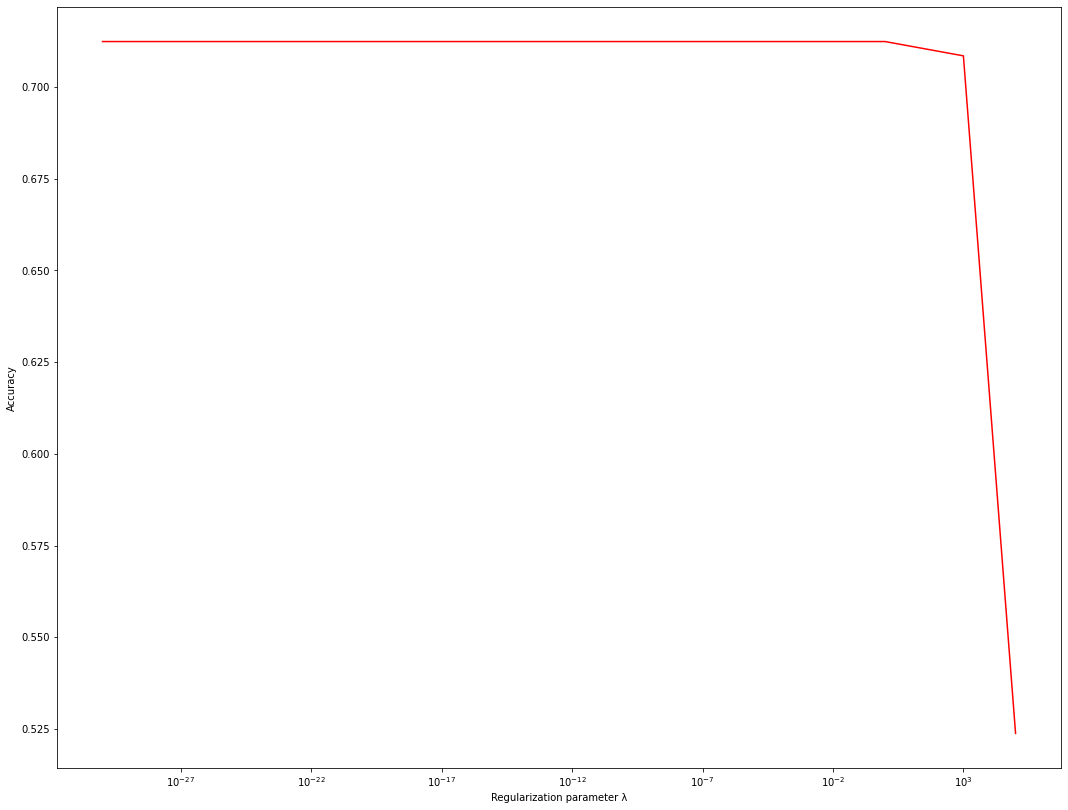


For 12 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 70.50%
For regularization parameter λ= 1e-15 -Classifier accuracy is 70.50%
For regularization parameter λ= 1e-05 -Classifier accuracy is 70.50%
For regularization parameter λ= 0.001 -Classifier accuracy is 70.50%
For regularization parameter λ= 0.1 -Classifier accuracy is 70.50%
For regularization parameter λ= 1 -Classifier accuracy is 70.65%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.85%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


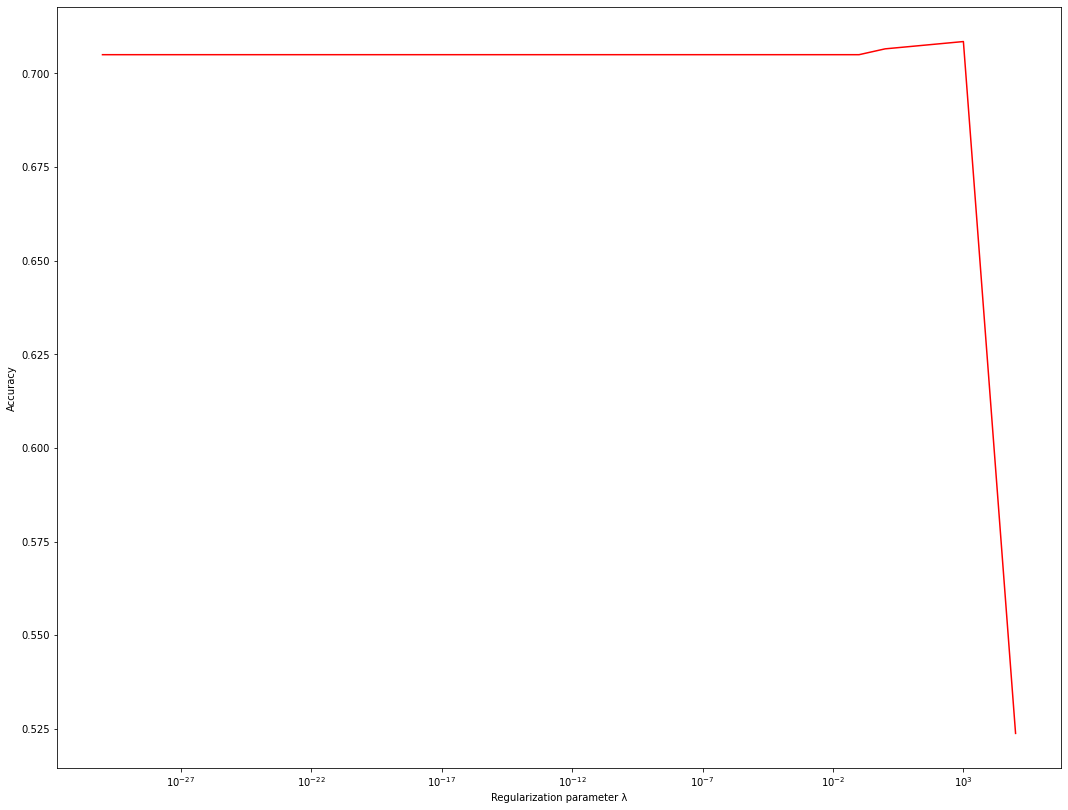


For 13 number of components:

For regularization parameter λ= 1e-30 -Classifier accuracy is 70.07%
For regularization parameter λ= 1e-15 -Classifier accuracy is 70.07%
For regularization parameter λ= 1e-05 -Classifier accuracy is 70.07%
For regularization parameter λ= 0.001 -Classifier accuracy is 70.07%
For regularization parameter λ= 0.1 -Classifier accuracy is 70.07%
For regularization parameter λ= 1 -Classifier accuracy is 70.11%
For regularization parameter λ= 1000.0 -Classifier accuracy is 70.85%
For regularization parameter λ= 100000.0 -Classifier accuracy is 52.38%


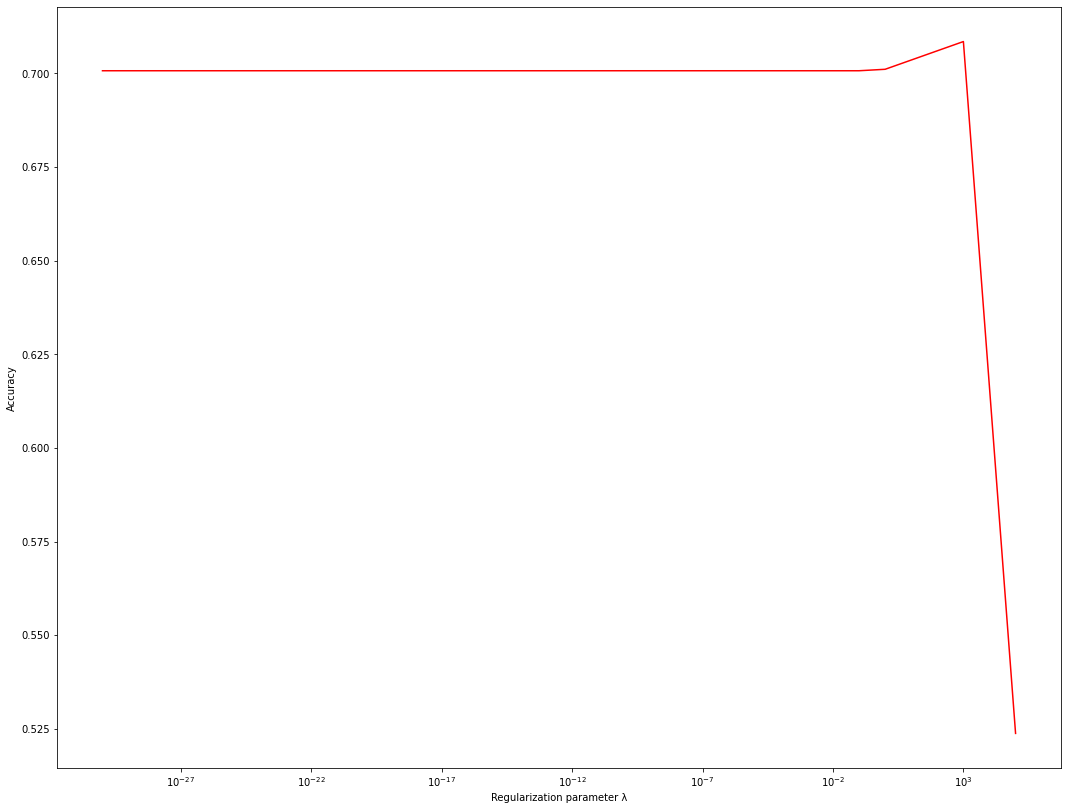

In [207]:
#Initiating a list with different number of principal components in order to
#test the logistic regression model.
num_comp=[1,2,3,4,5,6,7,8,9,10,11,12,13]
#Initiating a list with a series of number of regularization parameter in order to test 
#the logistic regression model.
l_regul=[1e-30,1e-15,1e-05,1e-03,0.1,1,1e03,1e05]
for n_comp in num_comp:
    print ('\nFor',n_comp,'number of components:\n')
    #apply pca on the scaled train data
    pca= PCA(n_components=n_comp)
    X_train_Std_lr_pca = pca.fit_transform(X_train_Std_lr[:,0:13])
    #merge the scaled data(with apply pca) and the rest (dummy-converted variables)
    X_train_Std_lr_ = np.concatenate((X_train_Std_lr_pca,X_train_Std_lr[:,13:]),axis=1)
    #apply pca on the scaled test data
    X_test_Std_lr_pca = pca.fit_transform(X_test_Std_lr[:,0:13])
    #merge the scaled data(with apply pca) and the rest (dummy-converted variables)
    X_test_Std_lr_ = np.concatenate((X_test_Std_lr_pca,X_test_Std_lr[:,13:]),axis=1)
    
    scores_lr = []
    for num_l_reg in l_regul:
        # Initialize pca with a list of components and a logistic 
        #regression classifier with L2 penalty and different regularization parameters each time.
        classifier_lr = LogisticRegression(C=(1/num_l_reg),penalty='l2', random_state=1)
        # Train the model while applying a series of transformations
        classifier_lr.fit(X_train_Std_lr_, y_train_lr)
        # Make predictions using the test data and print the accuracy - the test data are already defined
        print('For regularization parameter λ=',num_l_reg,'-Classifier accuracy is {0:.2f}%'
              .format(classifier_lr.score(X_test_Std_lr_,y_test_lr)*100))
        #save the scores to a list for the plot for each component for different regularization parameters
        scores_lr.append(classifier_lr.score(X_test_Std_lr_, y_test_lr))
    #plot the scores of each model with different regularization parameters for visualization
    plt.figure(figsize=(18,14)) 
    plt.semilogx(l_regul,scores_lr,color='r')
    plt.ylabel('Accuracy')
    plt.xlabel('Regularization parameter λ')
    plt.show()

#### Using different principal components in each interation, with different regularization parameters and after a thorough check of the results i came to a conclusion that:
##### Initially with all the principal components (37) and regularization parameter (λ=10000), the accuracy of the Logistic Regression Model was : 70.85%. 
### After testing different values for each parameter, the best configuration is with 10 out of 13 principle components (total number 34 pca including the dummy converted variables ) and regularization parameter λ one or smaller (λ<1),  the accuracy of the Logistic Regression Model increased to : 71.40%

### (b) Random Forest model - different values of number of trees and number of principal components.


For 9 number of components:

For  1 numbers of trees - Classifier accuracy is 62.432%
For  10 numbers of trees - Classifier accuracy is 68.784%
For  15 numbers of trees - Classifier accuracy is 69.875%
For  17 numbers of trees - Classifier accuracy is 69.057%
For  20 numbers of trees - Classifier accuracy is 68.277%
For  21 numbers of trees - Classifier accuracy is 68.589%
For  23 numbers of trees - Classifier accuracy is 68.784%
For  25 numbers of trees - Classifier accuracy is 68.706%
For  30 numbers of trees - Classifier accuracy is 69.135%
For  35 numbers of trees - Classifier accuracy is 68.667%
For  45 numbers of trees - Classifier accuracy is 69.213%
For  50 numbers of trees - Classifier accuracy is 69.408%


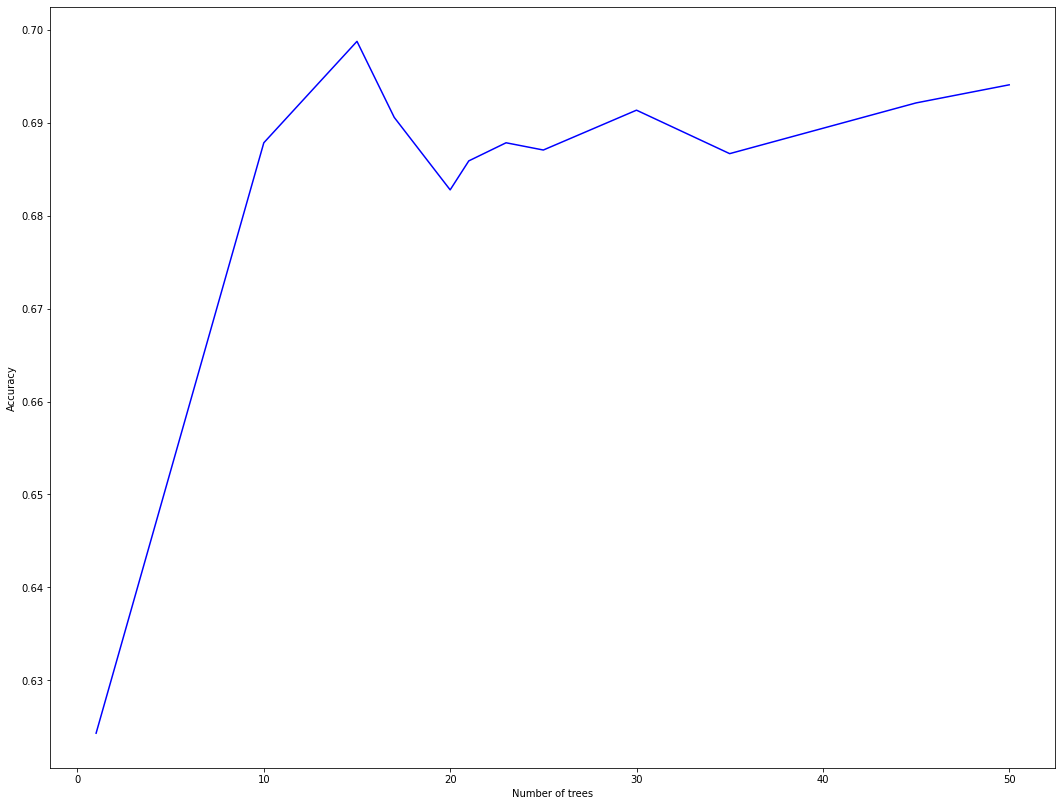


For 12 number of components:

For  1 numbers of trees - Classifier accuracy is 62.354%
For  10 numbers of trees - Classifier accuracy is 68.667%
For  15 numbers of trees - Classifier accuracy is 69.096%
For  17 numbers of trees - Classifier accuracy is 69.875%
For  20 numbers of trees - Classifier accuracy is 69.291%
For  21 numbers of trees - Classifier accuracy is 69.057%
For  23 numbers of trees - Classifier accuracy is 68.667%
For  25 numbers of trees - Classifier accuracy is 68.239%
For  30 numbers of trees - Classifier accuracy is 69.135%
For  35 numbers of trees - Classifier accuracy is 68.901%
For  45 numbers of trees - Classifier accuracy is 69.486%
For  50 numbers of trees - Classifier accuracy is 69.486%


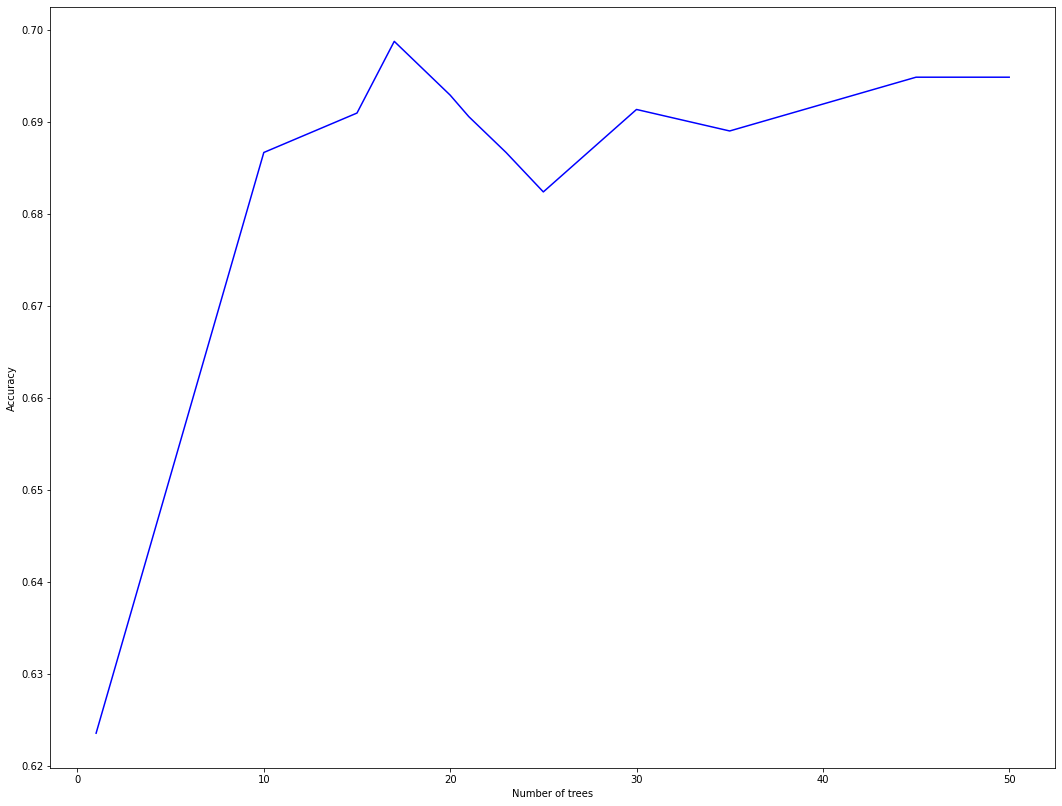


For 16 number of components:

For  1 numbers of trees - Classifier accuracy is 63.211%
For  10 numbers of trees - Classifier accuracy is 69.914%
For  15 numbers of trees - Classifier accuracy is 70.031%
For  17 numbers of trees - Classifier accuracy is 69.096%
For  20 numbers of trees - Classifier accuracy is 69.096%
For  21 numbers of trees - Classifier accuracy is 69.758%
For  23 numbers of trees - Classifier accuracy is 69.797%
For  25 numbers of trees - Classifier accuracy is 69.875%
For  30 numbers of trees - Classifier accuracy is 70.421%
For  35 numbers of trees - Classifier accuracy is 69.213%
For  45 numbers of trees - Classifier accuracy is 69.602%
For  50 numbers of trees - Classifier accuracy is 70.070%


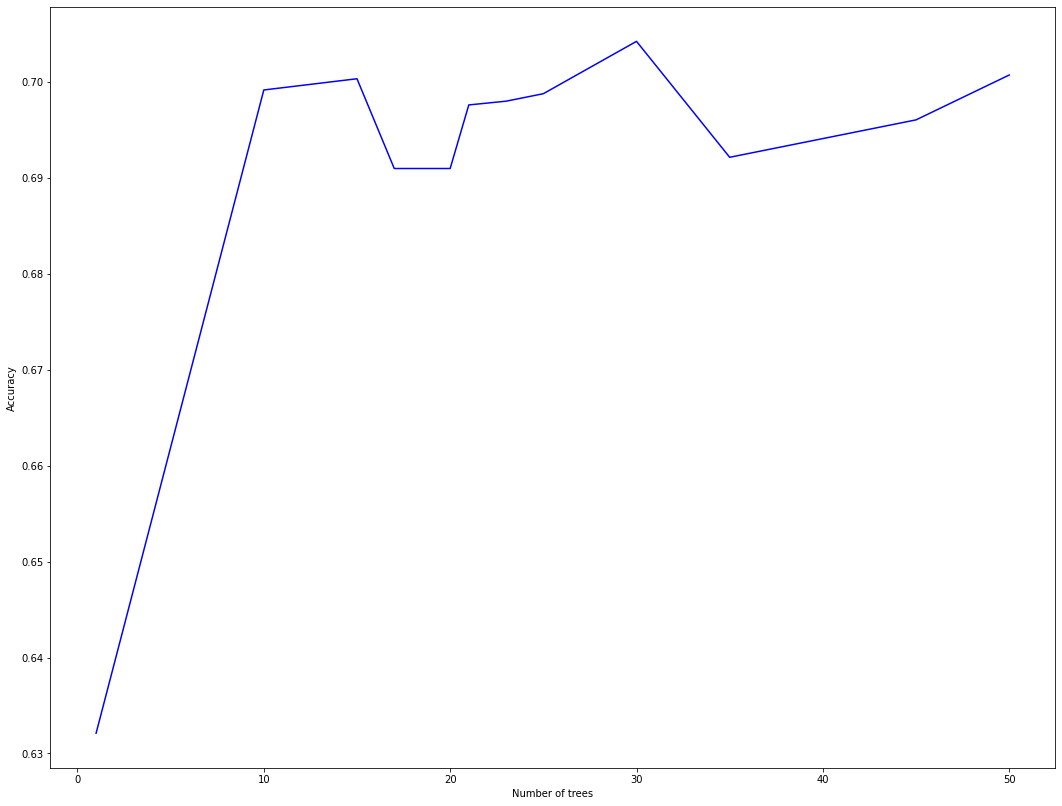


For 20 number of components:

For  1 numbers of trees - Classifier accuracy is 63.601%
For  10 numbers of trees - Classifier accuracy is 68.122%
For  15 numbers of trees - Classifier accuracy is 69.291%
For  17 numbers of trees - Classifier accuracy is 69.797%
For  20 numbers of trees - Classifier accuracy is 70.772%
For  21 numbers of trees - Classifier accuracy is 70.148%
For  23 numbers of trees - Classifier accuracy is 69.252%
For  25 numbers of trees - Classifier accuracy is 68.628%
For  30 numbers of trees - Classifier accuracy is 69.525%
For  35 numbers of trees - Classifier accuracy is 69.797%
For  45 numbers of trees - Classifier accuracy is 70.226%
For  50 numbers of trees - Classifier accuracy is 70.304%


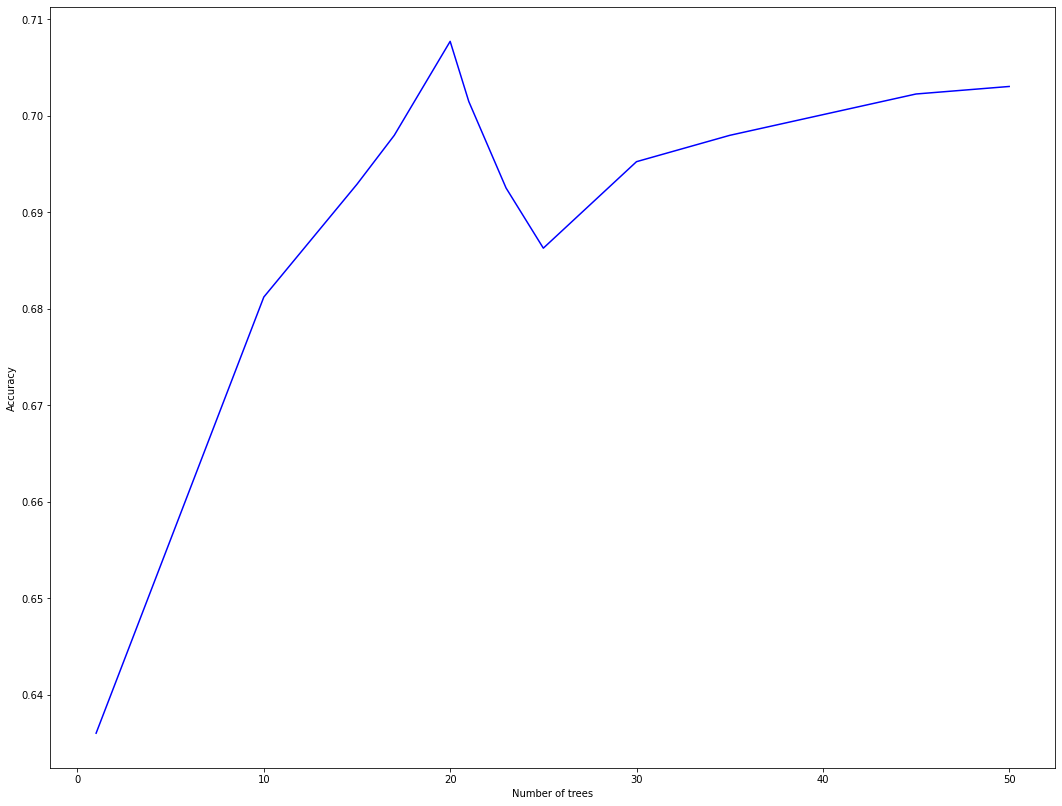


For 25 number of components:

For  1 numbers of trees - Classifier accuracy is 64.614%
For  10 numbers of trees - Classifier accuracy is 68.628%
For  15 numbers of trees - Classifier accuracy is 69.641%
For  17 numbers of trees - Classifier accuracy is 69.369%
For  20 numbers of trees - Classifier accuracy is 70.226%
For  21 numbers of trees - Classifier accuracy is 69.875%
For  23 numbers of trees - Classifier accuracy is 70.070%
For  25 numbers of trees - Classifier accuracy is 70.655%
For  30 numbers of trees - Classifier accuracy is 71.005%
For  35 numbers of trees - Classifier accuracy is 70.850%
For  45 numbers of trees - Classifier accuracy is 71.005%
For  50 numbers of trees - Classifier accuracy is 71.122%


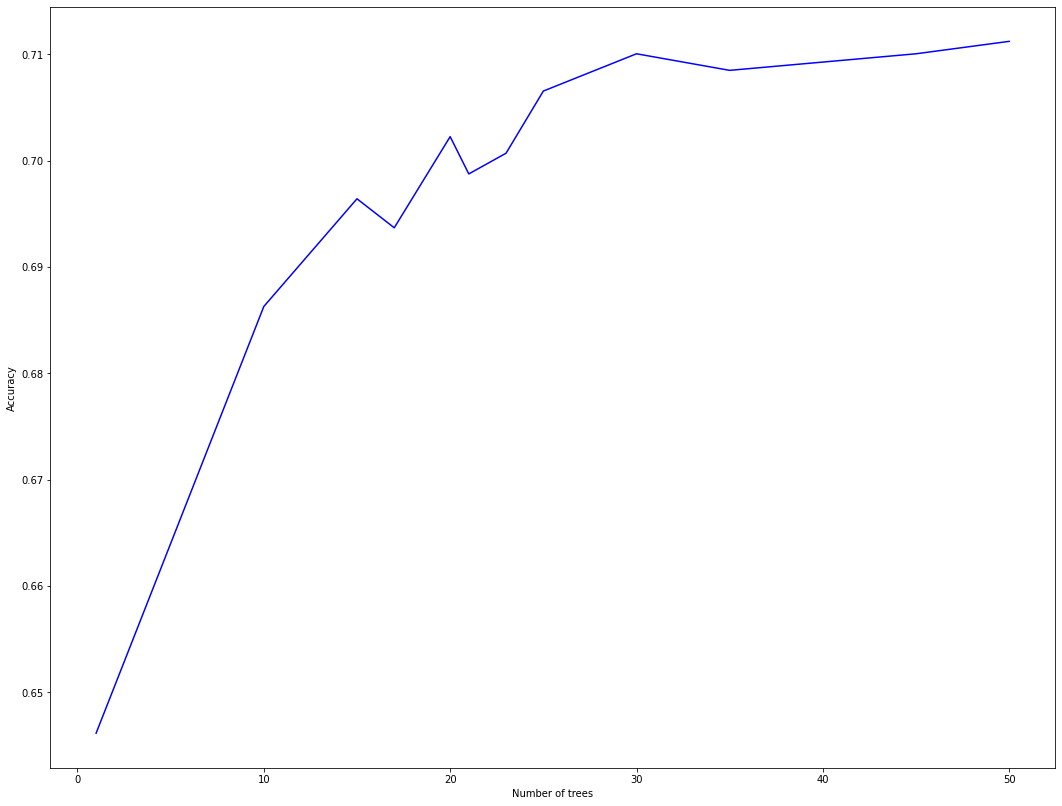


For 28 number of components:

For  1 numbers of trees - Classifier accuracy is 63.016%
For  10 numbers of trees - Classifier accuracy is 70.187%
For  15 numbers of trees - Classifier accuracy is 69.914%
For  17 numbers of trees - Classifier accuracy is 69.914%
For  20 numbers of trees - Classifier accuracy is 70.538%
For  21 numbers of trees - Classifier accuracy is 69.797%
For  23 numbers of trees - Classifier accuracy is 70.031%
For  25 numbers of trees - Classifier accuracy is 70.148%
For  30 numbers of trees - Classifier accuracy is 71.395%
For  35 numbers of trees - Classifier accuracy is 70.772%
For  45 numbers of trees - Classifier accuracy is 71.278%
For  50 numbers of trees - Classifier accuracy is 71.200%


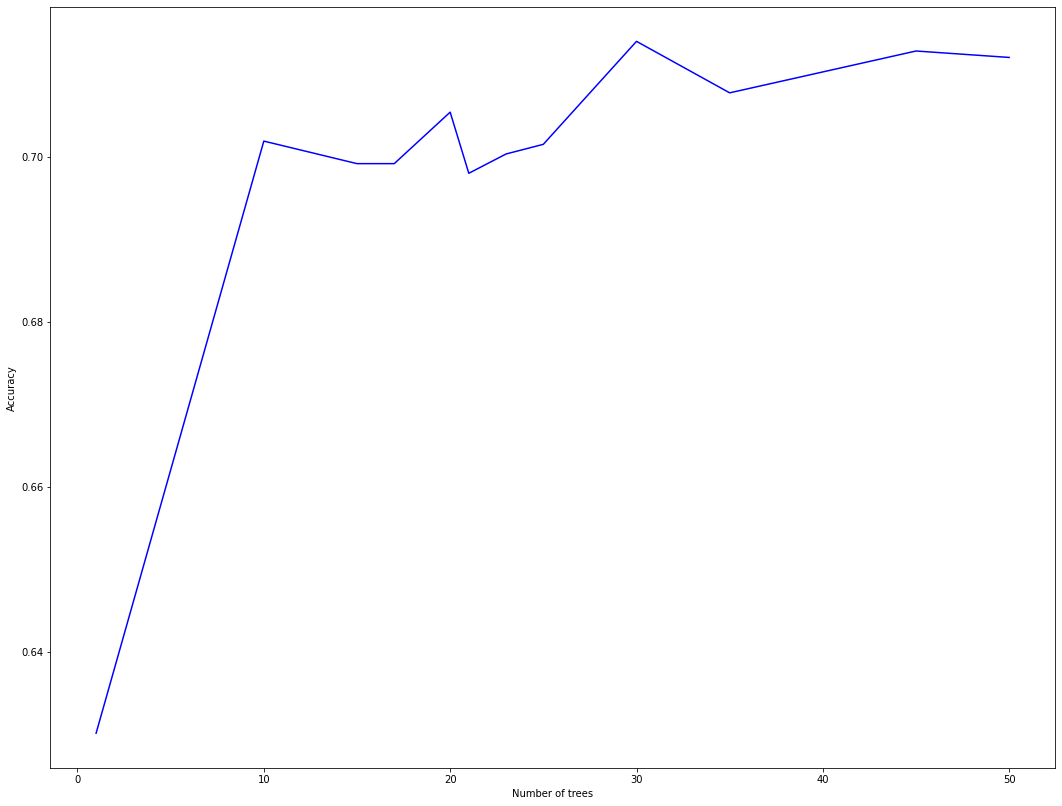


For 30 number of components:

For  1 numbers of trees - Classifier accuracy is 62.627%
For  10 numbers of trees - Classifier accuracy is 69.096%
For  15 numbers of trees - Classifier accuracy is 68.862%
For  17 numbers of trees - Classifier accuracy is 69.486%
For  20 numbers of trees - Classifier accuracy is 70.304%
For  21 numbers of trees - Classifier accuracy is 69.953%
For  23 numbers of trees - Classifier accuracy is 69.719%
For  25 numbers of trees - Classifier accuracy is 69.564%
For  30 numbers of trees - Classifier accuracy is 70.733%
For  35 numbers of trees - Classifier accuracy is 70.070%
For  45 numbers of trees - Classifier accuracy is 70.499%
For  50 numbers of trees - Classifier accuracy is 70.577%


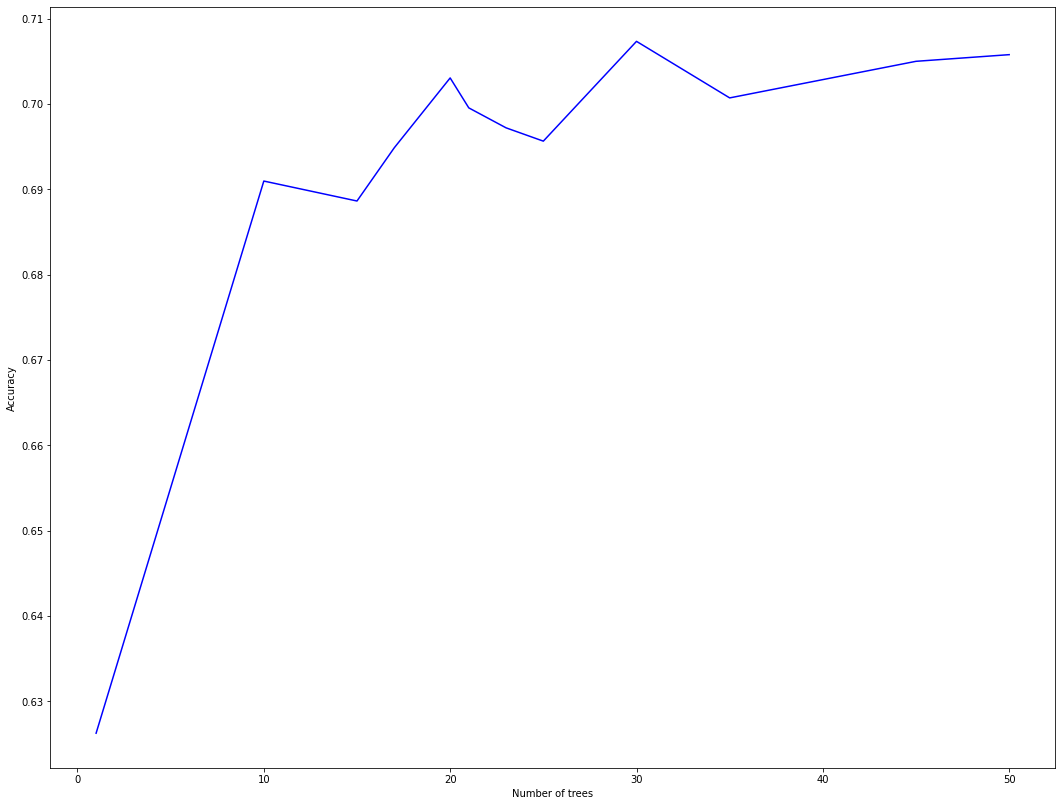


For 32 number of components:

For  1 numbers of trees - Classifier accuracy is 64.069%
For  10 numbers of trees - Classifier accuracy is 69.992%
For  15 numbers of trees - Classifier accuracy is 69.525%
For  17 numbers of trees - Classifier accuracy is 69.641%
For  20 numbers of trees - Classifier accuracy is 70.070%
For  21 numbers of trees - Classifier accuracy is 69.992%
For  23 numbers of trees - Classifier accuracy is 69.174%
For  25 numbers of trees - Classifier accuracy is 69.291%
For  30 numbers of trees - Classifier accuracy is 70.070%
For  35 numbers of trees - Classifier accuracy is 70.031%
For  45 numbers of trees - Classifier accuracy is 69.992%
For  50 numbers of trees - Classifier accuracy is 70.382%


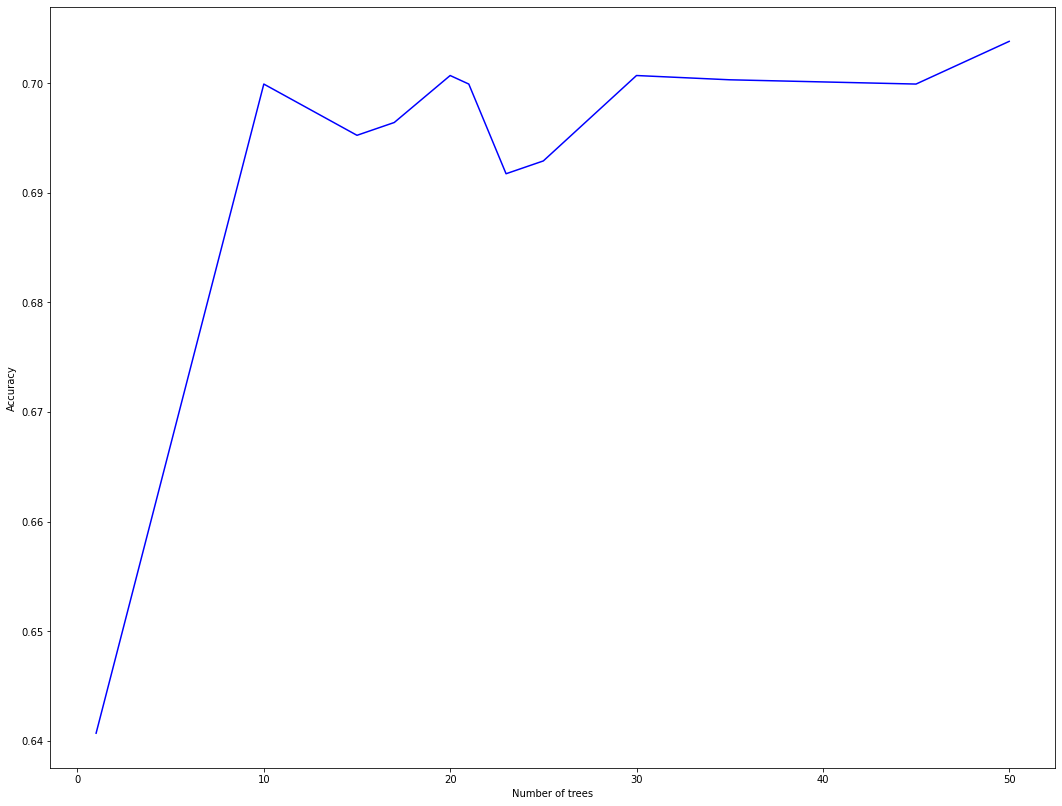


For 33 number of components:

For  1 numbers of trees - Classifier accuracy is 62.354%
For  10 numbers of trees - Classifier accuracy is 70.265%
For  15 numbers of trees - Classifier accuracy is 69.641%
For  17 numbers of trees - Classifier accuracy is 70.031%
For  20 numbers of trees - Classifier accuracy is 70.382%
For  21 numbers of trees - Classifier accuracy is 69.953%
For  23 numbers of trees - Classifier accuracy is 69.992%
For  25 numbers of trees - Classifier accuracy is 69.797%
For  30 numbers of trees - Classifier accuracy is 69.914%
For  35 numbers of trees - Classifier accuracy is 69.914%
For  45 numbers of trees - Classifier accuracy is 70.499%
For  50 numbers of trees - Classifier accuracy is 70.577%


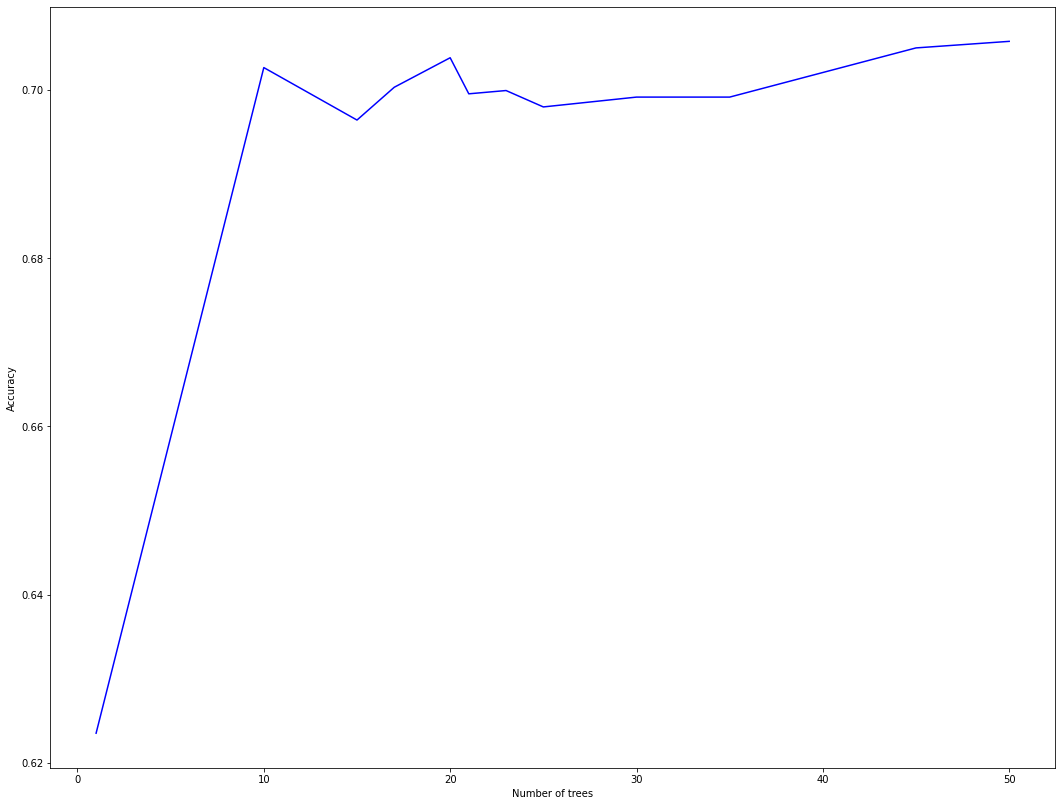


For 35 number of components:

For  1 numbers of trees - Classifier accuracy is 64.731%
For  10 numbers of trees - Classifier accuracy is 69.057%
For  15 numbers of trees - Classifier accuracy is 69.758%
For  17 numbers of trees - Classifier accuracy is 69.602%
For  20 numbers of trees - Classifier accuracy is 69.992%
For  21 numbers of trees - Classifier accuracy is 69.564%
For  23 numbers of trees - Classifier accuracy is 69.486%
For  25 numbers of trees - Classifier accuracy is 69.447%
For  30 numbers of trees - Classifier accuracy is 69.953%
For  35 numbers of trees - Classifier accuracy is 69.992%
For  45 numbers of trees - Classifier accuracy is 69.719%
For  50 numbers of trees - Classifier accuracy is 70.226%


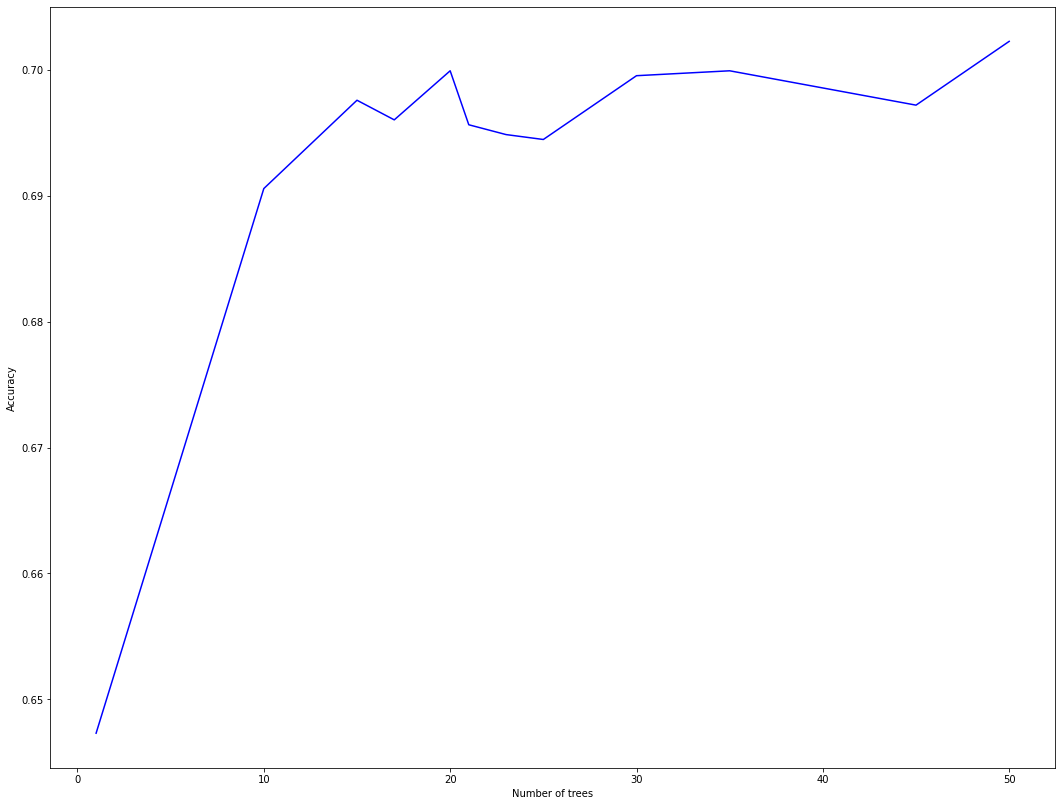


For 37 number of components:

For  1 numbers of trees - Classifier accuracy is 63.835%
For  10 numbers of trees - Classifier accuracy is 68.862%
For  15 numbers of trees - Classifier accuracy is 69.291%
For  17 numbers of trees - Classifier accuracy is 69.447%
For  20 numbers of trees - Classifier accuracy is 70.109%
For  21 numbers of trees - Classifier accuracy is 70.226%
For  23 numbers of trees - Classifier accuracy is 69.797%
For  25 numbers of trees - Classifier accuracy is 69.719%
For  30 numbers of trees - Classifier accuracy is 69.096%
For  35 numbers of trees - Classifier accuracy is 69.525%
For  45 numbers of trees - Classifier accuracy is 69.525%
For  50 numbers of trees - Classifier accuracy is 69.719%


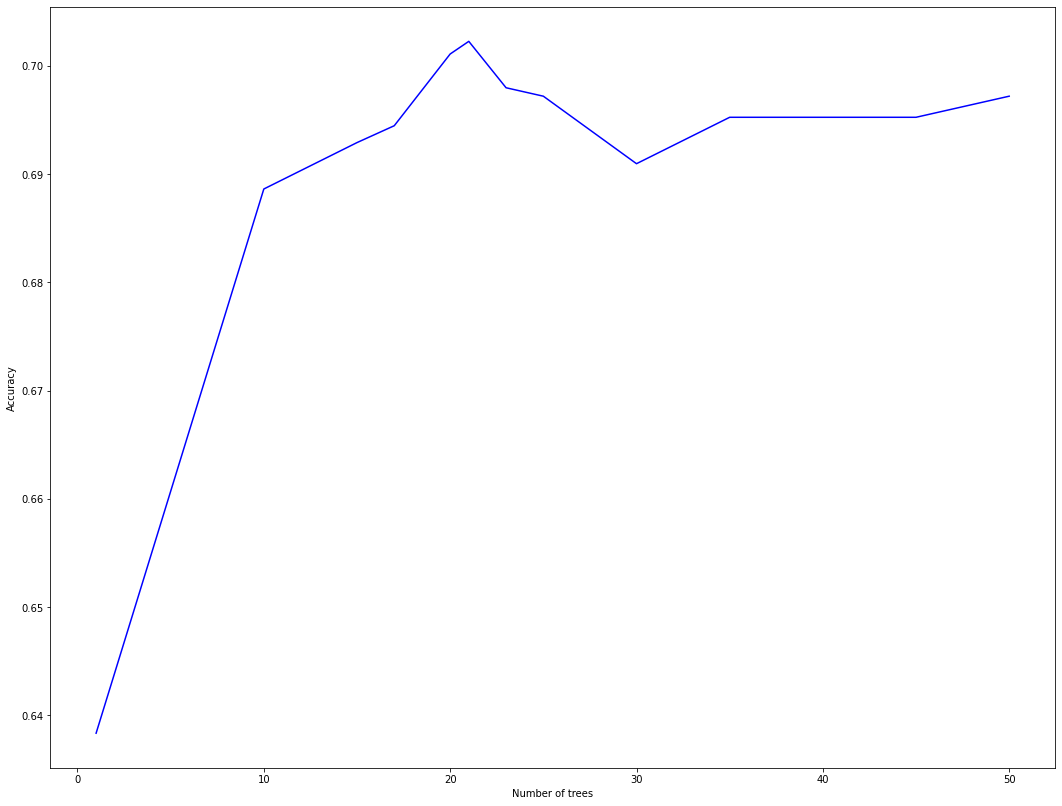

In [208]:
#Initiating a list with different values for the number of trees in order to test the Random Forest model.
num_trees=[1,10,15,17,20,21,23,25,30,35,45,50]
#Initiating a list with different number of principal components in order to test the Random Forest model.
num_comp=[9,12,16,20,25,28,30,32,33,35,37]
for n_comp in num_comp:
    print ('\nFor',n_comp,'number of components:\n')
    scores_rf = []
    for n_trees in num_trees:
        pipe_rf=0
        # Initialize a pipeline object with pca with a list of components and a Random Forest classifier
        #with entropy as a criterion and different number of trees each time.
        pipe_rf = Pipeline([('pca', PCA(n_components=n_comp)),
                            ('rf', RandomForestClassifier(criterion='entropy',n_estimators=n_trees, random_state= 1))])
        # Train the model while applying a series of transformations
        pipe_rf.fit(X_train_rf,Y_train_rf)
        # Make predictions using the test data and print the accuracy 
        # the test data are already defined and scaled on ex2
        print('For ',n_trees,'numbers of trees - Classifier accuracy is {0:.3f}%'
              .format(pipe_rf.score(X_test_rf,Y_test_rf)*100))
        #save the scores to a list for the plot for each component for different number of trees
        scores_rf.append(pipe_rf.score(X_test_rf, Y_test_rf))
    #plot the test and train scores of each model with different regularization parameters for visualization
    plt.figure(figsize=(18,14)) 
    plt.plot(num_trees,scores_rf,color='b')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of trees')
    plt.show()

#### Using different principal components in each interation, with different number of trees and after a thorough check of the results i came to a conclusion that:
##### Initially with all the principal components (37) and 20 number of trees, the accuracy of the Random Forest Model was : 70.58%. 
### After testing different values for each parameter, the best configuration is with 28 principle components and 30 number of trees,  the accuracy of the Random Forest Model increased to : 71.395%

### (c) Neural Network model - different values for the regularization parameter and different configurations for the networks hidden layers.

In [209]:
#Initiating a list with a series of number of regularization parameter in order to 
#test the Neural Network model.
l_regul=[0.001,0.01,0.1,1,10,100]
#Initiating a list with a series of hidden layes in order to test the Neural Network model.
hid_layers=[(25),(30),(10,10),(15,15),(10,5,10),(5,15,5),(5,10,10),(10,10,10),(15,5,15),(5,5,10),
            (10,10,5),(5,10,5)]

parameters = {'alpha':l_regul,'hidden_layer_sizes':hid_layers}
#find the best configuration for Neural Network based of the given parameters
clf_grid = GridSearchCV(MLPClassifier(activation='logistic', random_state=1),param_grid=parameters)

In [210]:
clf_grid.fit(X_train_Std_nn,Y_train_nn)

GridSearchCV(estimator=MLPClassifier(activation='logistic', random_state=1),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'hidden_layer_sizes': [25, 30, (10, 10), (15, 15),
                                                (10, 5, 10), (5, 15, 5),
                                                (5, 10, 10), (10, 10, 10),
                                                (15, 5, 15), (5, 5, 10),
                                                (10, 10, 5), (5, 10, 5)]})

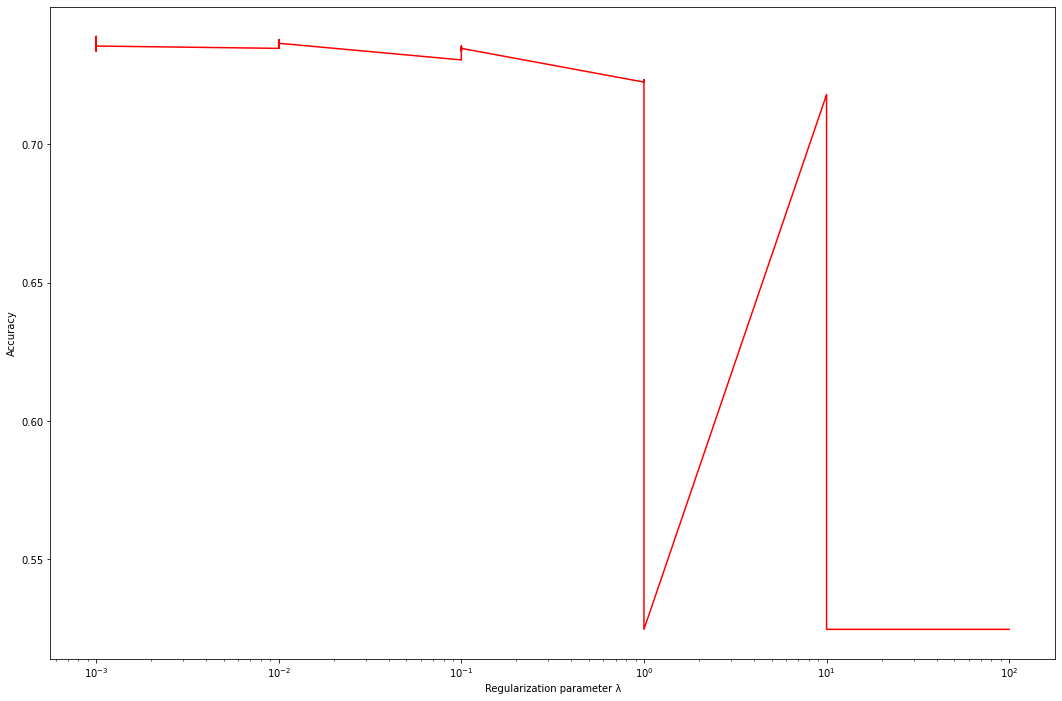

In [211]:
#save the results of the gridsearchcv in a dataframe 
results=pd.DataFrame(clf_grid.cv_results_)
plt.figure(figsize=(18,12))
#plot the regularization parameters λ with the accuracy 
plt.semilogx(results['param_alpha'],results['mean_test_score'],color='r')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter λ')
plt.show()

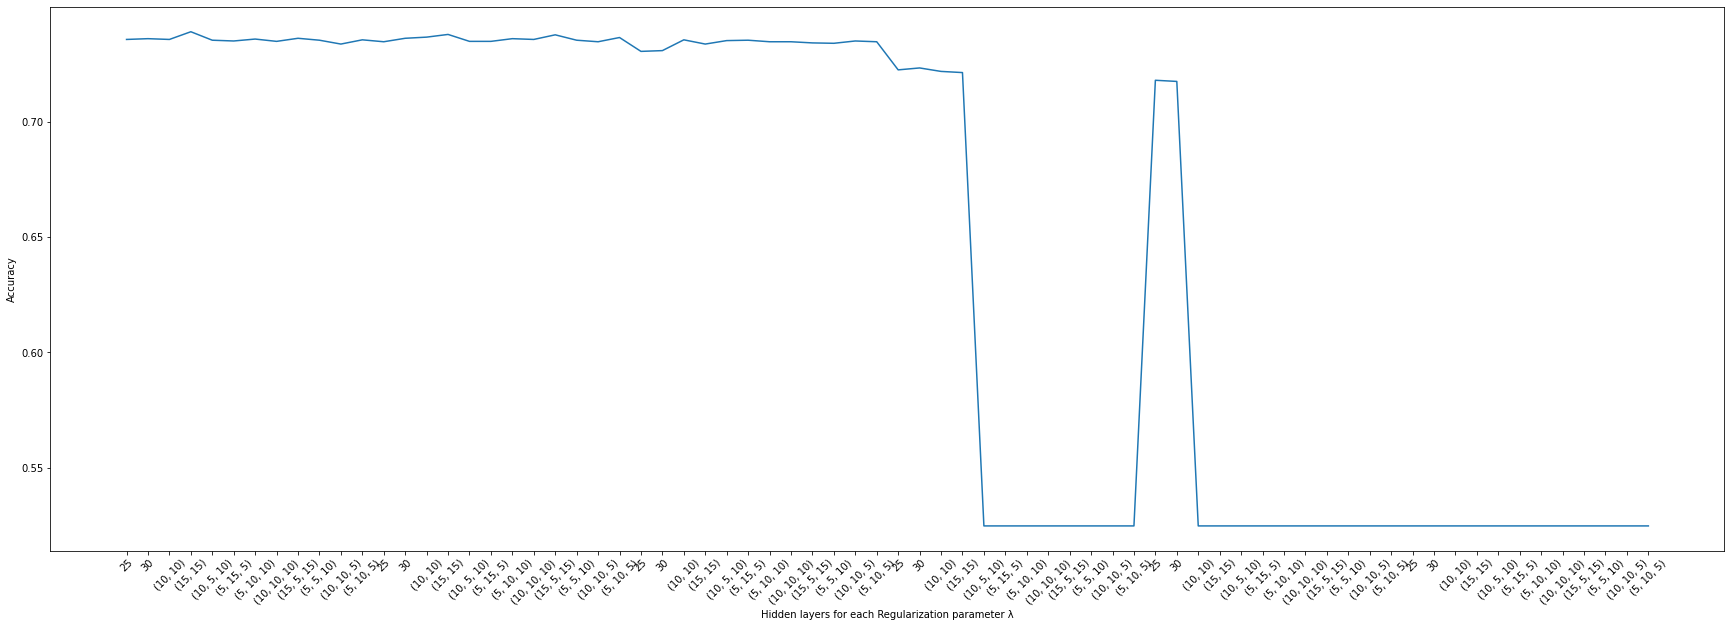

In [212]:
plt.figure(figsize=(30,10)) 
#plot the hidden layers with each regularization parameter with the accuracy 
plt.xticks(range(len(results['mean_test_score'])), results['param_hidden_layer_sizes'], rotation=45)
plt.plot(results['mean_test_score'])
plt.ylabel('Accuracy')
plt.xlabel('Hidden layers for each Regularization parameter λ')
plt.show()

In [213]:
print("Best score for the training data with 3 k-fold cross validation is: {0:.2f}%"
      .format(clf_grid.best_score_*100))
print("Using the following parameters:",clf_grid.best_params_)

Best score for the training data with 3 k-fold cross validation is: 73.91%
Using the following parameters: {'alpha': 0.001, 'hidden_layer_sizes': (15, 15)}


In [214]:
#check the accuracy of the test data with the best parameters of the gridsearch
y_true, y_pred = Y_test_nn , clf_grid.predict(X_test_Std_nn)
print('Results on the test set:')
print('Misclassified samples {0} out of {1}, i.e. {2:.2f}% accurate'.\
      format((y_true != y_pred).sum(), len(y_true), (1 - (y_true != y_pred).sum()/len(y_true))*100))

Results on the test set:
Misclassified samples 720 out of 2566, i.e. 71.94% accurate


#### Using different regularization parameters with the help of GridSearchCV:
#### Initially with 3 hidden layers (10,10,5) and regularization parameter (λ=1), the accuracy (train data) of the Neural Network Model was 52.4724%  with a slight overfitting as the test data accuracy was 52.3772%. 
#### After testing different values for each parameter, the best configuration is 3 hidden layers (10,10,10) and regularization parameter (λ=0.01), the accuracy (train set) of the Neural Network Model increased to 73.72% while the test set increased to 71.75%.  We managed to increase the prediction accuracy but the gap between training and testing error is a bit bigger. There is still evidence of overfitting, a bit bigger difference than before but i believe it is still acceptable.


# Part B

In [215]:
# Read wine_data dataset into a new data frame
wine_data = pd.read_csv('..\\..\\..\\..\\Desktop\\extended_wine_data.csv')


#### First we should explore and prepare the data before clustering analysis. 

In [216]:
# Using the dataframe method - sample, we can see 10 random samples form the dataframe wine_data
wine_data.sample(n=10)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4211,2612,6.7,0.30,0.29,2.80,0.025,37.0,107.0,0.99159,3.31,0.63,11.3,7
5704,4105,6.9,0.30,0.45,1.40,0.039,36.0,122.0,0.99059,3.07,0.47,11.1,7
6363,4764,5.9,0.26,0.29,5.40,0.046,34.0,116.0,0.99224,3.24,0.41,11.4,6
1160,1160,10.6,0.36,0.57,2.30,0.087,6.0,20.0,0.99676,3.14,0.72,11.1,7
5475,3876,6.1,0.22,0.28,16.55,0.059,54.0,135.0,0.99665,3.20,0.38,10.5,5
2422,823,6.7,0.19,0.23,6.20,0.047,36.0,117.0,0.99450,3.34,0.43,9.6,6
147,147,7.6,0.49,0.26,1.60,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,5
1171,1171,7.1,0.59,0.00,2.20,0.078,26.0,44.0,0.99522,3.42,0.68,10.8,6
2441,842,8.7,0.23,0.32,13.40,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7
5063,3464,6.9,0.29,0.41,7.80,0.046,52.0,171.0,0.99537,3.12,0.51,9.6,5


In [217]:
# Check the feature types
wine_data.info()
#We see that we have 13 features, all columns have numerical values (float64(11), int64(2)) and there are no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [218]:
#View a descriptive Statistics Summary of the dataframe
wine_data.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##### There is an unnamed feature with integer numbers with 0 as minimum and 4897 the max number. Since we dont have any information from the description what that column is, it is decided to drop it.

In [219]:
#Dropping the features 'Unnamed: 0' from the dataframe.
#inplace equals to true in order to keep the existing dataframe and not create a new one.
wine_data.drop( ['Unnamed: 0'], axis=1,inplace=True)

In [220]:
#Verify that the 1st column is gone.
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [221]:
#create a new dataset for different approaches later on- with outliers and duplicates
wine_data_with_outliers_and_duplicates=wine_data.copy()
wine_data_with_outliers_and_duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [222]:
#create a new dataset for different approaches later on- without duplicates
wine_data_with_outliers=wine_data.copy()
#use of inplace =true to modify our current dataframe
wine_data_with_outliers.drop_duplicates(inplace=True)
#As we can see below, now we don't have any duplicates in our dataframe, and the number of rows now are 5318.
any_duplicate= wine_data_with_outliers.duplicated()
print('Number of duplicate rows is:', any_duplicate.sum())
wine_data_with_outliers.shape

Number of duplicate rows is: 0


(5318, 12)

<AxesSubplot:title={'center':'Outliers'}>

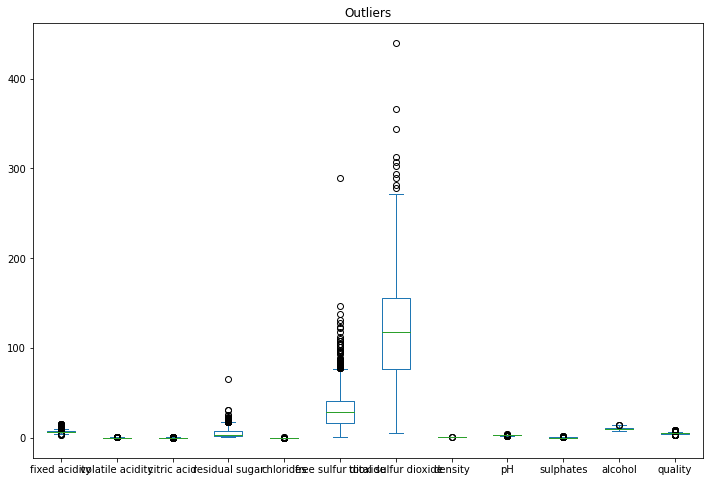

In [223]:
# Create and examine the box plots of the original dataset
wine_data.plot(kind='box', figsize=(12,8),title='Outliers')
#We can not thoroughly check each feature because of the scale of each feature-even though we 
#can see that there are a lot of outliers. -We will try plot them individually.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


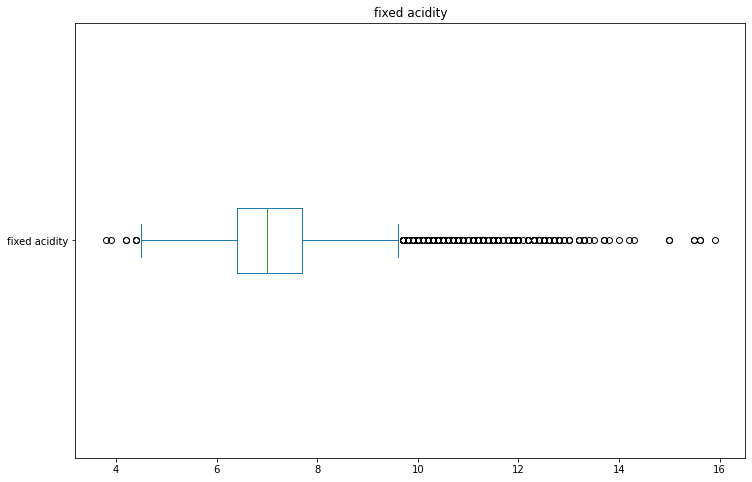

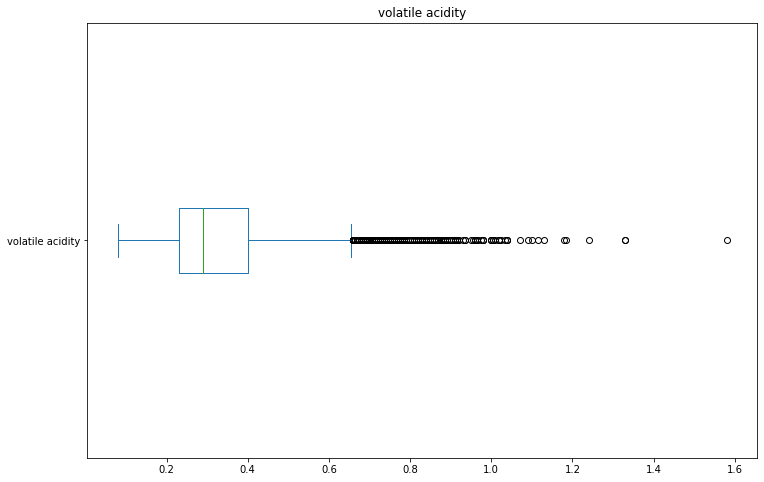

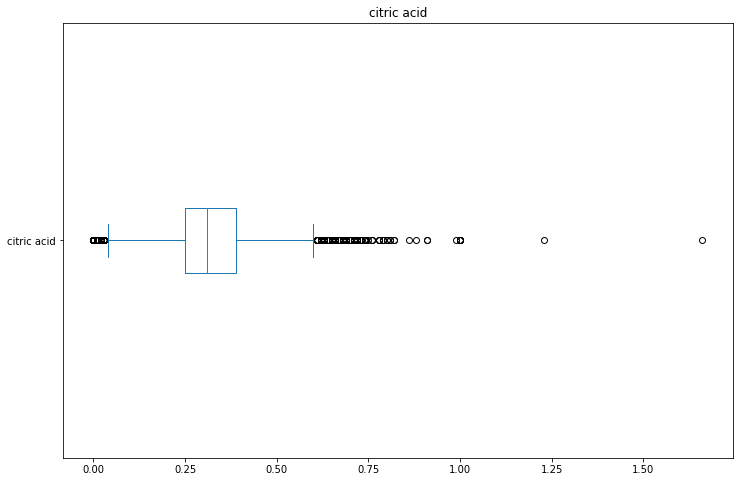

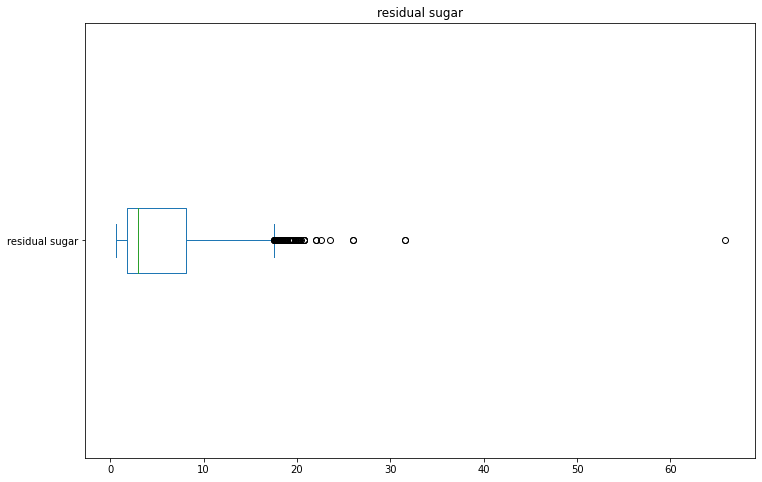

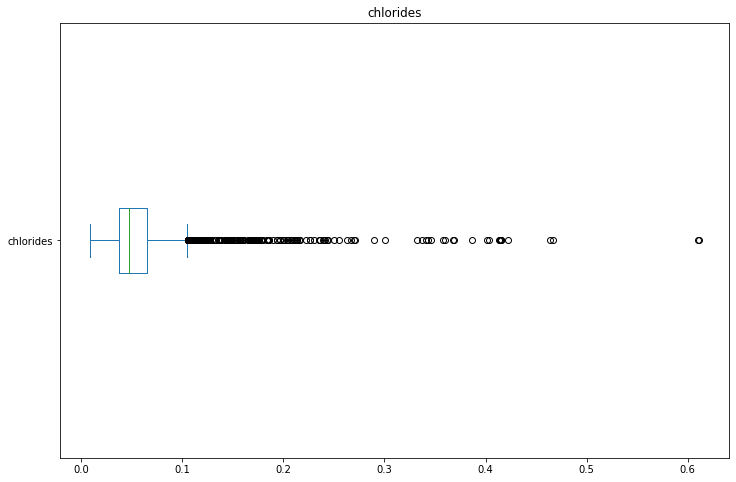

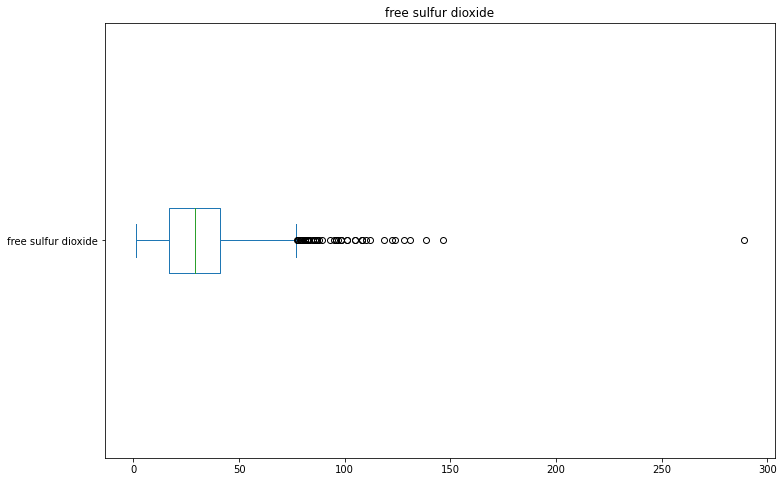

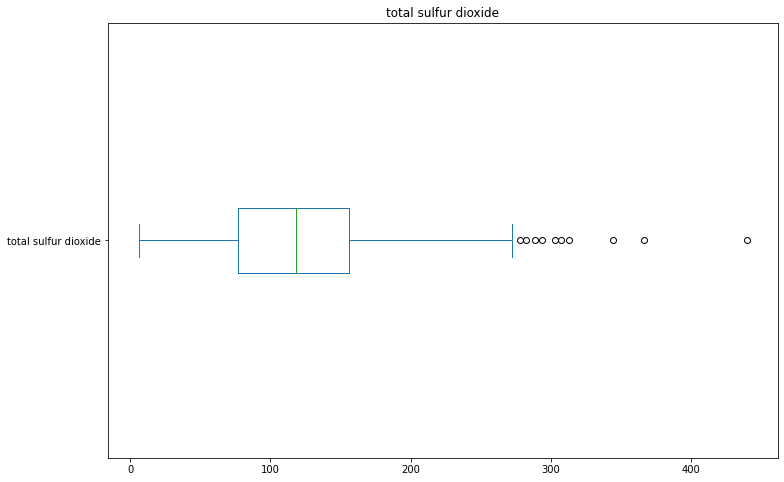

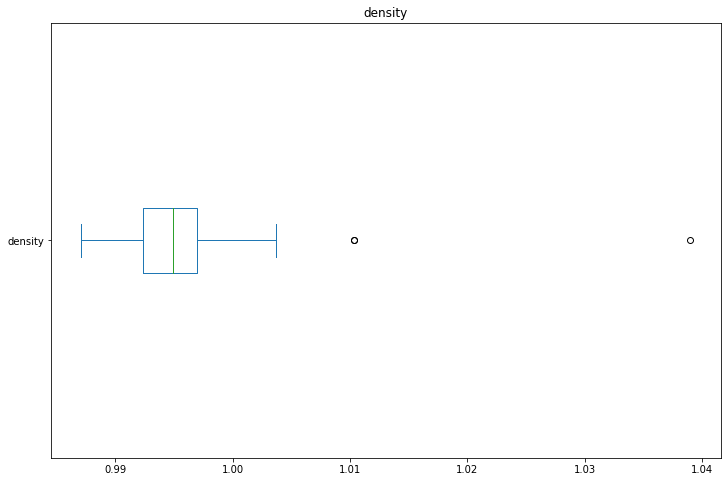

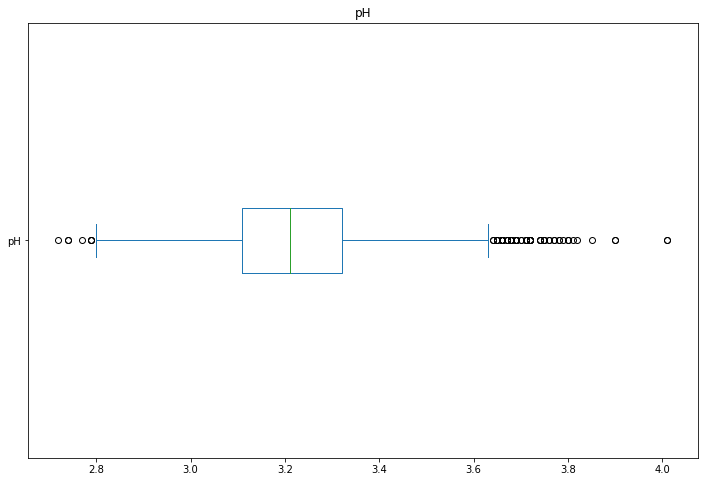

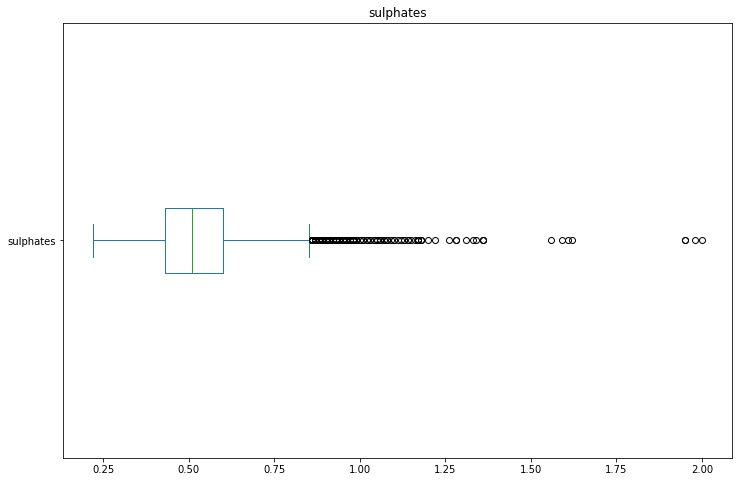

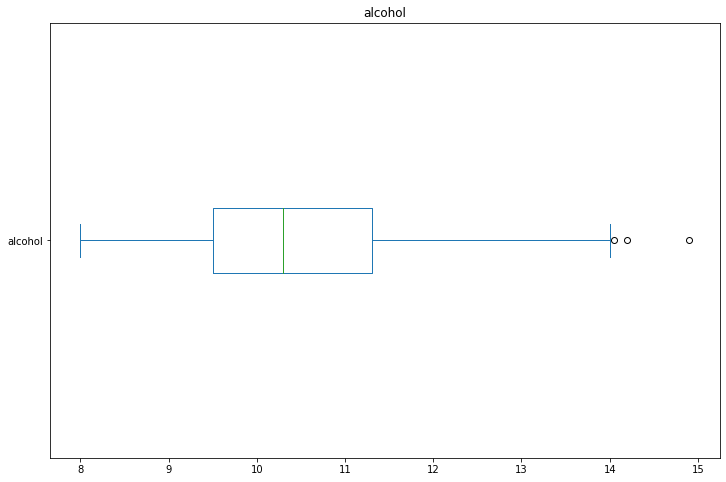

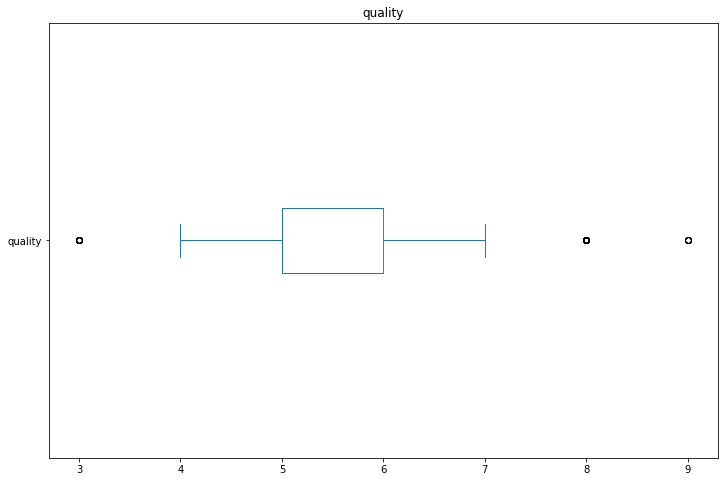

In [224]:
#for-loop to plot each numerical feature separetely in order to identify whether each one has outliers  
for i in wine_data:
    print(wine_data.plot(y=i,kind='box',vert=False, figsize=(12,8),title=i))

##### As we can see, there are outliers in all the features of the dataset. With the help of description of each feature, the descriptive statistics we will decide whether remove or replace the outliers.

In [225]:
# function that you pass an argument (the feature you want to check how many outliers has and 
#you get back a boolean array, identifying the outliers in the corresponding feature) 
# The quantile method (IQR)
def outliers_in_a_feature(i):
    #outliers values are > Q3 + 1.5(IQR) and < Q1 - 1.5(IQR)
    wine_data_feature=wine_data[i]
    Q1 = wine_data_feature.quantile(0.25)
    Q3 = wine_data_feature.quantile(0.75)
    IQR = Q3-Q1
    #get the 25% and 75% of the values from the summary of the feature
    summary = wine_data_feature.describe()
    Q1 = summary['25%']
    Q3 = summary['75%']
    
    # Verify the number of outliers
    num_outlier = (wine_data_feature < Q1 - 1.5*IQR)| (wine_data_feature > Q3 + 1.5*IQR)
    return num_outlier

In [226]:
#for-loop to check all numerical features and we print the number of outliers on each feature as we can see below.
for i in wine_data:
    num_of_outliers=outliers_in_a_feature(i)
    print('The feature "',i,'" has',num_of_outliers.sum(),"outliers.")

The feature " fixed acidity " has 357 outliers.
The feature " volatile acidity " has 377 outliers.
The feature " citric acid " has 509 outliers.
The feature " residual sugar " has 118 outliers.
The feature " chlorides " has 286 outliers.
The feature " free sulfur dioxide " has 62 outliers.
The feature " total sulfur dioxide " has 10 outliers.
The feature " density " has 3 outliers.
The feature " pH " has 73 outliers.
The feature " sulphates " has 191 outliers.
The feature " alcohol " has 3 outliers.
The feature " quality " has 228 outliers.


In [227]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##### We have 6497 rows. First, let's try delete the outliers from  'residual sugar' , 'free sulfur dioxide' and 'total sulfur dioxide' which have very large standard deviation and see how many rows we deleted.

In [228]:
#For-loop to remove outliers using the quantile approach from 3 features.
wine_data_no_outliers=wine_data[[ 'residual sugar' , 'free sulfur dioxide' , 'total sulfur dioxide']]
for i in wine_data_no_outliers:
    num_of_outliers=outliers_in_a_feature(i)
    wine_data = wine_data[~num_of_outliers]


In [229]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000
mean,7.225111,0.341475,0.317436,5.154865,0.056186,29.675674,113.761965,0.994590,3.220727,0.532109,10.517429,5.826783
std,1.306781,0.165822,0.144325,4.335085,0.035276,16.344337,55.459119,0.002881,0.160800,0.149447,1.188305,0.871856
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992260,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.800000,0.047000,28.000000,117.000000,0.994800,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.390000,7.800000,0.066000,41.000000,153.000000,0.996827,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,17.500000,0.611000,77.000000,259.000000,1.003690,4.010000,2.000000,14.900000,9.000000


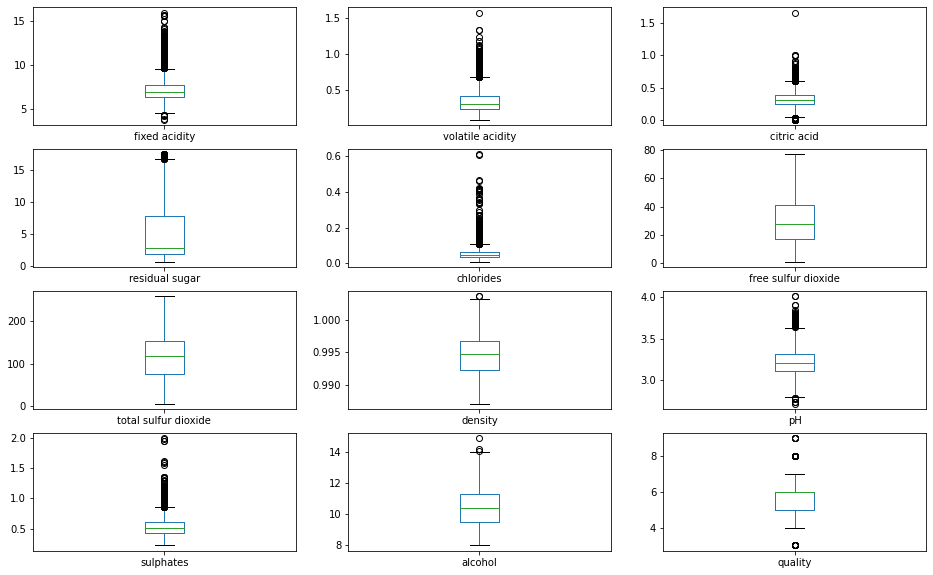

In [230]:
# Create and examine the box plots
plt.figure(figsize=(16,10))
for i,col in enumerate(list(wine_data.columns.values)):
    plt.subplot(4,3,i+1)
    wine_data.boxplot(col)
    plt.grid()

#### After removing 187 outliers from 3 specific features, we run again the quantile approach since there are outliers and we replace those outliers with the mean of the rest values of each feature - except quality feature.

In [231]:
#for-loop to check every column of the dataset
for feature in wine_data.loc[:, wine_data.columns != 'quality']:
    # Call the function and get back an array of outliers
    outliers=outliers_in_a_feature(feature)
    # Compute the feature mean, while not including the outliers in the calculation
    feature_mean = wine_data[~outliers][feature].mean()
    print('\nThe mean value of the remaining (non-outlier) values is: ',feature_mean)
    # We get the indices of the rows which have outliers on the feature.
    outlier_indices = wine_data[outliers].index
    # Replace the campaign_mean value for identified outliers
    wine_data.loc[outlier_indices, feature] = feature_mean
    #Verify that there are no outliers in each feature
    num_feature_outliers=outliers_in_a_feature(feature)
    print('The feature',feature," has",num_feature_outliers.sum(),"outliers.")


The mean value of the remaining (non-outlier) values is:  7.005517299294593
The feature fixed acidity  has 133 outliers.

The mean value of the remaining (non-outlier) values is:  0.31768672890963656
The feature volatile acidity  has 252 outliers.

The mean value of the remaining (non-outlier) values is:  0.31803267411865865
The feature citric acid  has 245 outliers.

The mean value of the remaining (non-outlier) values is:  5.0526849928080555
The feature residual sugar  has 18 outliers.

The mean value of the remaining (non-outlier) values is:  0.05106549784981806
The feature chlorides  has 265 outliers.

The mean value of the remaining (non-outlier) values is:  29.6756735340729
The feature free sulfur dioxide  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  113.76196513470681
The feature total sulfur dioxide  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  0.9945871433100825
The feature density  has 0 outliers.

The mean value of

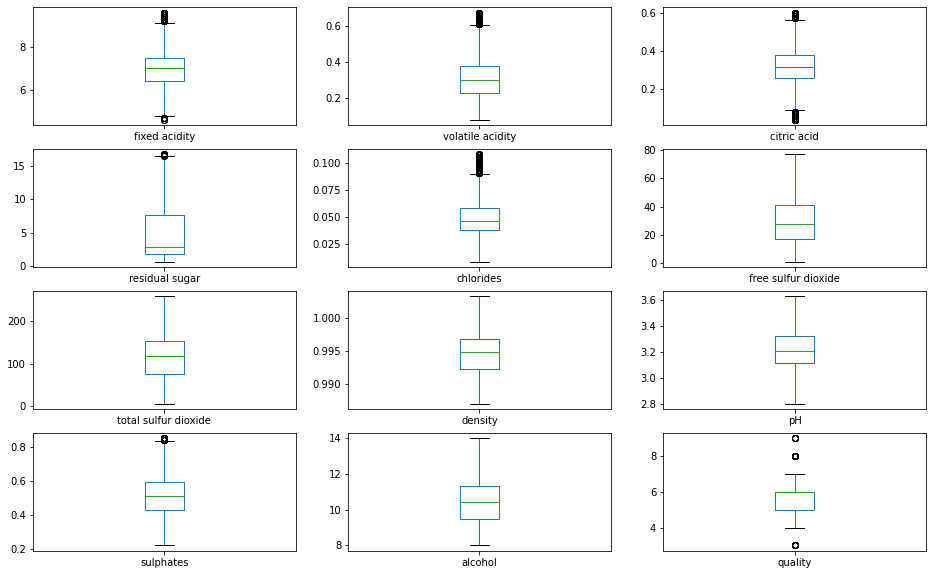

In [232]:
# check again the outliers after replacing the mean value.
plt.figure(figsize=(16,10))
for i,col in enumerate(list(wine_data.columns.values)):
    plt.subplot(4,3,i+1)
    wine_data.boxplot(col)
    plt.grid()

In [233]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000,6310.000000
mean,7.005517,0.317687,0.318033,5.052685,0.051065,29.675674,113.761965,0.994587,3.215992,0.517458,10.515591,5.826783
std,0.880630,0.125865,0.106308,4.190444,0.018521,16.344337,55.459119,0.002877,0.151409,0.118449,1.185282,0.871856
min,4.600000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.800000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.260000,1.800000,0.038000,17.000000,76.000000,0.992260,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.318033,2.800000,0.047000,28.000000,117.000000,0.994800,3.210000,0.510000,10.400000,6.000000
75%,7.500000,0.380000,0.380000,7.700000,0.059000,41.000000,153.000000,0.996818,3.320000,0.590000,11.300000,6.000000
max,9.600000,0.675000,0.600000,16.800000,0.108000,77.000000,259.000000,1.003200,3.630000,0.850000,14.000000,9.000000


In [234]:
#As we can see from the box plot above, there are yet outliers, even after replacing with the mean value.
#Again using the quantile method, we delete
for i in wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'sulphates']]:
    num_of_outliers=outliers_in_a_feature(i)
    wine_data = wine_data[~num_of_outliers]

In [235]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000
mean,6.899167,0.288468,0.322711,5.463661,0.045928,31.917436,123.690339,0.994182,3.204912,0.500260,10.566541,5.887221
std,0.794145,0.098299,0.091271,4.345689,0.013427,16.064761,51.232163,0.002810,0.147762,0.109158,1.211684,0.865988
min,4.800000,0.080000,0.090000,0.600000,0.012000,1.000000,6.000000,0.987110,2.800000,0.220000,8.000000,3.000000
25%,6.400000,0.220000,0.270000,1.800000,0.036000,20.000000,94.000000,0.991880,3.100000,0.420000,9.500000,5.000000
50%,6.900000,0.280000,0.318033,3.950000,0.045000,31.000000,125.000000,0.994100,3.200000,0.490000,10.400000,6.000000
75%,7.400000,0.340000,0.370000,8.200000,0.052000,43.000000,159.000000,0.996360,3.300000,0.570000,11.400000,6.000000
max,9.100000,0.580000,0.560000,16.800000,0.082000,77.000000,259.000000,1.002890,3.630000,0.790000,14.000000,9.000000


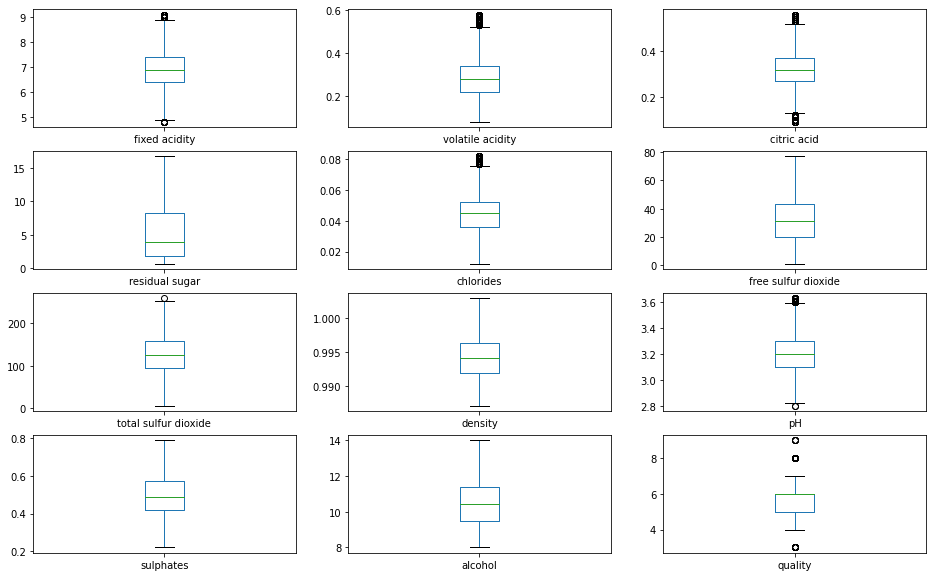

In [236]:
# Create and examine the box plots
plt.figure(figsize=(16,10))
for i,col in enumerate(list(wine_data.columns.values)):
    plt.subplot(4,3,i+1)
    wine_data.boxplot(col)
    plt.grid()

##### Seems that after 3 attempts to remove outliers, there are still outliers left. - Now, with 5196 sample, we will remove the rest of outliers using the percentile method but with trial and error changing the quantile percents. 

In [237]:
for i in wine_data[['fixed acidity', 'volatile acidity', 'citric acid','chlorides','pH']]:
    P95 = wine_data[i].quantile(0.95)
    P5 = wine_data[i].quantile(0.02)
    is_outlier_alternative = (wine_data[i] > P95) | (wine_data[i] < P5)
    wine_data = wine_data[~is_outlier_alternative]

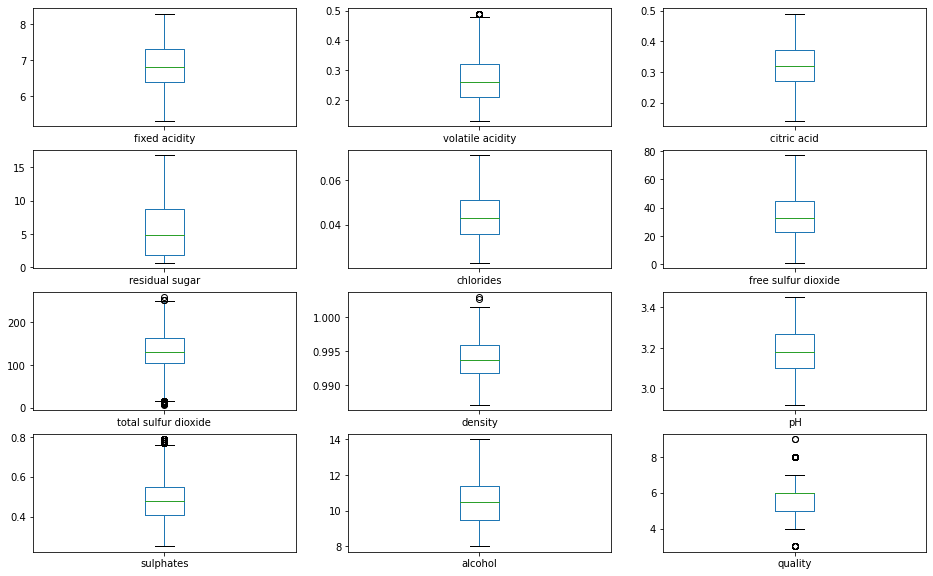

In [238]:
# Create and examine the box plots
plt.figure(figsize=(16,10))
for i,col in enumerate(list(wine_data.columns.values)):
    plt.subplot(4,3,i+1)
    wine_data.boxplot(col)
    plt.grid()

In [239]:
#again replacing the outliers with the mean value -except the quality feature
#for-loop to check every column of the dataset
for feature in wine_data.loc[:, wine_data.columns != 'quality']:
    # Call the function and get back an array of outliers
    outliers=outliers_in_a_feature(feature)
    # Compute the feature mean, while not including the outliers in the calculation
    feature_mean = wine_data[~outliers][feature].mean()
    print('\nThe mean value of the remaining (non-outlier) values is: ',feature_mean)
    # We get the indices of the rows which have outliers on the feature.
    outlier_indices = wine_data[outliers].index
    # Replace the campaign_mean value for identified outliers
    wine_data.loc[outlier_indices, feature] = feature_mean
    #Verify that there are no outliers in each feature
    num_feature_outliers=outliers_in_a_feature(feature)
    print('The feature',feature," has",num_feature_outliers.sum(),"outliers.")


The mean value of the remaining (non-outlier) values is:  6.833766018182065
The feature fixed acidity  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  0.27194079645368235
The feature volatile acidity  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  0.3203922931851637
The feature citric acid  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  5.803191075030613
The feature residual sugar  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  0.04364245483559308
The feature chlorides  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  33.93983073261042
The feature free sulfur dioxide  has 0 outliers.

The mean value of the remaining (non-outlier) values is:  134.29793510324484
The feature total sulfur dioxide  has 22 outliers.

The mean value of the remaining (non-outlier) values is:  0.9939162569462822
The feature density  has 0 outliers.

The mean value of the rema

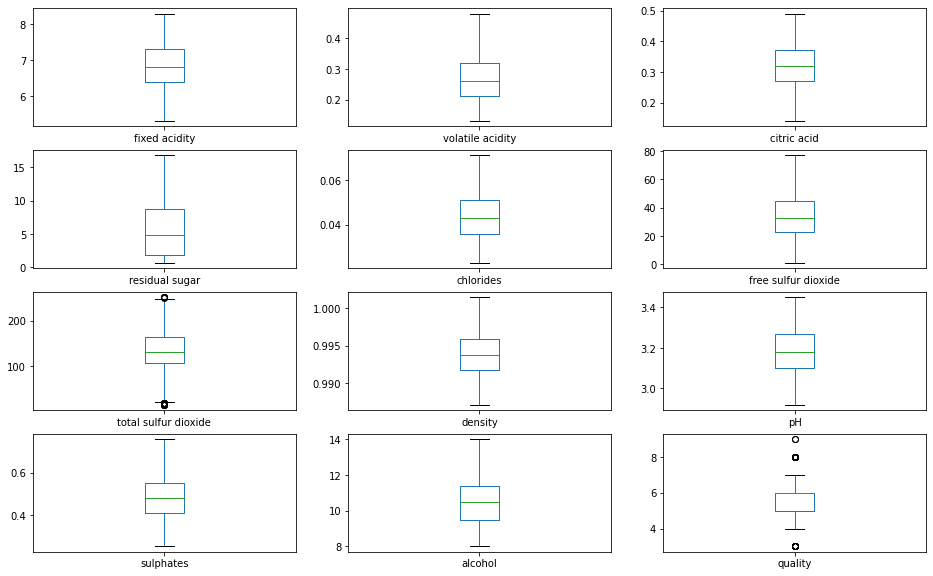

In [240]:
# Create and examine the box plots
plt.figure(figsize=(16,10))
for i,col in enumerate(list(wine_data.columns.values)):
    plt.subplot(4,3,i+1)
    wine_data.boxplot(col)
    plt.grid()

In [241]:
#running again the mean value replacement for loop to replace the last outliers left
#for-loop to check every column of the dataset
for feature in wine_data.loc[:, wine_data.columns != 'quality']:
    # Call the function and get back an array of outliers
    outliers=outliers_in_a_feature(feature)
    wine_data = wine_data[~outliers]
    #Verify that there are no outliers in each feature
    num_feature_outliers=outliers_in_a_feature(feature)
    print('The feature',feature," has",num_feature_outliers.sum(),"outliers.")

The feature fixed acidity  has 0 outliers.
The feature volatile acidity  has 0 outliers.
The feature citric acid  has 0 outliers.
The feature residual sugar  has 0 outliers.
The feature chlorides  has 0 outliers.
The feature free sulfur dioxide  has 0 outliers.
The feature total sulfur dioxide  has 0 outliers.
The feature density  has 0 outliers.
The feature pH  has 0 outliers.
The feature sulphates  has 0 outliers.
The feature alcohol  has 0 outliers.


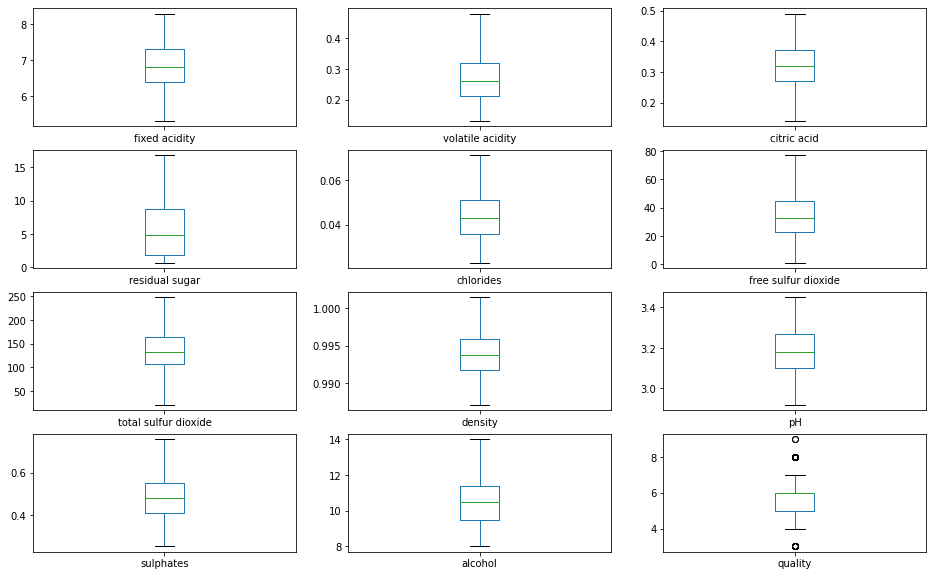

In [242]:
#Verifying that there are no outliers anymore!
# Create and examine the box plots
plt.figure(figsize=(16,10))
for i,col in enumerate(list(wine_data.columns.values)):
    plt.subplot(4,3,i+1)
    wine_data.boxplot(col)
    plt.grid()

In [243]:
#Now with 3759 sample, we move to the analysis. 
wine_data.shape

(3759, 12)

In [244]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.005188,0.246634,0.054635,0.120617,-0.041820,0.059047,0.237567,-0.291965,0.028717,-0.071943,-0.039751
volatile acidity,0.005188,1.000000,-0.111338,0.058235,0.061828,-0.106157,0.046894,0.046391,-0.018972,0.018353,0.076160,-0.130306
citric acid,0.246634,-0.111338,1.000000,-0.050025,0.018392,0.018163,0.020408,0.018748,-0.058828,0.075446,0.059012,0.051857
residual sugar,0.054635,0.058235,-0.050025,1.000000,0.156736,0.380233,0.417269,0.731058,-0.166401,-0.063485,-0.419736,-0.084418
chlorides,0.120617,0.061828,0.018392,0.156736,1.000000,0.026136,0.178596,0.495413,0.019356,0.123028,-0.479125,-0.268018
free sulfur dioxide,-0.041820,-0.106157,0.018163,0.380233,0.026136,1.000000,0.622710,0.274889,-0.063501,-0.033176,-0.274556,0.005041
total sulfur dioxide,0.059047,0.046894,0.020408,0.417269,0.178596,0.622710,1.000000,0.434967,-0.052811,0.031963,-0.433740,-0.149950
density,0.237567,0.046391,0.018748,0.731058,0.495413,0.274889,0.434967,1.000000,-0.023078,0.122613,-0.785220,-0.307946
pH,-0.291965,-0.018972,-0.058828,-0.166401,0.019356,-0.063501,-0.052811,-0.023078,1.000000,0.148148,0.084812,0.065803
sulphates,0.028717,0.018353,0.075446,-0.063485,0.123028,-0.033176,0.031963,0.122613,0.148148,1.000000,-0.057798,0.015785


In [245]:
#create a new dataset for different approaches later on- without outliers
wine_data_with_duplicates=wine_data.copy()

In [246]:
#after removing all outliers-checking if they are duplicates!
#use the duplicated() method of pandas to see how many duplicated rows we have on our dataframe 
#and then, print it. - use of inplace =true to modify our current dataframe
wine_data.drop_duplicates(inplace=True)
#As we can see below, now we don't have any duplicates in our dataframe, and
#the number of rows now are 3040 without outliers and without duplicates.
any_duplicate= wine_data.duplicated()
print('Number of duplicate rows is:', any_duplicate.sum())
wine_data.shape

Number of duplicate rows is: 0


(3040, 12)

## (a) Visualize the data in two dimensions.

In [248]:
#To visualise the data, first we should scale the data (except the quality feature) and then plot it.
sc = StandardScaler()
X_std = sc.fit_transform(wine_data.loc[:, wine_data.columns != 'quality'])
X_std.shape[:]

(3040, 11)

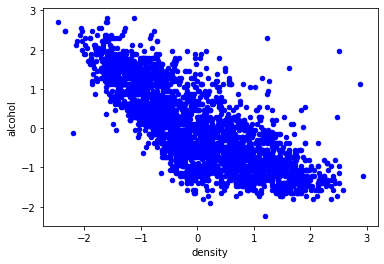

In [249]:
# Visualize 'density' and 'alcohol' in two dimensions!
plt.scatter(X_std[:,7], X_std[:,10], color ='b', s=20)
plt.xlabel('density')
plt.ylabel('alcohol')
plt.show()

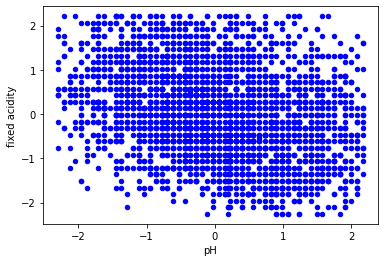

In [250]:
# Visualize 'pH' and 'fixed acidity' in two dimensions!
plt.scatter(X_std[:,8], X_std[:,0], color ='b', s=20)
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

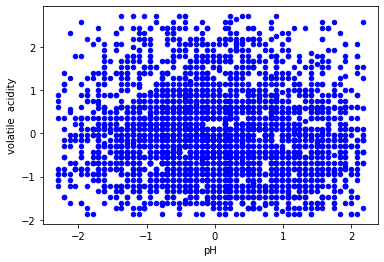

In [251]:
# Visualize 'pH' and 'volatile  acidity' in two dimensions!
plt.scatter(X_std[:,8], X_std[:,1], color ='b', s=20)
plt.xlabel('pH')
plt.ylabel('volatile  acidity')
plt.show()

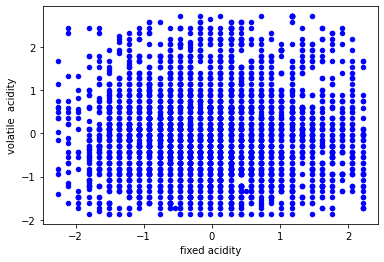

In [252]:
# Visualize 'fixed acidity' and 'volatile acidity' in two dimensions!
plt.scatter(X_std[:,0], X_std[:,1], color ='b', s=20)
plt.xlabel('fixed acidity')
plt.ylabel('volatile  acidity')
plt.show()

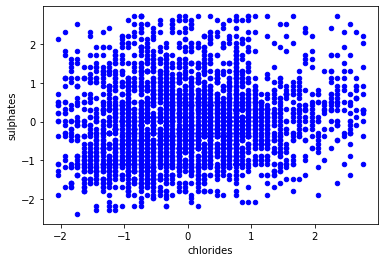

In [253]:
# Visualize 'chlorides' and 'sulphates' in two dimensions!
plt.scatter(X_std[:,4], X_std[:,9], color ='b', s=20)
plt.xlabel('chlorides')
plt.ylabel('sulphates')
plt.show()

#### From the plot of 2 dimensions, choosing different features each time, we can't identify the number of clusters in our dataset.

## (b) Clustering analysis.

In [254]:
#Implementing the elbow method for k = 1 to 12 to identify the clusters since visualization is not helpful.
distortions = []
k_values = range(1,15)

for k in k_values:
    km = KMeans(n_clusters=k,n_init=100,random_state=0,)
    km.fit(X_std)
    distortions.append(km.inertia_)


Text(0, 0.5, 'Distortion')

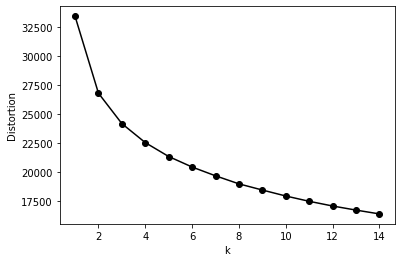

In [255]:
# Let's create a plot to visualise the outcome of the elbow method
plt.plot(k_values, distortions, marker = 'o', color = 'black')
plt.xlabel('k')
plt.ylabel('Distortion')

In [256]:
# So we will run the K-Means clustering algorithm with k = 4 and the init parameter 'random'
km = KMeans(n_clusters=4, init='random',random_state=0)

In [257]:
y_km = km.fit_predict(X_std)

In [258]:
wine_data['cluster'] = y_km
wine_data['cluster'].value_counts() # as we can see the data points are distributed well in each cluster.

3    912
1    775
2    706
0    647
Name: cluster, dtype: int64

#### With the elbow method we can see that, the number of clusters of our dataset is not perfectly clear.  It's between 3-6 clusters! We used 4 clusters for the cluster analysis and we can see the data points are distributed well in each cluster. 
#### So, we have 4 wine categories.

## (c) Cluster the wines and evaluate the quality of the result - the silhouette plot function.

Text(0, 0.5, 'pH')

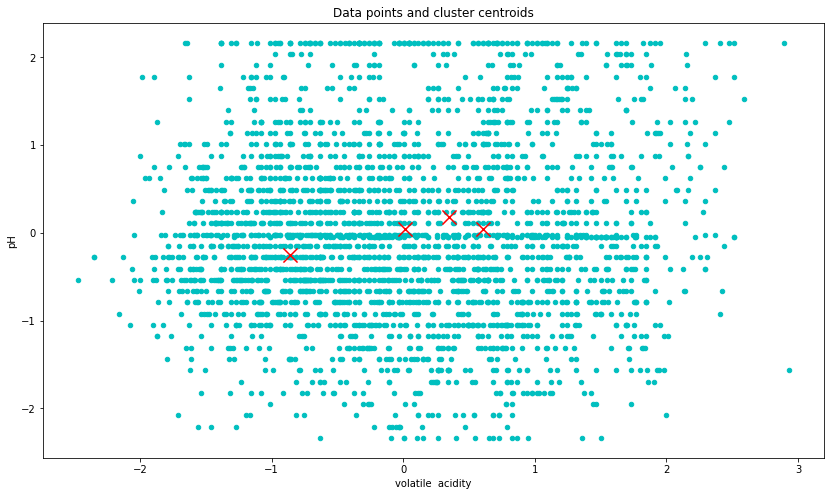

In [259]:
#from this plot below we can see where the cluster cendroids are on our dataset
plt.figure(figsize=(14,8))
plt.scatter(X_std[:,7], X_std[:,2], color='c', marker='o', s=20)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='r', marker='x',s=200)
plt.title('Data points and cluster centroids')
plt.xlabel('volatile  acidity')
plt.ylabel('pH')

In [260]:
cl1_wine_data = wine_data[wine_data['cluster'] == 0][['density','alcohol']]
cl2_wine_data = wine_data[wine_data['cluster'] == 1][['density','alcohol']]
cl3_wine_data = wine_data[wine_data['cluster'] == 2][['density','alcohol']]
cl4_wine_data = wine_data[wine_data['cluster'] == 3][['density','alcohol']]

Text(0, 0.5, 'alcohol')

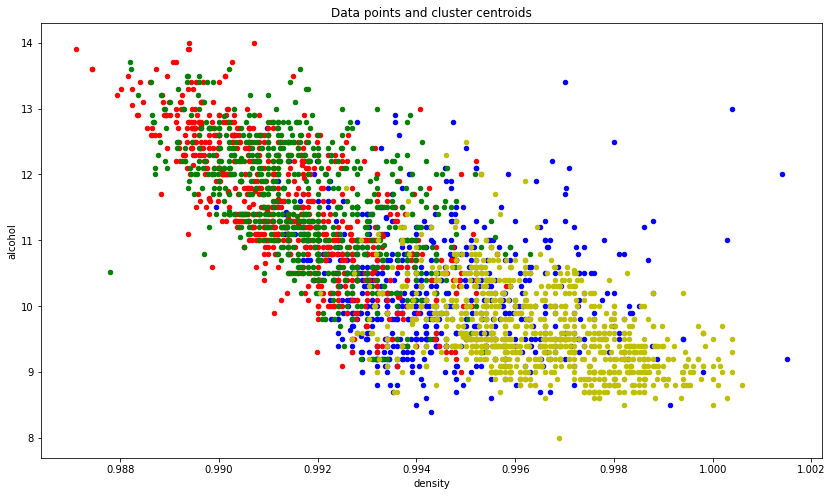

In [261]:
plt.figure(figsize=(14,8))
plt.scatter(cl1_wine_data['density'], cl1_wine_data['alcohol'], color='b', marker='o', s=20)
plt.scatter(cl2_wine_data['density'], cl2_wine_data['alcohol'], color='r', marker='o', s=20)
plt.scatter(cl3_wine_data['density'], cl3_wine_data['alcohol'], color='g', marker='o', s=20)
plt.scatter(cl4_wine_data['density'], cl4_wine_data['alcohol'], color='y', marker='o', s=20)

plt.title('Data points and cluster centroids')
plt.xlabel('density')
plt.ylabel('alcohol')

In [262]:
sse = km.inertia_
print(sse)

22554.4427165273


##### Performing a clustering analysis, we can see that, there are 4 wine categories (The elbow method). However using the random Method for initialization, chooses k observations (rows) at random from data for the initial centroids and as we can see from the plot above, there is no clear separation of the clusters.
##### The sum square error of this configuration is 22554. 
##### Below is the custom Silhouette plotting function and the plot with the specific parameters!

In [263]:
def silhouette_plot(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]

    # Call the sklearn.metrics.silhouette_samples to get for each point in X it's silhouette coefficient
    # Notice that the Euclidean distance is being used
    silhouette_coefficients= silhouette_samples(X, y_km, metric = 'euclidean')
    
    # use it to store custom tick locations for the y-axis
    y_ticks = []
    
    # use it to set the bounds of each cluster's horizontal bar plot and to
    # calculate custom tick locations for the y-axis
    y_ax_lower, y_ax_upper = 0, 0
    
    # Loop over all cluster's labels and produce the silhouette coefficient plot for each cluster
    for i, c in enumerate(cluster_labels):
        # Get silhouette coefficient of points that are in the cluster c
        cluster_silhouette_coefficients =silhouette_coefficients[y_km == c]
        cluster_silhouette_coefficients.sort()
        
        # Find the upper boundary for the y-axis (how many data points for cluster c)
        y_ax_upper += len(cluster_silhouette_coefficients)
        
        # Get a colour to use only for data points of cluster c
        col = cm.jet(i / n_clusters)
        
        # Create the horizontal bar plot
        plt.barh(range(y_ax_lower, y_ax_upper),cluster_silhouette_coefficients,height = 1, color = col)
        
        # Store the y-tick value as the midpoint (for aesthetic purposes)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.0)
        
        # Update the lower bound to be used for the next horizontal bar plot
        y_ax_lower += len(cluster_silhouette_coefficients)
    
    # Calculate and add to the plot the average silhouette coefficient
    silhouette_average = np.mean(silhouette_coefficients)
    plt.axvline(silhouette_average, color = 'r', linestyle = '--')
    
    # Add the calculated y-ticks, along with their labels
    plt.yticks(y_ticks, cluster_labels + 1)
    
    # Set axes labels
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    
    # Return the graph
    return plt,silhouette_average

Average Silhouette Coefficient: 0.13751218211035152


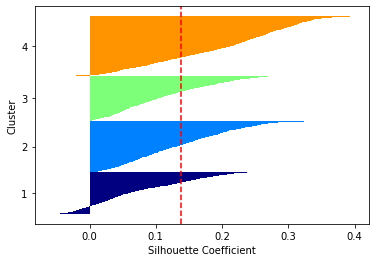

In [264]:
plot,aver_sil = silhouette_plot(X_std, y_km)
print("Average Silhouette Coefficient:",aver_sil)
plot.show()

#### As we can from the silhouette plot above the s(i) is close to 0 and the data points of each cluster is very close to other clusters.
#### • The majority of our data points have a Silhouette Coefficient > 0.1
#### • Average Silhouette Coefficient = 0.13751218211035154
#### • All clusters have a significant portion of data points with 𝑠(i) > 0.1

## (d) Two different approaches and compare the outcome with the previous results.

#### Before try other approaches to the wine_data dataset, i will try three different datasets with the same configurations as (with the kmeans++ Method for initialization) and check with the Average Silhouette Coefficient through the Silhouette plot.  These datasets are:
##### - The original Dataset without duplicates and outliers.
##### - The original Dataset with duplicates and outliers.
##### - The original Dataset with duplicates.  
##### - The original Dataset with  outliers. 

For clusters: 3 

SSE: 24190.512751775732 



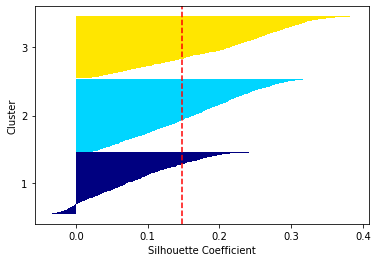

For clusters: 4 

SSE: 22554.245729984952 



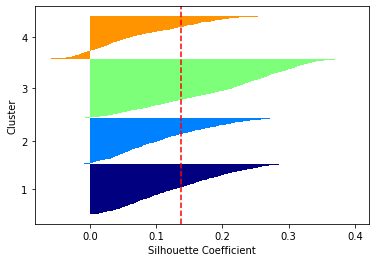

For clusters: 5 

SSE: 21356.60103478517 



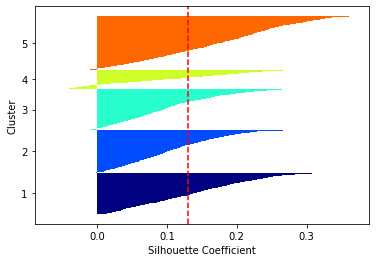

For clusters: 6 

SSE: 20452.74692957418 



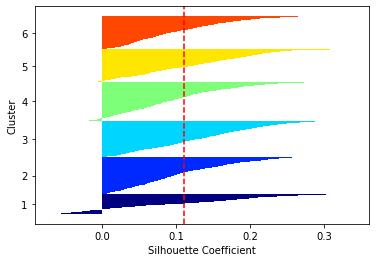

For clusters: 3 

SSE: 45577.010477168544 



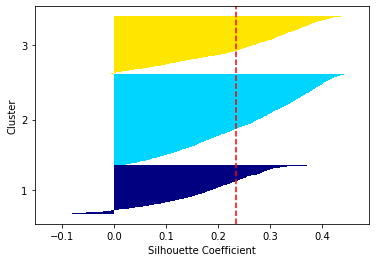

For clusters: 4 

SSE: 40721.00956559116 



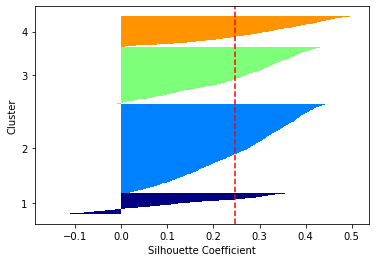

For clusters: 5 

SSE: 38069.207515560025 



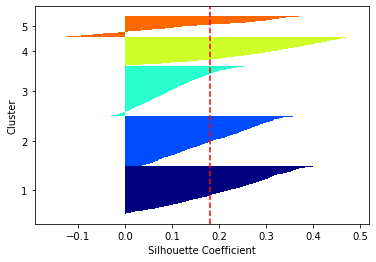

For clusters: 6 

SSE: 35808.51847122401 



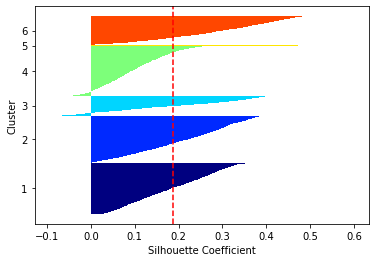

For clusters: 3 

SSE: 37900.29466333102 



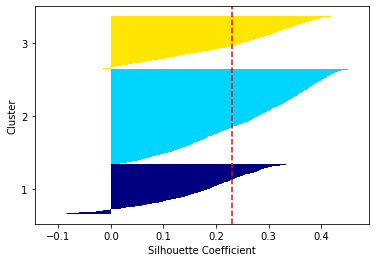

For clusters: 4 

SSE: 33814.81747411512 



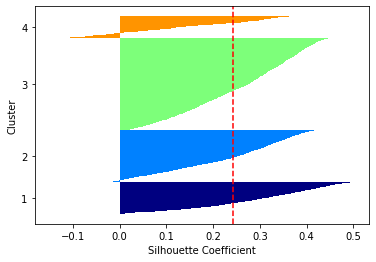

For clusters: 5 

SSE: 31533.963880873827 



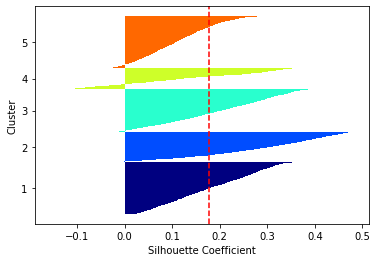

For clusters: 6 

SSE: 30041.863345775702 



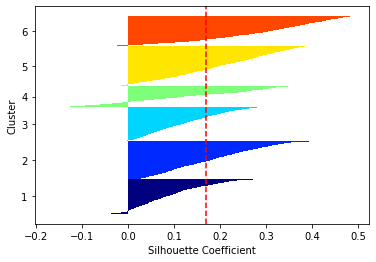

For clusters: 3 

SSE: 29741.49205855453 



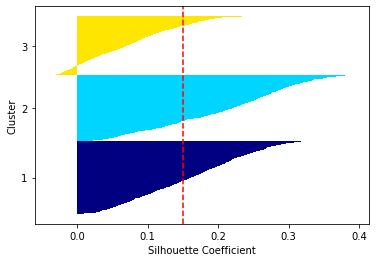

For clusters: 4 

SSE: 27749.2818456957 



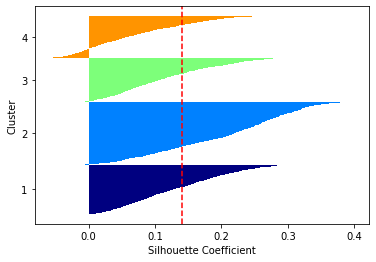

For clusters: 5 

SSE: 26367.034379325258 



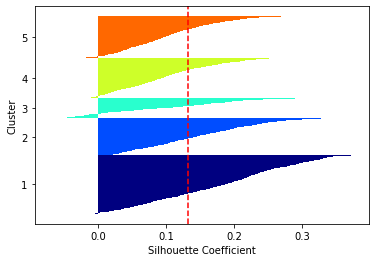

For clusters: 6 

SSE: 25168.577777777176 



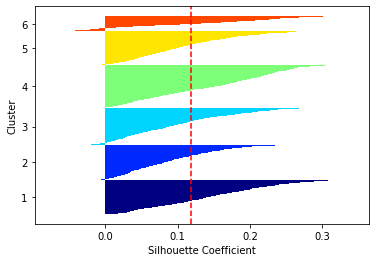

In [265]:
#First let's scale the datasets 
X_std_orig = sc.fit_transform(wine_data_with_outliers_and_duplicates.
                              loc[:, wine_data_with_outliers_and_duplicates.columns != 'quality'])
X_std_outliers = sc.fit_transform(wine_data_with_outliers.
                                  loc[:, wine_data_with_outliers.columns != 'quality'])
X_std_duplicates = sc.fit_transform(wine_data_with_duplicates.
                                    loc[:, wine_data_with_duplicates.columns != 'quality'])

#create a list of the datasets in order to use it in the for-loop
datasets=[X_std,X_std_orig,X_std_outliers,X_std_duplicates]
#list of k for different clusters
k_values = range(3,7)
    
for dataset in datasets:
    for k in k_values:
        print("For clusters:",k,'\n')
        km = KMeans(n_clusters=k, init='k-means++',random_state=0)
        y_km_test = km.fit_predict(dataset)
        print("SSE:",km.inertia_,'\n')
        plot,b = silhouette_plot(dataset, y_km_test)
        plot.show()

The minimum distortion for the specific dataset is: 16473.72523145312


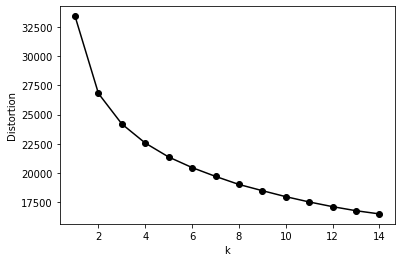

The minimum distortion for the specific dataset is: 27281.313418103186


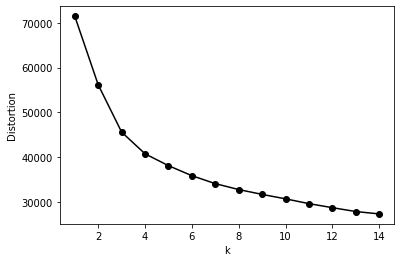

The minimum distortion for the specific dataset is: 22564.404037329958


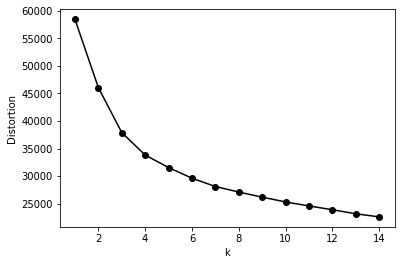

The minimum distortion for the specific dataset is: 20192.883285276075


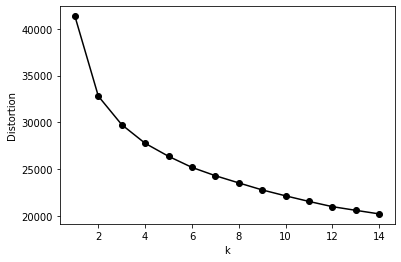

In [266]:
#check the elbow method for each dataset to see if we can define better than before the number of clusters.
k_values = range(1,15)
for dataset in datasets:
    distortions = []
    for k in k_values:
        km = KMeans(n_clusters=k,init='random', max_iter=300,random_state=0,)
        km.fit(dataset)
        distortions.append(km.inertia_)
    print("The minimum distortion for the specific dataset is:",km.inertia_)
    plt.plot(k_values, distortions, marker = 'o', color = 'black')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plot.show()

### Testing the different datasets, we can see that without outliers and duplicates the sum of square errors is smaller, however, with outliers, the average silhouette Coefficient is higher. With or without duplicates, there is no difference in the data as it is expected. The elbow method seems identical for all the datasets, however, 4 clusters seems better to choose as we see to the 2nd plot with outliers.
### The clusters remain the same for each dataset, so we will continue with different configuration parameters for the wine_data dataset which doesn't include outliers and duplicates since its SSE is lower for 4 clusters.

### (1) K-Means++ method with different hyperparameters

For random_state: 1 

     For tolerance: 1e-09 

          For number of iteretions: 25 

               SSE: 22554.207576978035 

               Average silhouette Coefficient : 0.1373791387182195 

               Number of iterations run: 24 

          For number of iteretions: 50 

               SSE: 22554.207576978035 

               Average silhouette Coefficient : 0.1373791387182195 

               Number of iterations run: 24 

          For number of iteretions: 100 

               SSE: 22554.207576978035 

               Average silhouette Coefficient : 0.1373791387182195 

               Number of iterations run: 24 

     For tolerance: 1e-06 

          For number of iteretions: 25 

               SSE: 22554.207576978035 

               Average silhouette Coefficient : 0.1373791387182195 

               Number of iterations run: 24 

          For number of iteretions: 50 

               SSE: 22554.207576978035 

               Average silhouette Coefficient : 0.1

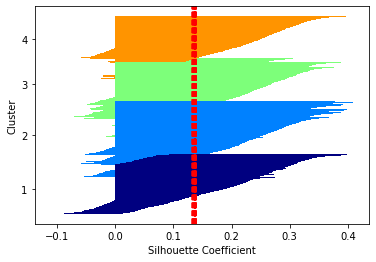

In [267]:
numb_iterations=[25,50,100]
random_states=[1,100,500,1000]
tolerance=[1e-9,1e-6,1e-4,1e-2,1e-0]
# So we will run the K-Means clustering algorithm with k = 4 and the init method 'k-means++'
for rand in random_states:
    print("For random_state:",rand,'\n')
    for tol in tolerance:
        print("     For tolerance:",tol,'\n')
        for itera_ in numb_iterations:
            print("          For number of iteretions:",itera_,'\n')
            #train the model with specific parameters
            km_test = KMeans(n_clusters=4,init='k-means++',tol=tol,n_init=itera_,random_state=rand)
            y_km_outliers = km_test.fit_predict(X_std)
            print("               SSE:",km_test.inertia_,'\n')
            plot,asc = silhouette_plot(X_std, y_km_outliers)
            print("               Average silhouette Coefficient :",asc,'\n')
            print("               Number of iterations run:",km_test.n_iter_,'\n')

#### At part (b) the results of the clustering analysis, with 4 clusters, were : average silhouette Coefficient= 0.13751218211035154 and SSE=22554.442716527297. 
#### After different testing different configurations with the parameters, there are a slight better results. In detail, with different n_init (Number of time the k-means algorithm will be run with different centroid seeds), smaller relative tolerance with regards to inertia to declare convergence (tol=1e0 - default is 1e-4) and different random number generation for centroid initialization (random_state) we came to the conclusion that, with random_state (equal to 500) and/or n_init parameters (equal to 100) changed the previous result as average silhouette Coefficient= 0.13874065309680617 and SSE=22618.555857994674 .

### (2) K-Means++ method after applying Principal Component Analysis

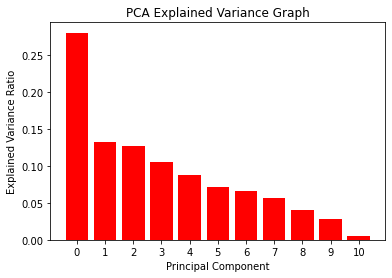

In [268]:
# Visualisation of the explained variance ratio contribution of each of the 11 Principal Components 
#using a bar chart which is the most suitable.
pca_all = PCA(n_components=None)
X_transformed = pca_all.fit_transform(X_std)
explained_variance_ratio = pca_all.explained_variance_ratio_
my_list = range(len(explained_variance_ratio))
plt.bar(range(len(explained_variance_ratio)),explained_variance_ratio, color='r')
plt.xticks(my_list, my_list)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Graph')
plt.show()

<BarContainer object of 11 artists>

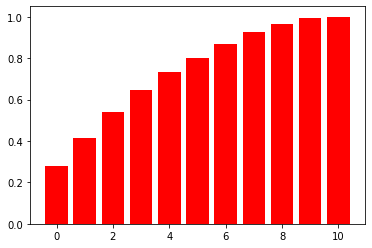

In [269]:
# We use the cumsum() to find the cumulative sum of ratios in order to choose how many
#Principal Components should we choose to ensure that our transformation captures 80% and 100%
cumulative_explained_ratio = explained_variance_ratio.cumsum()
plt.bar(range(len(explained_variance_ratio)),cumulative_explained_ratio, color='r')


 2 components

SSE: 3772.9656426957135 

average silhouette Coefficient : 0.3649408579817691 



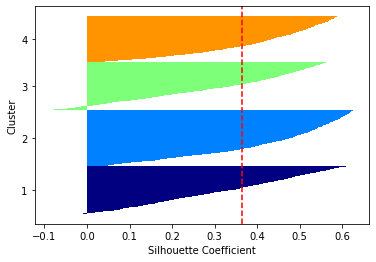


 3 components

SSE: 7457.3877478239365 

average silhouette Coefficient : 0.2868987191424286 



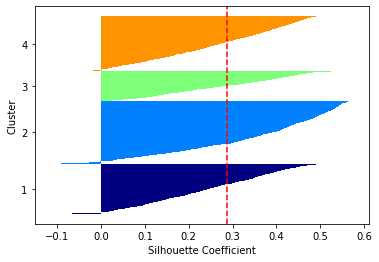


 4 components

SSE: 10866.803204608474 

average silhouette Coefficient : 0.22484593090655222 



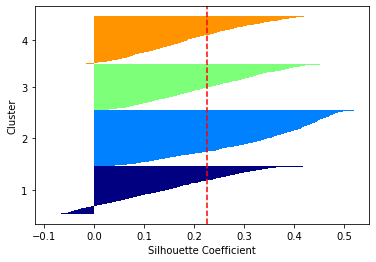


 5 components

SSE: 13844.49444230151 

average silhouette Coefficient : 0.19806675608325156 



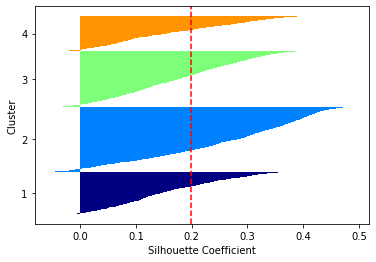


 6 components

SSE: 16197.612217924696 

average silhouette Coefficient : 0.1704820107186867 



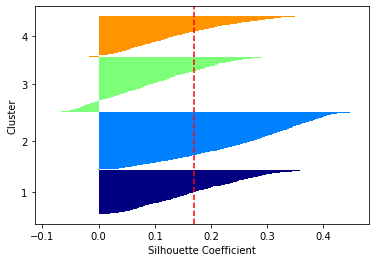


 7 components

SSE: 18355.240499208434 

average silhouette Coefficient : 0.1579074803961234 



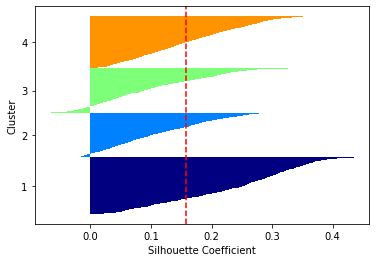


 8 components

SSE: 20355.38639728566 

average silhouette Coefficient : 0.14649239691510502 



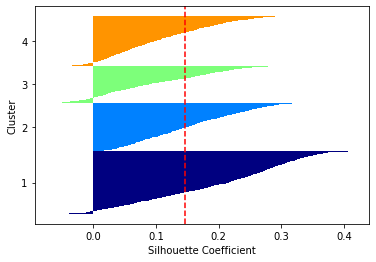


 9 components

SSE: 21542.186384481873 

average silhouette Coefficient : 0.1449712202411881 



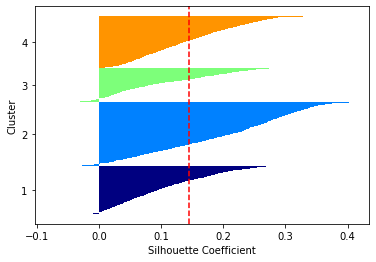


 10 components

SSE: 22543.547648732314 

average silhouette Coefficient : 0.13214681725993188 



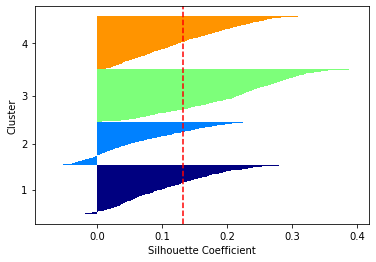

In [272]:
comp=[2,3,4,5,6,7,8,9,10]
for i in comp:
    print('\n',i,"components\n")
    pca_2 = PCA(i)
    #apply pca on the standardised data
    pca_data = pca_2.fit_transform(X_std)
    #apply the kmeans algorithm to the pca data
    modelk_pca = KMeans(n_clusters=4,init='k-means++',tol=1e0,n_init=100,random_state=500)
    modelk_pca.fit(pca_data)
    y_km_pca = modelk_pca.fit_predict(pca_data)
    print("SSE:",modelk_pca.inertia_,'\n')
    plot,asc = silhouette_plot(pca_data, y_km_pca)
    print("average silhouette Coefficient :",asc,'\n')
    plot.show()

### Based on these graphs above, as the components increase, average silhouette Coefficient gets lower and SSE gets bigger.  From the cumulative sum of ratios graph, we choose to proceed with 6 principal components since they explain more than 80% of the data. With this logic, the average silhouette Coefficient is now 0.1745023836426906  which is higher than the other approach, and SSE smaller (16089.989502627634 ). 

## (e) Plot the distribution of wines within each category.

In [274]:
#apply 2 pca and the other conf.parameters before plot the categories.
pca_final = PCA(n_components=6)
#apply pca on the standardised data
pca_data_final = pca_final.fit_transform(X_std)
#apply the kmeans algorithm to the pca data with the best parameters found before
km_final = KMeans(n_clusters=4,init='k-means++',tol=1e0,n_init=100,random_state=500)
km_final.fit(pca_data_final)
y_km_final = km_final.fit_predict(pca_data_final)

In [275]:
wine_data['cluster'] = y_km_final
wine_data['cluster'].value_counts() # as we can see the data points are distributed well in each cluster.

1    887
2    855
0    676
3    622
Name: cluster, dtype: int64


Summary profile of ' fixed acidity ' for each category/cluster:

         count      mean       std  min  25%  50%  75%  max
cluster                                                    
0        676.0  6.210355  0.473674  5.3  5.8  6.2  6.5  7.8
1        887.0  6.841820  0.606510  5.6  6.4  6.8  7.3  8.3
2        855.0  6.975833  0.622608  5.4  6.5  7.0  7.4  8.3
3        622.0  7.213228  0.560912  5.8  6.8  7.1  7.6  8.3


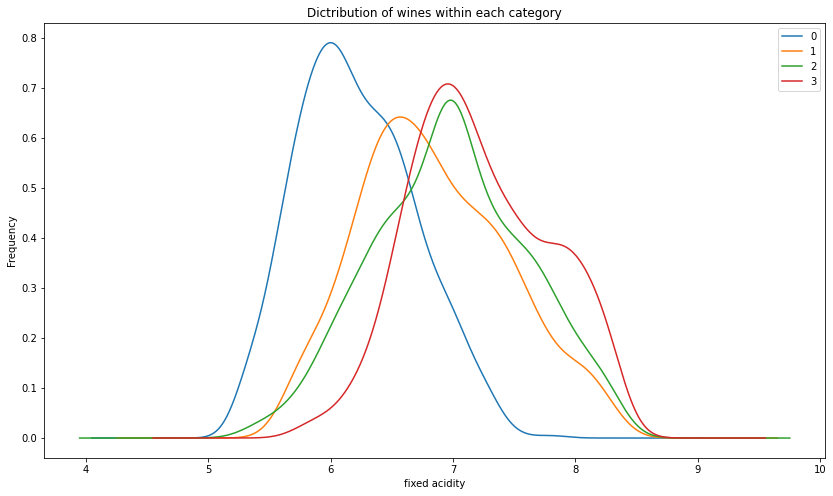


Summary profile of ' volatile acidity ' for each category/cluster:

         count      mean       std   min   25%   50%       75%   max
cluster                                                             
0        676.0  0.258959  0.075768  0.13  0.20  0.25  0.310000  0.47
1        887.0  0.278464  0.070709  0.13  0.23  0.27  0.320000  0.48
2        855.0  0.268529  0.079928  0.13  0.21  0.26  0.318843  0.48
3        622.0  0.285187  0.077704  0.13  0.22  0.28  0.340000  0.48


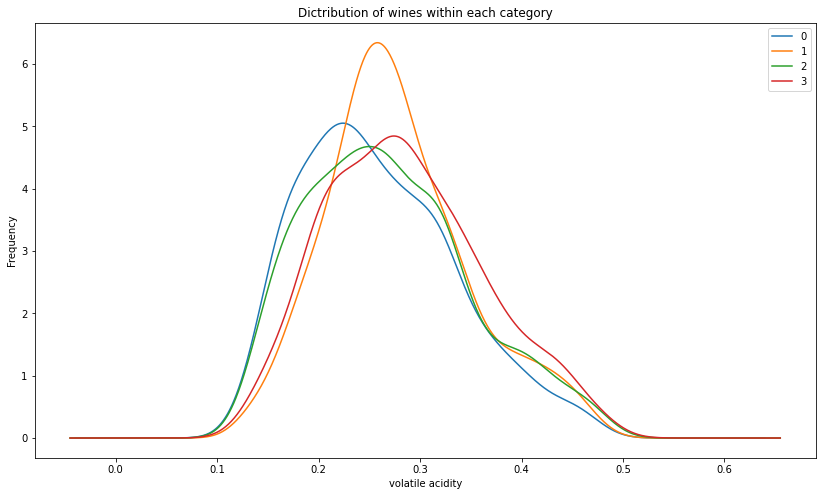


Summary profile of ' citric acid ' for each category/cluster:

         count      mean       std   min   25%       50%   75%   max
cluster                                                             
0        676.0  0.303249  0.060464  0.14  0.27  0.300000  0.34  0.49
1        887.0  0.320306  0.084578  0.14  0.26  0.310000  0.38  0.49
2        855.0  0.322921  0.081303  0.14  0.27  0.318033  0.38  0.49
3        622.0  0.341502  0.074343  0.15  0.29  0.330000  0.38  0.49


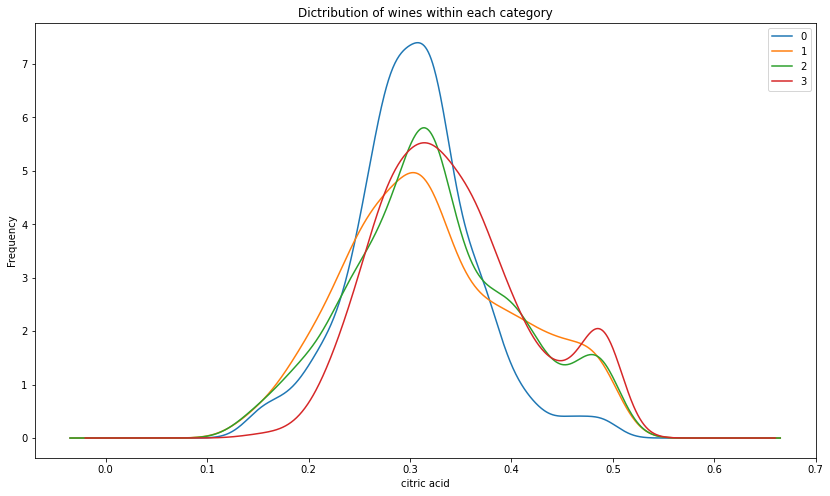


Summary profile of ' residual sugar ' for each category/cluster:

         count      mean       std  min  25%     50%   75%   max
cluster                                                         
0        676.0  3.064719  2.375165  0.7  1.4   2.100   4.2  15.5
1        887.0  9.940638  3.561452  1.0  7.5  10.000  12.7  16.8
2        855.0  3.474515  2.711521  0.8  1.5   2.100   5.2  15.5
3        622.0  4.185691  3.233867  0.7  1.5   2.825   6.5  14.8


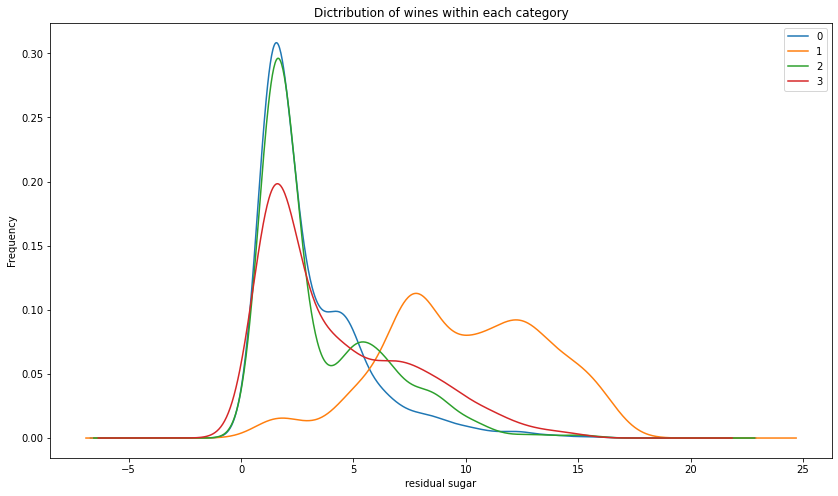


Summary profile of ' chlorides ' for each category/cluster:

         count      mean       std    min    25%    50%    75%    max
cluster                                                              
0        676.0  0.036175  0.006996  0.023  0.031  0.036  0.040  0.063
1        887.0  0.047462  0.007576  0.024  0.042  0.047  0.052  0.071
2        855.0  0.050247  0.008996  0.024  0.044  0.050  0.055  0.071
3        622.0  0.036092  0.006819  0.023  0.031  0.036  0.040  0.066


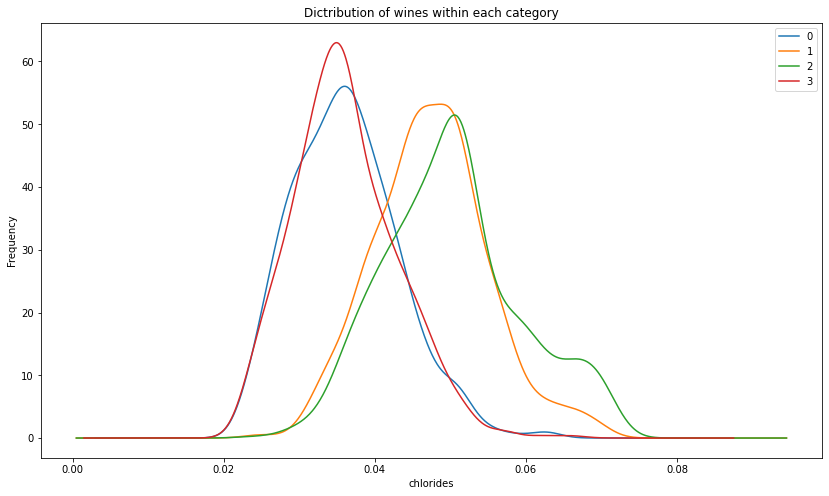


Summary profile of ' free sulfur dioxide ' for each category/cluster:

         count       mean        std  min   25%   50%   75%   max
cluster                                                          
0        676.0  31.526627  13.008261  3.0  23.0  31.0  39.0  75.0
1        887.0  47.578918  12.720248  6.0  39.0  49.0  56.0  77.0
2        855.0  24.208187  11.662303  1.0  16.0  24.0  32.0  66.0
3        622.0  28.250804  12.479089  2.0  19.0  28.0  36.0  73.0


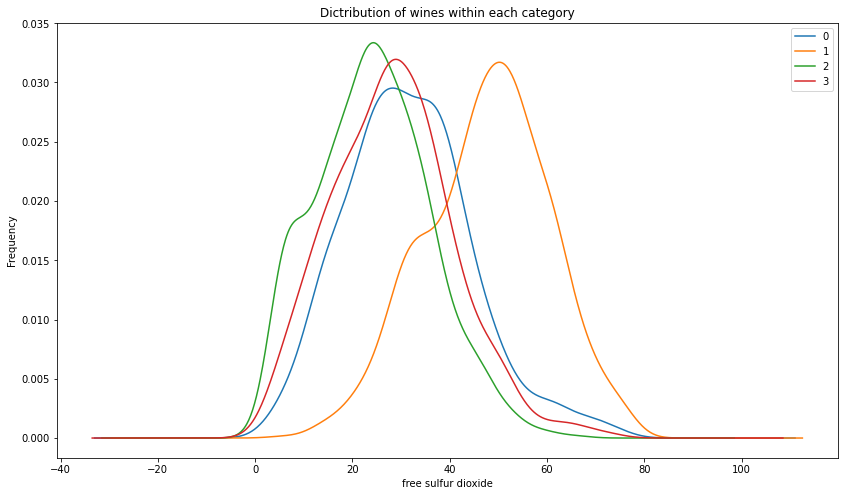


Summary profile of ' total sulfur dioxide ' for each category/cluster:

         count        mean        std   min    25%    50%    75%    max
cluster                                                                
0        676.0  114.116565  30.133925  25.0   93.0  113.0  133.0  217.5
1        887.0  174.324798  31.518137  94.0  152.0  174.0  197.0  248.0
2        855.0  118.211948  38.571425  21.0   99.5  123.0  142.0  218.5
3        622.0  114.959807  31.122582  21.0   95.0  114.0  132.0  216.0


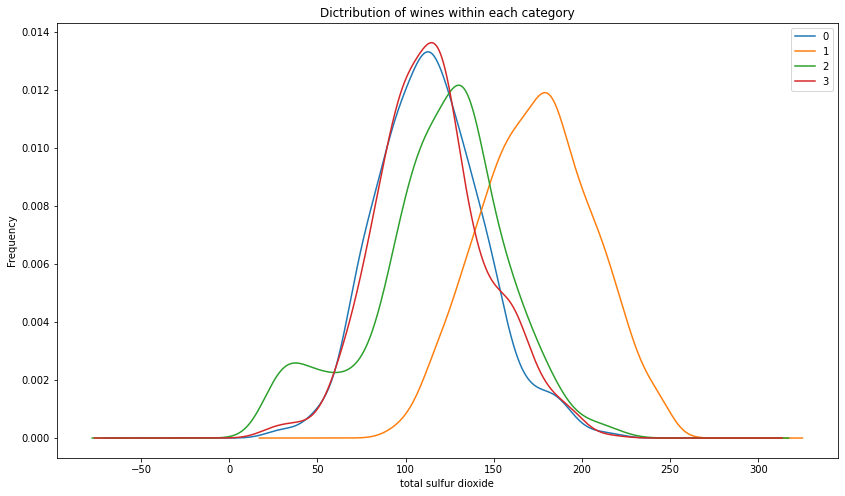


Summary profile of ' density ' for each category/cluster:

         count      mean       std      min       25%      50%       75%  \
cluster                                                                    
0        676.0  0.991195  0.001453  0.98711  0.990127  0.99110  0.992100   
1        887.0  0.996505  0.001609  0.99200  0.995400  0.99640  0.997725   
2        855.0  0.994169  0.001753  0.98994  0.992960  0.99390  0.995200   
3        622.0  0.991723  0.001528  0.98779  0.990663  0.99159  0.992800   

             max  
cluster           
0        0.99564  
1        1.00060  
2        1.00150  
3        0.99629  


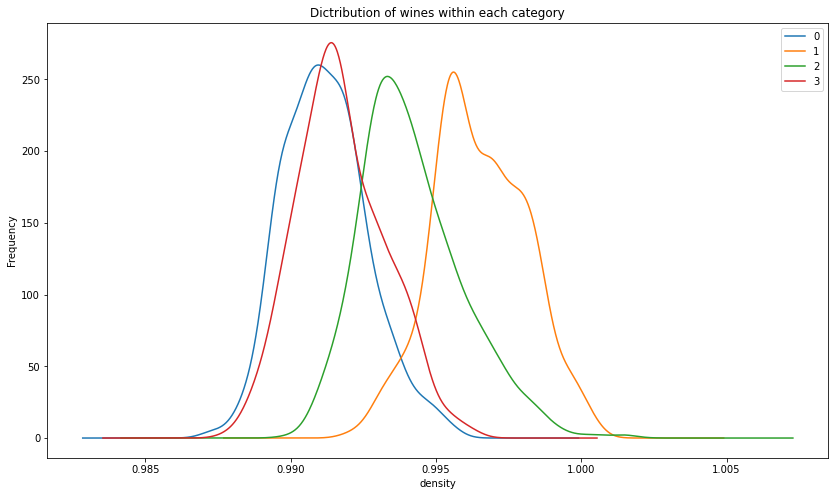


Summary profile of ' pH ' for each category/cluster:

         count      mean       std   min   25%    50%     75%   max
cluster                                                            
0        676.0  3.278571  0.087434  2.97  3.22  3.280  3.3425  3.45
1        887.0  3.171015  0.105198  2.92  3.10  3.160  3.2300  3.45
2        855.0  3.221897  0.113956  2.92  3.14  3.220  3.3000  3.45
3        622.0  3.090624  0.083507  2.92  3.03  3.095  3.1500  3.31


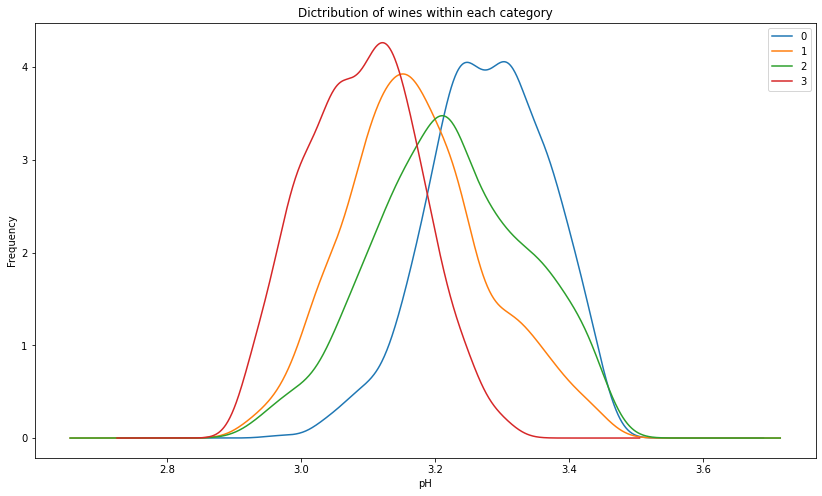


Summary profile of ' sulphates ' for each category/cluster:

         count      mean       std   min   25%    50%   75%   max
cluster                                                          
0        676.0  0.486415  0.100333  0.26  0.41  0.475  0.55  0.76
1        887.0  0.487838  0.083604  0.29  0.43  0.490  0.54  0.76
2        855.0  0.532741  0.097265  0.31  0.46  0.520  0.60  0.76
3        622.0  0.429876  0.092158  0.25  0.37  0.410  0.48  0.76


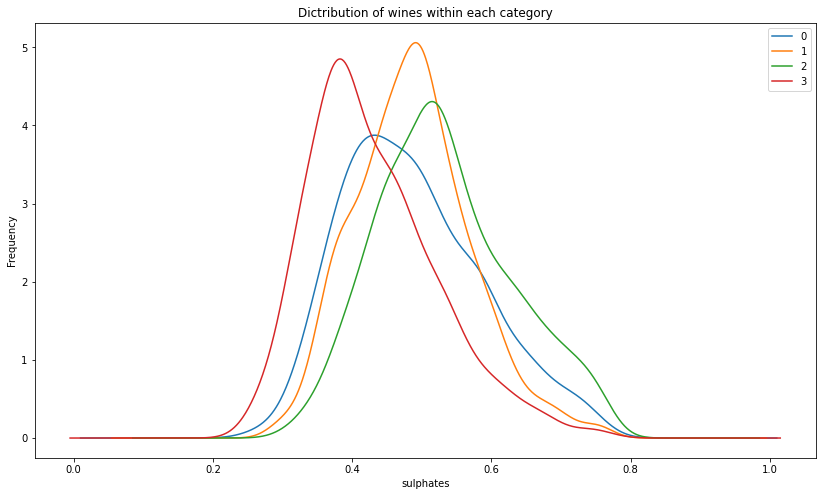


Summary profile of ' alcohol ' for each category/cluster:

         count       mean       std  min   25%     50%   75%   max
cluster                                                           
0        676.0  11.633417  0.962781  9.0  11.0  11.575  12.4  14.0
1        887.0   9.612420  0.625173  8.0   9.2   9.500  10.0  12.5
2        855.0  10.286624  0.818040  8.4   9.7  10.200  10.8  13.4
3        622.0  11.624693  0.873358  9.2  11.0  11.600  12.3  13.7


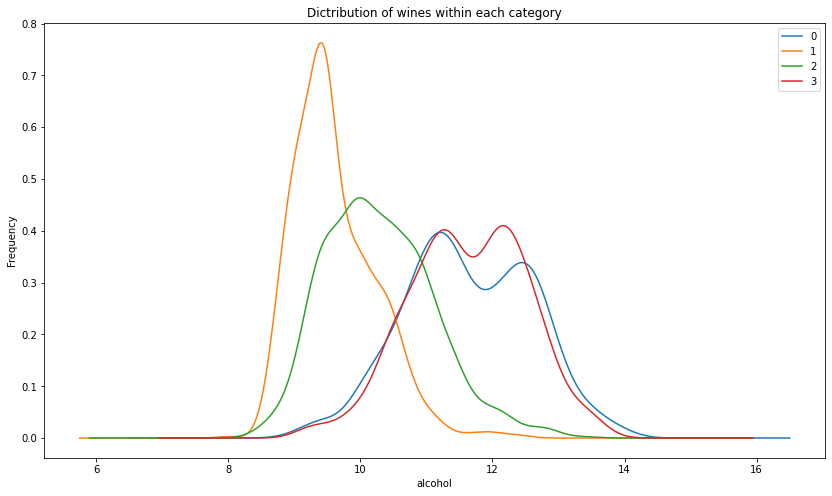

In [276]:
#plot the distribution of wines within each category and examination of each category’s (summary) profile
features_to_explore=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates', 'alcohol']
for feature in features_to_explore:
    print("\nSummary profile of '",feature,"' for each category/cluster:\n")
    print(wine_data.groupby("cluster")[feature].describe())
    plt.figure(figsize=(14,8))
    wine_data.groupby('cluster')[feature].plot(kind='kde', ax=plt.gca())
    plt.gca().set(title="Dictribution of wines within each category" , ylabel='Frequency',xlabel=feature)
    plt.legend();
    plt.show()
    

### According to the graphs above and the summary profiles of each feature with the clustes we can conclude that:
##### (1) In fixed acidity, there is an overlap of clusters 1 and 3, where the 2 rest clusters seem to get different values.
##### (2) In residual sugar, only one category seem to have different values. The rest clusters have identical values. 
##### (3) In chlorides, we get better results, since we can visualise that clusters 0,3 and 1,2 are well separeted amongst them and clearly have different values,where mean value of clusters 0 and 3 have mean value 0.036 whereas 1 and 2 have mean value 0.048.
##### (4) Even more better results, we can visualise in free sulfur dioxide feature, where there is a better separation of the categories of wines. Different mean values, min and max values.
####  Except, free sulfur dioxide feature, also in pH, sulphates and density there is very good separation of the categories of wines. So we can say that these 3 features can produce a pretty good separation of our clusters.

## (f) Does the produced categorization of wines correspond to a wine quality-based segmentation?


Summary profile of 'Quality' for each category/cluster:

          count      mean       std  min  25%  50%  75%  max
quality                                                     
3          11.0  1.727273  1.009050  0.0  1.0  2.0  2.5  3.0
4          93.0  1.849462  0.883991  0.0  1.0  2.0  2.0  3.0
5         843.0  1.482800  0.795251  0.0  1.0  1.0  2.0  3.0
6        1435.0  1.468293  1.063961  0.0  1.0  1.0  2.0  3.0
7         551.0  1.388385  1.282672  0.0  0.0  1.0  3.0  3.0
8         105.0  1.428571  1.343482  0.0  0.0  1.0  3.0  3.0
9           2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


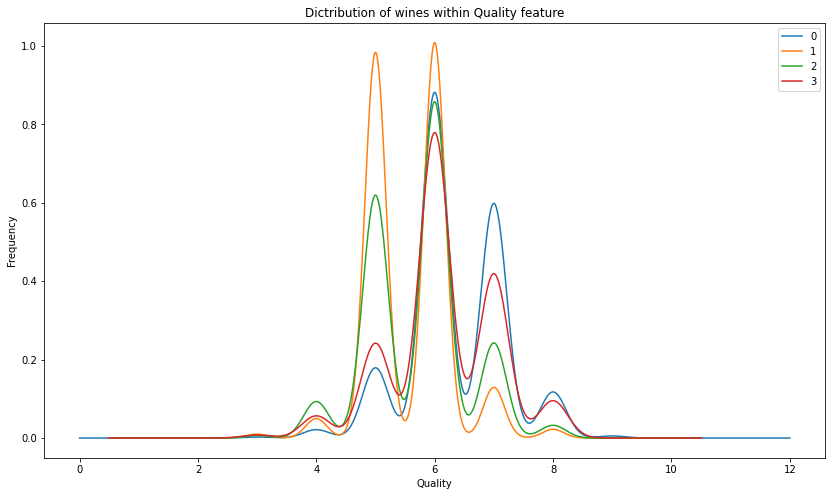

In [277]:
# check if wine categorization corresponds to a wine quality-based segmentation
print("\nSummary profile of 'Quality' for each category/cluster:\n")
print(wine_data.groupby("quality")['cluster'].describe())
plt.figure(figsize=(14,8))
wine_data.groupby('cluster')['quality'].plot(kind='kde', ax=plt.gca())
plt.gca().set(title="Dictribution of wines within Quality feature" , ylabel='Frequency',xlabel='Quality')
plt.legend();
plt.show()

### From the graph above, we can conlude that:
#### The produced categorization of wines does not clearly correspond to a wine quality-based segmentation. 
#### However, we can see that even if the most of the data have quality equal to six, there is some segmentation.
#### Cluster 1 and 2 (orange and green) have the most values with quality 5 and 6, whereas clusters 0 and 3 (blue and red) the majority have quality 6 and 7.
